## Tahap 1: Pengumpulan Data

Pada tahap ini, kita akan:
1. Menghubungkan ke Google Drive untuk mengakses dataset
2. Membaca file Sudan.docx
3. Melakukan eksplorasi awal dataset
4. Menampilkan ringkasan statistik dataset

### 1.1 Import Library yang Diperlukan

Library yang digunakan:
- `google.colab.drive`: Untuk mount Google Drive
- `docx`: Untuk membaca file Word (.docx)
- `pandas`: Untuk manipulasi dan analisis data
- `numpy`: Untuk operasi numerik
- `re`: Untuk regular expression
- `matplotlib` & `seaborn`: Untuk visualisasi data

In [1]:
# Install library yang diperlukan untuk membaca file .docx
!pip install python-docx -q

# Import library dasar
import pandas as pd
import numpy as np
import re
from docx import Document
from google.colab import drive

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Konfigurasi pandas untuk menampilkan data lebih lengkap
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)

print("✓ Semua library berhasil diimport!")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.8 MB/s eta 0:00:00
✓ Semua library berhasil diimport!


### 1.2 Mount Google Drive

Menghubungkan notebook dengan Google Drive untuk mengakses file dataset.

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

print("\n✓ Google Drive berhasil terhubung!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

✓ Google Drive berhasil terhubung!


### 1.3 Membaca Dataset dari File .docx

Dataset berada di lokasi: `/content/drive/MyDrive/UTS/Sudan.docx`

Kita akan membaca file Word dan mengekstrak teksnya untuk analisis.

In [3]:
# Path menuju file dataset
file_path = '/content/drive/MyDrive/UTS/Sudan.docx'

# Fungsi untuk membaca file .docx
def read_docx(file_path):
    """
    Membaca file .docx dan mengekstrak semua teks dari paragraf dan tabel.

    Parameters:
    -----------
    file_path : str
        Path lengkap menuju file .docx

    Returns:
    --------
    dict : Dictionary berisi paragraf dan tabel dari dokumen
    """
    # Buka dokumen Word
    doc = Document(file_path)

    # Ekstrak semua paragraf
    paragraphs = []
    for para in doc.paragraphs:
        if para.text.strip():  # Hanya ambil paragraf yang tidak kosong
            paragraphs.append(para.text.strip())

    # Ekstrak data dari tabel (jika ada)
    tables_data = []
    for table in doc.tables:
        table_content = []
        for row in table.rows:
            row_data = [cell.text.strip() for cell in row.cells]
            table_content.append(row_data)
        tables_data.append(table_content)

    return {
        'paragraphs': paragraphs,
        'tables': tables_data,
        'full_text': '\n'.join(paragraphs)
    }

# Baca file Sudan.docx
try:
    doc_data = read_docx(file_path)
    print("✓ File Sudan.docx berhasil dibaca!")
    print(f"\nJumlah paragraf: {len(doc_data['paragraphs'])}")
    print(f"Jumlah tabel: {len(doc_data['tables'])}")
    print(f"Total panjang teks: {len(doc_data['full_text'])} karakter")
except Exception as e:
    print(f"❌ Error saat membaca file: {e}")

✓ File Sudan.docx berhasil dibaca!

Jumlah paragraf: 69
Jumlah tabel: 0
Total panjang teks: 9538 karakter


### 1.4 Preview Dataset

Menampilkan sebagian isi dokumen untuk memahami struktur dan konten data.

In [4]:
# Tampilkan 5 paragraf pertama
print("=" * 80)
print("PREVIEW: 5 Paragraf Pertama dari Dokumen")
print("=" * 80)

for i, para in enumerate(doc_data['paragraphs'][:5], 1):
    print(f"\n[Paragraf {i}]")
    print(para)
    print("-" * 80)

# Jika ada tabel, tampilkan tabel pertama
if doc_data['tables']:
    print("\n" + "=" * 80)
    print("PREVIEW: Tabel Pertama dari Dokumen")
    print("=" * 80)

    # Konversi tabel pertama ke DataFrame untuk tampilan lebih rapi
    first_table = doc_data['tables'][0]
    if len(first_table) > 1:
        df_table = pd.DataFrame(first_table[1:], columns=first_table[0])
        print(df_table)
    else:
        print(pd.DataFrame(first_table))
else:
    print("\nℹ Tidak ada tabel dalam dokumen.")

PREVIEW: 5 Paragraf Pertama dari Dokumen

[Paragraf 1]
Aksi Milisi Di Sudan Yang Melancarkan Pembantaian Brutal –
--------------------------------------------------------------------------------

[Paragraf 2]
'Tugas Kami Hanya Membunuh'
--------------------------------------------------------------------------------

[Paragraf 3]
Sejumlah Pria Tertawa Lepas Saat Mobil Pikap Yang Mereka Tumpangi Melaju Kencang Melewati Deretan Sembilan Mayat Yang Terbaring Di Jalanan Sudan
--------------------------------------------------------------------------------

[Paragraf 4]
"Lihat semua ini. Lihat genosida ini," teriak salah satu dari mereka sambil tertawa.
--------------------------------------------------------------------------------

[Paragraf 5]
Ia mengarahkan kamera ke wajahnya dan rekan-rekannya. Lambang Rapid Support Forces (RSF) tampak jelas tersemat di pakaian mereka.
--------------------------------------------------------------------------------

ℹ Tidak ada tabel dalam dokumen.


### 1.5 Konversi ke DataFrame

Untuk memudahkan analisis, kita akan mengkonversi data teks ke dalam format DataFrame pandas.

In [5]:
# Buat DataFrame dari paragraf
df = pd.DataFrame({
    'text': doc_data['paragraphs']
})

# Tambahkan kolom untuk analisis
df['char_count'] = df['text'].apply(len)  # Jumlah karakter
df['word_count'] = df['text'].apply(lambda x: len(x.split()))  # Jumlah kata
df['sentence_count'] = df['text'].apply(lambda x: len(re.split(r'[.!?]+', x)))  # Jumlah kalimat

# Tampilkan informasi DataFrame
print("✓ Dataset berhasil dikonversi ke DataFrame!")
print(f"\nDimensi dataset: {df.shape[0]} baris × {df.shape[1]} kolom")
print("\nKolom-kolom yang tersedia:")
for col in df.columns:
    print(f"  - {col}")

# Tampilkan 10 baris pertama dataset
print("\n" + "=" * 80)
print("10 Baris Pertama Dataset")
print("=" * 80)
df.head(10)

✓ Dataset berhasil dikonversi ke DataFrame!

Dimensi dataset: 69 baris × 4 kolom

Kolom-kolom yang tersedia:
  - text
  - char_count
  - word_count
  - sentence_count

10 Baris Pertama Dataset


text  \
0                                           Aksi Milisi Di Sudan Yang Melancarkan Pembantaian Brutal –   
1                                                                          'Tugas Kami Hanya Membunuh'   
2  Sejumlah Pria Tertawa Lepas Saat Mobil Pikap Yang Mereka Tumpangi Melaju Kencang Melewati Dereta...   
3                 "Lihat semua ini. Lihat genosida ini," teriak salah satu dari mereka sambil tertawa.   
4  Ia mengarahkan kamera ke wajahnya dan rekan-rekannya. Lambang Rapid Support Forces (RSF) tampak ...   
5                         "Mereka semua akan mati seperti ini," ujarnya sembari menenteng senjata api.   
6  Para pria itu sedang merayakan pembantaian yang, menurut pejabat lembaga kemanusiaan, dikhawatir...   
7  Pada Senin (03/11) lalu, Mahkamah Pidana Internasional (ICC) mengumumkan penyelidikan bahwa pasu...   
8                                                                  El-Fasher menjadi target utama RSF.   
9  Kota itu merupakan benteng terakhir militer Sudan di Darfur, wilayah yang telah menjadi medan pe...   

   char_count  word_count  sentence_count  
0          58           9               1  
1          27           4               1  
2         144          21               1  
3          84          13               3  
4         129          18               3  
5          76          11               2  
6         177          24               3  
7         196          23               2  
8          35           5               2  
9         197          29               2

### 1.6 Informasi Dataset

#### Sumber Dataset:
- **Nama File:** Sudan.docx
- **Lokasi:** /content/drive/MyDrive/UTS/
- **Format:** Microsoft Word Document (.docx)
- **Deskripsi:** [Dataset ini berisi teks mengenai Sudan - silakan isi deskripsi sesuai konten aktual]

#### Jumlah Sampel:
Dataset ini akan menampilkan jumlah sampel setelah kode dijalankan.

#### Fitur-fitur Dataset:
1. **text**: Teks asli dari setiap paragraf dalam dokumen
2. **char_count**: Jumlah karakter dalam setiap teks
3. **word_count**: Jumlah kata dalam setiap teks
4. **sentence_count**: Jumlah kalimat dalam setiap teks

In [6]:
# Tampilkan informasi detail dataset
print("=" * 80)
print("INFORMASI DATASET")
print("=" * 80)

print(f"\n📊 Jumlah Sampel (Paragraf): {len(df)}")
print(f"\n📋 Jumlah Fitur: {len(df.columns)}")
print(f"\n📝 Daftar Fitur:")
for i, col in enumerate(df.columns, 1):
    print(f"   {i}. {col} ({df[col].dtype})")

print(f"\n💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Info tentang missing values
print(f"\n🔍 Missing Values:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("   ✓ Tidak ada missing values dalam dataset")
else:
    print(missing[missing > 0])

INFORMASI DATASET

📊 Jumlah Sampel (Paragraf): 69

📋 Jumlah Fitur: 4

📝 Daftar Fitur:
   1. text (object)
   2. char_count (int64)
   3. word_count (int64)
   4. sentence_count (int64)

💾 Memory Usage: 16.16 KB

🔍 Missing Values:
   ✓ Tidak ada missing values dalam dataset


### 1.7 Statistik Deskriptif Dataset

Menampilkan ringkasan statistik untuk memahami distribusi data teks.

In [7]:
# Statistik deskriptif untuk kolom numerik
print("=" * 80)
print("STATISTIK DESKRIPTIF")
print("=" * 80)

stats_df = df[['char_count', 'word_count', 'sentence_count']].describe()
print(stats_df.round(2))

# Informasi tambahan tentang teks
print("\n" + "=" * 80)
print("RINGKASAN TEKS")
print("=" * 80)

total_chars = df['char_count'].sum()
total_words = df['word_count'].sum()
total_sentences = df['sentence_count'].sum()

print(f"\n📝 Total Karakter dalam Dokumen: {total_chars:,}")
print(f"📝 Total Kata dalam Dokumen: {total_words:,}")
print(f"📝 Total Kalimat dalam Dokumen: {total_sentences:,}")

print(f"\n📊 Rata-rata Karakter per Paragraf: {df['char_count'].mean():.2f}")
print(f"📊 Rata-rata Kata per Paragraf: {df['word_count'].mean():.2f}")
print(f"📊 Rata-rata Kalimat per Paragraf: {df['sentence_count'].mean():.2f}")

print(f"\n📈 Paragraf Terpanjang: {df['char_count'].max()} karakter")
print(f"📉 Paragraf Terpendek: {df['char_count'].min()} karakter")

STATISTIK DESKRIPTIF
       char_count  word_count  sentence_count
count       69.00       69.00           69.00
mean       137.25       18.67            2.28
std         51.70        7.06            0.59
min         27.00        2.00            1.00
25%        105.00       14.00            2.00
50%        142.00       19.00            2.00
75%        165.00       23.00            3.00
max        285.00       39.00            3.00

RINGKASAN TEKS

📝 Total Karakter dalam Dokumen: 9,470
📝 Total Kata dalam Dokumen: 1,288
📝 Total Kalimat dalam Dokumen: 157

📊 Rata-rata Karakter per Paragraf: 137.25
📊 Rata-rata Kata per Paragraf: 18.67
📊 Rata-rata Kalimat per Paragraf: 2.28

📈 Paragraf Terpanjang: 285 karakter
📉 Paragraf Terpendek: 27 karakter


### 1.8 Visualisasi Distribusi Data

Membuat visualisasi untuk memahami distribusi panjang teks dalam dataset.

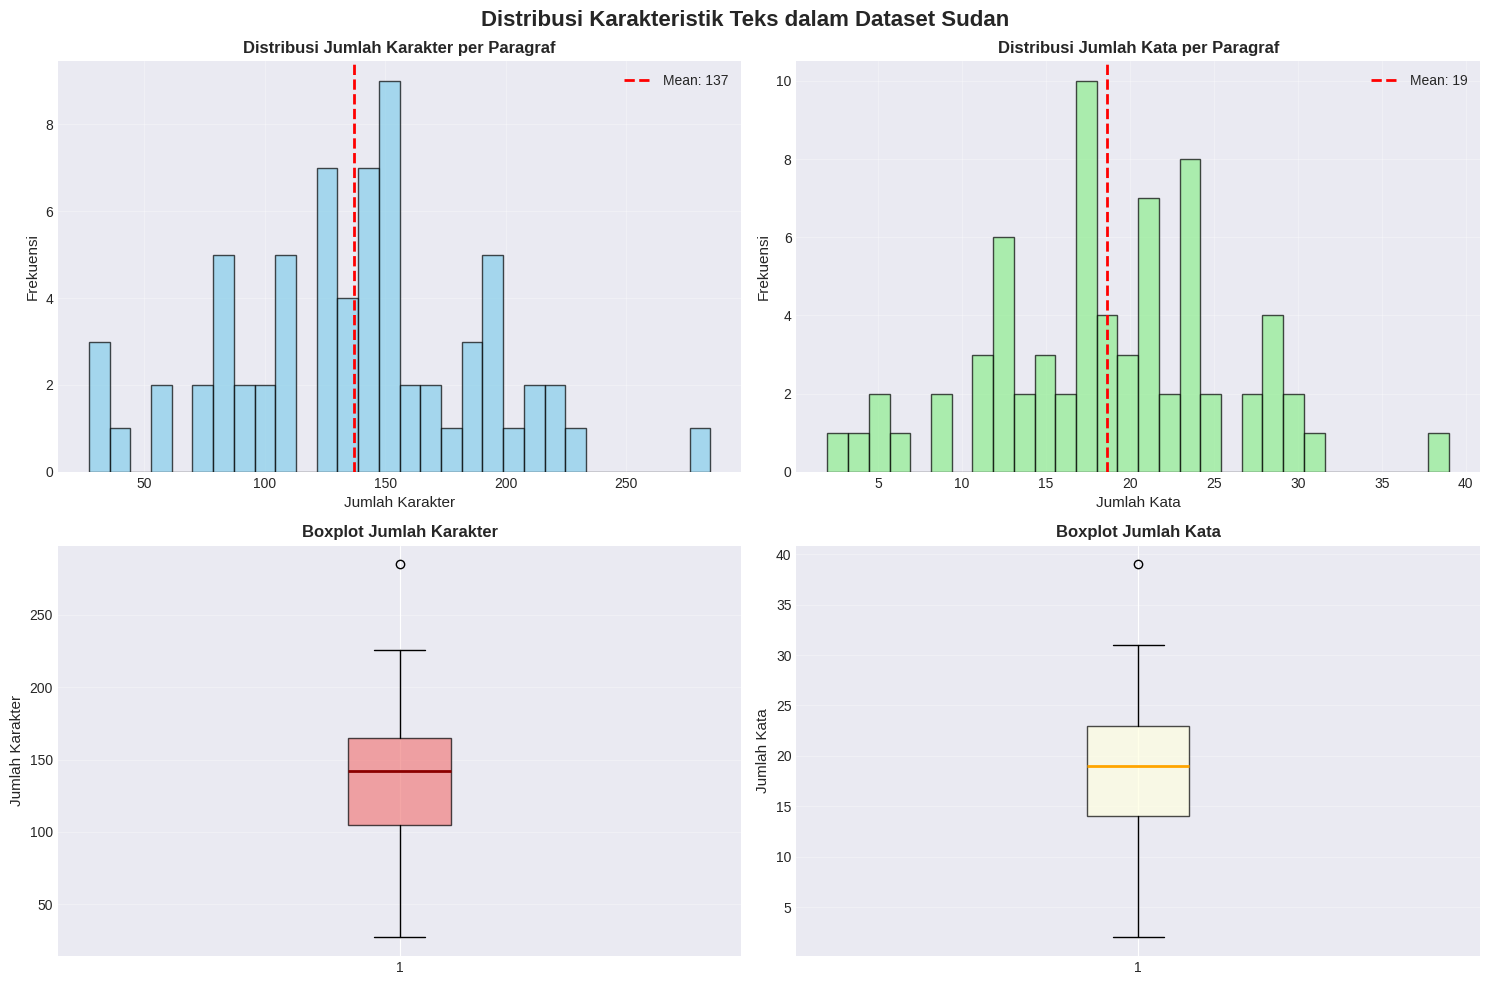

✓ Visualisasi distribusi data berhasil dibuat!


In [8]:
# Buat visualisasi distribusi
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribusi Karakteristik Teks dalam Dataset Sudan', fontsize=16, fontweight='bold')

# 1. Histogram jumlah karakter
axes[0, 0].hist(df['char_count'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Jumlah Karakter', fontsize=11)
axes[0, 0].set_ylabel('Frekuensi', fontsize=11)
axes[0, 0].set_title('Distribusi Jumlah Karakter per Paragraf', fontweight='bold')
axes[0, 0].axvline(df['char_count'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['char_count'].mean():.0f}")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Histogram jumlah kata
axes[0, 1].hist(df['word_count'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Jumlah Kata', fontsize=11)
axes[0, 1].set_ylabel('Frekuensi', fontsize=11)
axes[0, 1].set_title('Distribusi Jumlah Kata per Paragraf', fontweight='bold')
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['word_count'].mean():.0f}")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Boxplot jumlah karakter
axes[1, 0].boxplot(df['char_count'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightcoral', alpha=0.7),
                    medianprops=dict(color='darkred', linewidth=2))
axes[1, 0].set_ylabel('Jumlah Karakter', fontsize=11)
axes[1, 0].set_title('Boxplot Jumlah Karakter', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Boxplot jumlah kata
axes[1, 1].boxplot(df['word_count'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightyellow', alpha=0.7),
                    medianprops=dict(color='orange', linewidth=2))
axes[1, 1].set_ylabel('Jumlah Kata', fontsize=11)
axes[1, 1].set_title('Boxplot Jumlah Kata', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Visualisasi distribusi data berhasil dibuat!")

### 1.9 Simpan Dataset yang Telah Dibersihkan

Menyimpan dataset dalam format CSV untuk digunakan pada tahap selanjutnya.

In [9]:
# Simpan dataset ke CSV
output_path = '/content/drive/MyDrive/UTS/sudan_dataset.csv'

try:
    df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"✓ Dataset berhasil disimpan ke: {output_path}")
    print(f"\nUkuran file: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
except Exception as e:
    print(f"❌ Error saat menyimpan file: {e}")

✓ Dataset berhasil disimpan ke: /content/drive/MyDrive/UTS/sudan_dataset.csv

Ukuran file: 16.16 KB


# Tahap 2: Text Preprocessing

## Tujuan Tahap Ini:

Pada tahap preprocessing, kita akan membersihkan dan mempersiapkan teks agar siap untuk analisis lebih lanjut. Tahap ini meliputi:

1. **Lowercasing**: Mengubah semua teks menjadi huruf kecil
2. **Penghapusan tanda baca dan karakter khusus**: Membersihkan noise dari teks
3. **Tokenisasi**: Memecah teks menjadi kata-kata individual (tokens)
4. **Penghapusan Stopwords**: Menghilangkan kata-kata umum yang kurang informatif
5. **Stemming**: Mengubah kata ke bentuk dasarnya


## 2.1 Import Library dan Load Dataset

Library yang digunakan:
- **NLTK**: Natural Language Toolkit untuk text processing
- **re**: Regular expression untuk pattern matching
- **string**: Untuk handling punctuation
- **pandas**: Untuk manipulasi data

In [1]:
# Install dan import library yang diperlukan
import pandas as pd
import numpy as np
import re
import string

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Install NLTK jika belum ada
import nltk
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('punkt_tab', quiet=True)

# Import komponen NLTK
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("✓ Semua library berhasil diimport!")
print("✓ NLTK data berhasil didownload!")

# Mount Google Drive (jika belum)
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

print("✓ Google Drive terhubung!")

# Load dataset yang telah dibuat di Tahap 1
dataset_path = '/content/drive/MyDrive/UTS/sudan_dataset.csv'

try:
    df = pd.read_csv(dataset_path)
    print(f"✓ Dataset berhasil dimuat!")
    print(f"\nDimensi dataset: {df.shape[0]} baris × {df.shape[1]} kolom")
    print(f"\nKolom yang tersedia: {list(df.columns)}")

    # Preview dataset
    print("\n" + "=" * 80)
    print("Preview Dataset")
    print("=" * 80)
    display(df.head())

except FileNotFoundError:
    print("❌ File tidak ditemukan. Pastikan Tahap 1 sudah dijalankan terlebih dahulu.")
except Exception as e:
    print(f"❌ Error: {e}")

✓ Semua library berhasil diimport!
✓ NLTK data berhasil didownload!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Google Drive terhubung!
✓ Dataset berhasil dimuat!

Dimensi dataset: 69 baris × 4 kolom

Kolom yang tersedia: ['text', 'char_count', 'word_count', 'sentence_count']

Preview Dataset


text  char_count  word_count  \
0  Aksi Milisi Di Sudan Yang Melancarkan Pembanta...          58           9   
1                        'Tugas Kami Hanya Membunuh'          27           4   
2  Sejumlah Pria Tertawa Lepas Saat Mobil Pikap Y...         144          21   
3  "Lihat semua ini. Lihat genosida ini," teriak ...          84          13   
4  Ia mengarahkan kamera ke wajahnya dan rekan-re...         129          18   

   sentence_count  
0               1  
1               1  
2               1  
3               3  
4               3

## 2.2 Inisialisasi Preprocessing Tools

Menyiapkan tools yang akan digunakan untuk preprocessing:

In [2]:
# Inisialisasi Stemmer (Porter Stemmer untuk Bahasa Inggris)
stemmer = PorterStemmer()

# Load stopwords Bahasa Inggris
stop_words_en = set(stopwords.words('english'))

# Karakter tanda baca
punctuation = string.punctuation

print("✓ Preprocessing tools berhasil diinisialisasi!")
print(f"\n📚 Jumlah stopwords (English): {len(stop_words_en)}")
print(f"\n🔤 Tanda baca yang akan dihapus: {punctuation}")
print(f"\n✂️ Stemmer yang digunakan: Porter Stemmer")

# Tampilkan contoh stopwords
print(f"\n📋 Contoh stopwords (20 pertama):")
print(list(stop_words_en)[:20])

✓ Preprocessing tools berhasil diinisialisasi!

📚 Jumlah stopwords (English): 198

🔤 Tanda baca yang akan dihapus: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~

✂️ Stemmer yang digunakan: Porter Stemmer

📋 Contoh stopwords (20 pertama):
['are', 'other', 'haven', 'myself', 'have', "we've", 'where', "i'd", "shan't", 'wasn', "i've", 'same', 'hers', 'once', 'being', 'until', "doesn't", "isn't", 've', 'when']


## 2.3 Fungsi Preprocessing

Membuat fungsi lengkap untuk melakukan semua tahap preprocessing:

In [3]:
def preprocess_text(text, remove_stopwords=True, apply_stemming=True):
    """
    Fungsi untuk melakukan preprocessing teks lengkap.

    Parameters:
    -----------
    text : str
        Teks input yang akan diproses
    remove_stopwords : bool, default=True
        Flag untuk menghapus stopwords
    apply_stemming : bool, default=True
        Flag untuk melakukan stemming

    Returns:
    --------
    dict : Dictionary berisi hasil setiap tahap preprocessing
    """

    # Simpan teks original
    original_text = text

    # TAHAP 1: Lowercasing - Ubah semua huruf menjadi lowercase
    text_lower = text.lower()

    # TAHAP 2: Hapus URL, email, mention, hashtag
    text_clean = re.sub(r'http\S+|www\S+|https\S+', '', text_lower, flags=re.MULTILINE)
    text_clean = re.sub(r'\S+@\S+', '', text_clean)  # Hapus email
    text_clean = re.sub(r'@\w+', '', text_clean)  # Hapus mention
    text_clean = re.sub(r'#\w+', '', text_clean)  # Hapus hashtag

    # TAHAP 3: Hapus angka
    text_clean = re.sub(r'\d+', '', text_clean)

    # TAHAP 4: Hapus tanda baca dan karakter khusus
    # Buat translation table untuk menghapus punctuation
    translator = str.maketrans('', '', string.punctuation)
    text_no_punct = text_clean.translate(translator)

    # Hapus karakter khusus lainnya
    text_no_punct = re.sub(r'[^a-zA-Z\s]', '', text_no_punct)

    # Hapus whitespace berlebih
    text_no_punct = ' '.join(text_no_punct.split())

    # TAHAP 5: Tokenisasi - Pecah teks menjadi list of words
    tokens = word_tokenize(text_no_punct)

    # TAHAP 6: Stopwords Removal - Hapus stopwords
    if remove_stopwords:
        tokens_no_stopwords = [word for word in tokens if word not in stop_words_en]
    else:
        tokens_no_stopwords = tokens

    # TAHAP 7: Stemming - Ubah kata ke bentuk dasarnya
    if apply_stemming:
        tokens_stemmed = [stemmer.stem(word) for word in tokens_no_stopwords]
    else:
        tokens_stemmed = tokens_no_stopwords

    # Gabungkan tokens kembali menjadi string
    text_final = ' '.join(tokens_stemmed)

    # Return hasil setiap tahap untuk analisis
    return {
        'original': original_text,
        'lowercased': text_lower,
        'no_punctuation': text_no_punct,
        'tokens': tokens,
        'tokens_no_stopwords': tokens_no_stopwords,
        'tokens_stemmed': tokens_stemmed,
        'preprocessed': text_final
    }

print("✓ Fungsi preprocessing berhasil dibuat!")
print("\nFungsi ini melakukan 7 tahap preprocessing:")
print("  1. Lowercasing")
print("  2. Pembersihan URL, email, mention, hashtag")
print("  3. Penghapusan angka")
print("  4. Penghapusan tanda baca dan karakter khusus")
print("  5. Tokenisasi")
print("  6. Stopwords removal")
print("  7. Stemming")

✓ Fungsi preprocessing berhasil dibuat!

Fungsi ini melakukan 7 tahap preprocessing:
  1. Lowercasing
  2. Pembersihan URL, email, mention, hashtag
  3. Penghapusan angka
  4. Penghapusan tanda baca dan karakter khusus
  5. Tokenisasi
  6. Stopwords removal
  7. Stemming


## 2.4 Demonstrasi Preprocessing

### Contoh 1: Preprocessing Step-by-Step

Mari kita lihat bagaimana setiap tahap preprocessing bekerja dengan contoh teks:

In [4]:
# Ambil contoh teks dari dataset (paragraf pertama)
sample_text = df['text'].iloc[0]

# Lakukan preprocessing
result = preprocess_text(sample_text)

# Tampilkan hasil setiap tahap
print("=" * 100)
print("CONTOH PREPROCESSING STEP-BY-STEP")
print("=" * 100)

print("\n📝 TEKS ORIGINAL:")
print("-" * 100)
print(result['original'])
print(f"\nPanjang: {len(result['original'])} karakter")

print("\n\n🔽 TAHAP 1: LOWERCASING")
print("-" * 100)
print(result['lowercased'])
print(f"\nPanjang: {len(result['lowercased'])} karakter")

print("\n\n🧹 TAHAP 2-4: CLEANING (Hapus Punctuation & Special Characters)")
print("-" * 100)
print(result['no_punctuation'])
print(f"\nPanjang: {len(result['no_punctuation'])} karakter")

print("\n\n✂️ TAHAP 5: TOKENISASI")
print("-" * 100)
print(f"Tokens: {result['tokens'][:20]}...")  # Tampilkan 20 token pertama
print(f"\nJumlah tokens: {len(result['tokens'])} kata")

print("\n\n🚫 TAHAP 6: STOPWORDS REMOVAL")
print("-" * 100)
print(f"Tokens (tanpa stopwords): {result['tokens_no_stopwords'][:20]}...")  # Tampilkan 20 token pertama
print(f"\nJumlah tokens: {len(result['tokens_no_stopwords'])} kata")
print(f"Stopwords dihapus: {len(result['tokens']) - len(result['tokens_no_stopwords'])} kata")

print("\n\n🌱 TAHAP 7: STEMMING")
print("-" * 100)
print(f"Tokens (stemmed): {result['tokens_stemmed'][:20]}...")  # Tampilkan 20 token pertama
print(f"\nJumlah tokens: {len(result['tokens_stemmed'])} kata")

print("\n\n✅ HASIL AKHIR PREPROCESSING:")
print("-" * 100)
print(result['preprocessed'])
print(f"\nPanjang: {len(result['preprocessed'])} karakter")

print("\n" + "=" * 100)

CONTOH PREPROCESSING STEP-BY-STEP

📝 TEKS ORIGINAL:
----------------------------------------------------------------------------------------------------
Aksi Milisi Di Sudan Yang Melancarkan Pembantaian Brutal –

Panjang: 58 karakter


🔽 TAHAP 1: LOWERCASING
----------------------------------------------------------------------------------------------------
aksi milisi di sudan yang melancarkan pembantaian brutal –

Panjang: 58 karakter


🧹 TAHAP 2-4: CLEANING (Hapus Punctuation & Special Characters)
----------------------------------------------------------------------------------------------------
aksi milisi di sudan yang melancarkan pembantaian brutal

Panjang: 56 karakter


✂️ TAHAP 5: TOKENISASI
----------------------------------------------------------------------------------------------------
Tokens: ['aksi', 'milisi', 'di', 'sudan', 'yang', 'melancarkan', 'pembantaian', 'brutal']...

Jumlah tokens: 8 kata


🚫 TAHAP 6: STOPWORDS REMOVAL
-----------------------------------------

### Contoh 2: Perbandingan Sebelum dan Sesudah (3 Sampel)

In [5]:
# Ambil 3 contoh teks dari dataset
sample_indices = [0, min(5, len(df)-1), min(10, len(df)-1)]  # Indeks 0, 5, 10 (atau kurang jika data terbatas)

print("=" * 100)
print("PERBANDINGAN SEBELUM DAN SESUDAH PREPROCESSING (3 Sampel)")
print("=" * 100)

for idx, i in enumerate(sample_indices, 1):
    if i < len(df):
        text = df['text'].iloc[i]
        result = preprocess_text(text)

        print(f"\n\n{'='*100}")
        print(f"SAMPEL {idx}")
        print(f"{'='*100}")

        print("\n📌 SEBELUM PREPROCESSING:")
        print("-" * 100)
        print(text[:300] + "..." if len(text) > 300 else text)  # Tampilkan max 300 karakter
        print(f"\n📊 Statistik: {len(text)} karakter, ~{len(text.split())} kata")

        print("\n✅ SESUDAH PREPROCESSING:")
        print("-" * 100)
        print(result['preprocessed'][:300] + "..." if len(result['preprocessed']) > 300 else result['preprocessed'])
        print(f"\n📊 Statistik: {len(result['preprocessed'])} karakter, {len(result['tokens_stemmed'])} kata")

        print(f"\n📉 Pengurangan: {len(text) - len(result['preprocessed'])} karakter ({((len(text) - len(result['preprocessed'])) / len(text) * 100):.1f}% berkurang)")

PERBANDINGAN SEBELUM DAN SESUDAH PREPROCESSING (3 Sampel)


SAMPEL 1

📌 SEBELUM PREPROCESSING:
----------------------------------------------------------------------------------------------------
Aksi Milisi Di Sudan Yang Melancarkan Pembantaian Brutal –

📊 Statistik: 58 karakter, ~9 kata

✅ SESUDAH PREPROCESSING:
----------------------------------------------------------------------------------------------------
aksi milisi di sudan yang melancarkan pembantaian brutal

📊 Statistik: 56 karakter, 8 kata

📉 Pengurangan: 2 karakter (3.4% berkurang)


SAMPEL 2

📌 SEBELUM PREPROCESSING:
----------------------------------------------------------------------------------------------------
"Mereka semua akan mati seperti ini," ujarnya sembari menenteng senjata api.

📊 Statistik: 76 karakter, ~11 kata

✅ SESUDAH PREPROCESSING:
----------------------------------------------------------------------------------------------------
mereka semua akan mati seperti ini ujarnya sembari menenteng senjata a

## 2.5 Terapkan Preprocessing ke Seluruh Dataset

Sekarang kita akan menerapkan preprocessing ke seluruh dataset:

In [6]:
# Fungsi simplified untuk apply ke dataframe
def preprocess_simple(text):
    """
    Fungsi preprocessing simplified yang hanya return hasil akhir.
    Digunakan untuk apply ke seluruh dataframe.
    """
    if pd.isna(text) or text == '':
        return ''

    result = preprocess_text(text)
    return result['preprocessed']

# Fungsi untuk mendapatkan tokens (untuk analisis lebih lanjut)
def get_tokens(text):
    """
    Fungsi untuk mendapatkan list of tokens dari hasil preprocessing.
    """
    if pd.isna(text) or text == '':
        return []

    result = preprocess_text(text)
    return result['tokens_stemmed']

print("✓ Fungsi simplified berhasil dibuat!")
print("\nMulai preprocessing seluruh dataset...")
print("⏳ Mohon tunggu, proses ini mungkin memakan waktu beberapa saat...")

# Terapkan preprocessing ke kolom 'text'
# Buat kolom baru untuk hasil preprocessing

# 1. Preprocessed text (string)
df['text_preprocessed'] = df['text'].apply(preprocess_simple)

# 2. Tokens (list)
df['tokens'] = df['text'].apply(get_tokens)

# 3. Hitung jumlah tokens setelah preprocessing
df['token_count'] = df['tokens'].apply(len)

print("✓ Preprocessing selesai untuk seluruh dataset!")
print(f"\n📊 Dataset sekarang memiliki {len(df.columns)} kolom:")
for col in df.columns:
    print(f"   - {col}")

✓ Fungsi simplified berhasil dibuat!

Mulai preprocessing seluruh dataset...
⏳ Mohon tunggu, proses ini mungkin memakan waktu beberapa saat...
✓ Preprocessing selesai untuk seluruh dataset!

📊 Dataset sekarang memiliki 7 kolom:
   - text
   - char_count
   - word_count
   - sentence_count
   - text_preprocessed
   - tokens
   - token_count


## 2.6 Analisis Hasil Preprocessing

### Preview Dataset Setelah Preprocessing

In [7]:
# Tampilkan hasil preprocessing
print("=" * 100)
print("PREVIEW DATASET SETELAH PREPROCESSING")
print("=" * 100)

# Pilih kolom yang relevan untuk ditampilkan
display_df = df[['text', 'text_preprocessed', 'word_count', 'token_count']].head(5)
display(display_df)

print(f"\nℹ️ Kolom 'text' = teks original")
print(f"ℹ️ Kolom 'text_preprocessed' = teks setelah preprocessing")
print(f"ℹ️ Kolom 'word_count' = jumlah kata sebelum preprocessing")
print(f"ℹ️ Kolom 'token_count' = jumlah tokens setelah preprocessing")

PREVIEW DATASET SETELAH PREPROCESSING


text  \
0  Aksi Milisi Di Sudan Yang Melancarkan Pembanta...   
1                        'Tugas Kami Hanya Membunuh'   
2  Sejumlah Pria Tertawa Lepas Saat Mobil Pikap Y...   
3  "Lihat semua ini. Lihat genosida ini," teriak ...   
4  Ia mengarahkan kamera ke wajahnya dan rekan-re...   

                                   text_preprocessed  word_count  token_count  
0  aksi milisi di sudan yang melancarkan pembanta...           9            8  
1                           tuga kami hanya membunuh           4            4  
2  sejumlah pria tertawa lepa saat mobil pikap ya...          21           21  
3  lihat semua ini lihat genosida ini teriak sala...          13           13  
4  ia mengarahkan kamera ke wajahnya dan rekanrek...          18           18


ℹ️ Kolom 'text' = teks original
ℹ️ Kolom 'text_preprocessed' = teks setelah preprocessing
ℹ️ Kolom 'word_count' = jumlah kata sebelum preprocessing
ℹ️ Kolom 'token_count' = jumlah tokens setelah preprocessing


### Statistik Perbandingan

In [8]:
# Hitung statistik perbandingan
print("=" * 100)
print("STATISTIK PERBANDINGAN: SEBELUM vs SESUDAH PREPROCESSING")
print("=" * 100)

# Statistik sebelum preprocessing
total_chars_before = df['char_count'].sum()
total_words_before = df['word_count'].sum()
avg_words_before = df['word_count'].mean()

# Statistik sesudah preprocessing
total_chars_after = df['text_preprocessed'].apply(len).sum()
total_tokens_after = df['token_count'].sum()
avg_tokens_after = df['token_count'].mean()

# Hitung pengurangan
char_reduction = total_chars_before - total_chars_after
char_reduction_pct = (char_reduction / total_chars_before) * 100

word_reduction = total_words_before - total_tokens_after
word_reduction_pct = (word_reduction / total_words_before) * 100

print("\n📊 SEBELUM PREPROCESSING:")
print("-" * 100)
print(f"Total Karakter: {total_chars_before:,}")
print(f"Total Kata: {total_words_before:,}")
print(f"Rata-rata Kata per Dokumen: {avg_words_before:.2f}")

print("\n📊 SESUDAH PREPROCESSING:")
print("-" * 100)
print(f"Total Karakter: {total_chars_after:,}")
print(f"Total Tokens: {total_tokens_after:,}")
print(f"Rata-rata Tokens per Dokumen: {avg_tokens_after:.2f}")

print("\n📉 PENGURANGAN:")
print("-" * 100)
print(f"Karakter berkurang: {char_reduction:,} ({char_reduction_pct:.2f}%)")
print(f"Kata/Tokens berkurang: {word_reduction:,} ({word_reduction_pct:.2f}%)")

print("\n💡 INSIGHT:")
print("-" * 100)
print(f"Preprocessing berhasil mengurangi dimensi data sebesar {word_reduction_pct:.1f}%")
print(f"Rata-rata setiap dokumen kehilangan {avg_words_before - avg_tokens_after:.1f} kata melalui proses cleaning")

STATISTIK PERBANDINGAN: SEBELUM vs SESUDAH PREPROCESSING

📊 SEBELUM PREPROCESSING:
----------------------------------------------------------------------------------------------------
Total Karakter: 9,470
Total Kata: 1,288
Rata-rata Kata per Dokumen: 18.67

📊 SESUDAH PREPROCESSING:
----------------------------------------------------------------------------------------------------
Total Karakter: 9,001
Total Tokens: 1,272
Rata-rata Tokens per Dokumen: 18.43

📉 PENGURANGAN:
----------------------------------------------------------------------------------------------------
Karakter berkurang: 469 (4.95%)
Kata/Tokens berkurang: 16 (1.24%)

💡 INSIGHT:
----------------------------------------------------------------------------------------------------
Preprocessing berhasil mengurangi dimensi data sebesar 1.2%
Rata-rata setiap dokumen kehilangan 0.2 kata melalui proses cleaning


## 2.7 Visualisasi Hasil Preprocessing

/tmp/ipython-input-3319825988.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[0, 1].boxplot(data_comparison, labels=['Sebelum', 'Sesudah'],


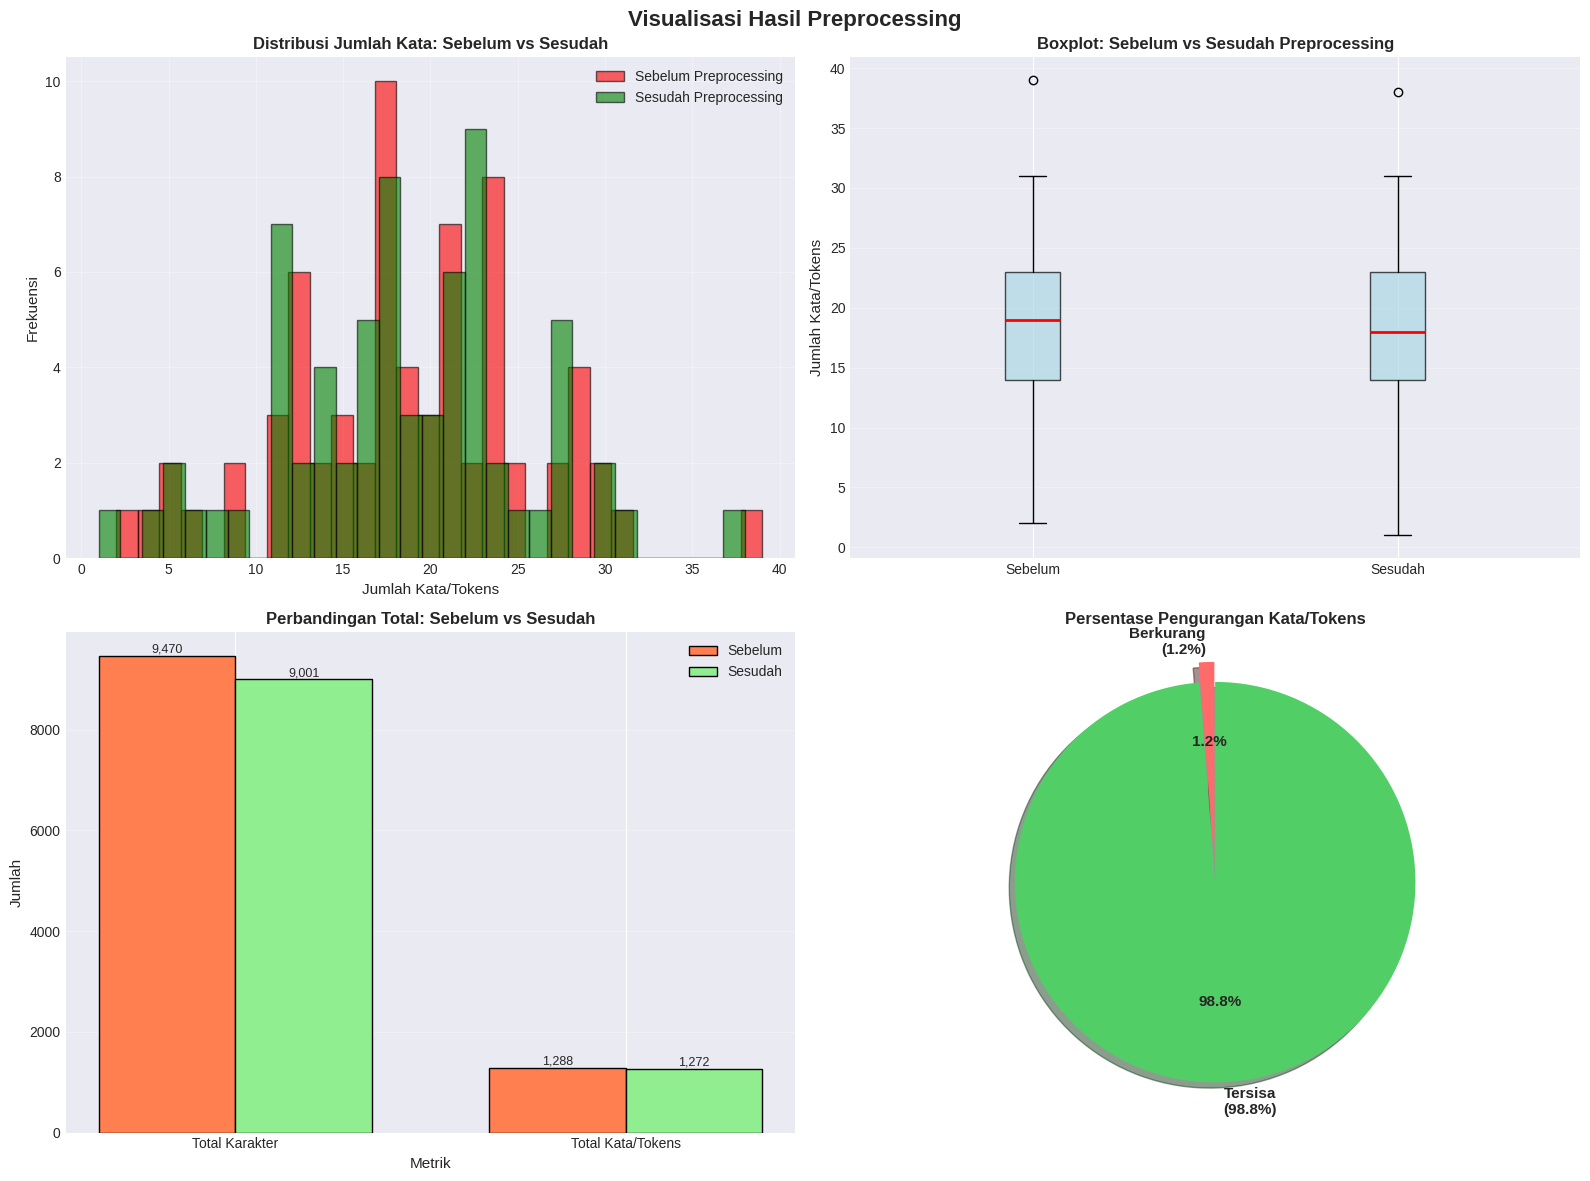

✓ Visualisasi berhasil dibuat!


In [9]:
# Visualisasi perbandingan
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Visualisasi Hasil Preprocessing', fontsize=16, fontweight='bold')

# 1. Perbandingan distribusi word count
axes[0, 0].hist(df['word_count'], bins=30, alpha=0.6, label='Sebelum Preprocessing', color='red', edgecolor='black')
axes[0, 0].hist(df['token_count'], bins=30, alpha=0.6, label='Sesudah Preprocessing', color='green', edgecolor='black')
axes[0, 0].set_xlabel('Jumlah Kata/Tokens', fontsize=11)
axes[0, 0].set_ylabel('Frekuensi', fontsize=11)
axes[0, 0].set_title('Distribusi Jumlah Kata: Sebelum vs Sesudah', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Boxplot perbandingan
data_comparison = [df['word_count'], df['token_count']]
box = axes[0, 1].boxplot(data_comparison, labels=['Sebelum', 'Sesudah'],
                          patch_artist=True,
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
axes[0, 1].set_ylabel('Jumlah Kata/Tokens', fontsize=11)
axes[0, 1].set_title('Boxplot: Sebelum vs Sesudah Preprocessing', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Bar chart pengurangan
categories = ['Total Karakter', 'Total Kata/Tokens']
before_values = [total_chars_before, total_words_before]
after_values = [total_chars_after, total_tokens_after]

x = np.arange(len(categories))
width = 0.35

bars1 = axes[1, 0].bar(x - width/2, before_values, width, label='Sebelum', color='coral', edgecolor='black')
bars2 = axes[1, 0].bar(x + width/2, after_values, width, label='Sesudah', color='lightgreen', edgecolor='black')

axes[1, 0].set_xlabel('Metrik', fontsize=11)
axes[1, 0].set_ylabel('Jumlah', fontsize=11)
axes[1, 0].set_title('Perbandingan Total: Sebelum vs Sesudah', fontweight='bold')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(categories)
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for bar in bars1:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height):,}',
                    ha='center', va='bottom', fontsize=9)

# 4. Pie chart pengurangan persentase
reduction_data = [word_reduction_pct, 100 - word_reduction_pct]
labels_pie = [f'Berkurang\n({word_reduction_pct:.1f}%)', f'Tersisa\n({100 - word_reduction_pct:.1f}%)']
colors_pie = ['#ff6b6b', '#51cf66']
explode = (0.1, 0)

axes[1, 1].pie(reduction_data, labels=labels_pie, colors=colors_pie, autopct='%1.1f%%',
               startangle=90, explode=explode, shadow=True, textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1, 1].set_title('Persentase Pengurangan Kata/Tokens', fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualisasi berhasil dibuat!")

## 2.8 Analisis Top Words

### Top 20 Kata Sebelum Preprocessing

In [10]:
from collections import Counter

# Hitung frekuensi kata sebelum preprocessing
all_words_before = []
for text in df['text']:
    words = text.lower().split()
    # Hapus punctuation dari setiap kata
    words = [word.strip(string.punctuation) for word in words]
    all_words_before.extend(words)

word_freq_before = Counter(all_words_before)
top_20_before = word_freq_before.most_common(20)

print("=" * 100)
print("TOP 20 KATA PALING SERING MUNCUL (SEBELUM PREPROCESSING)")
print("=" * 100)
print(f"\n{'Rank':<6} {'Kata':<20} {'Frekuensi':<12} {'Persentase':<12}")
print("-" * 100)

total_words_before = len(all_words_before)
for i, (word, freq) in enumerate(top_20_before, 1):
    percentage = (freq / total_words_before) * 100
    print(f"{i:<6} {word:<20} {freq:<12} {percentage:.2f}%")

print(f"\n💡 Banyak stopwords ('the', 'of', 'and', dll.) mendominasi sebelum preprocessing")

TOP 20 KATA PALING SERING MUNCUL (SEBELUM PREPROCESSING)

Rank   Kata                 Frekuensi    Persentase  
----------------------------------------------------------------------------------------------------
1      yang                 48           3.73%
2      di                   41           3.18%
3      rsf                  29           2.25%
4      itu                  29           2.25%
5      dan                  21           1.63%
6      mereka               17           1.32%
7      dalam                14           1.09%
8      dari                 13           1.01%
9      pria                 12           0.93%
10     el-fasher            12           0.93%
11     kota                 11           0.85%
12     pada                 11           0.85%
13     bahwa                11           0.85%
14     video                11           0.85%
15     rekaman              11           0.85%
16     dengan               11           0.85%
17     ke                   10     

### Top 20 Tokens Setelah Preprocessing

In [11]:
# Hitung frekuensi tokens setelah preprocessing
all_tokens_after = []
for tokens in df['tokens']:
    all_tokens_after.extend(tokens)

token_freq_after = Counter(all_tokens_after)
top_20_after = token_freq_after.most_common(20)

print("=" * 100)
print("TOP 20 TOKENS PALING SERING MUNCUL (SESUDAH PREPROCESSING)")
print("=" * 100)
print(f"\n{'Rank':<6} {'Token':<20} {'Frekuensi':<12} {'Persentase':<12}")
print("-" * 100)

total_tokens_after = len(all_tokens_after)
for i, (token, freq) in enumerate(top_20_after, 1):
    percentage = (freq / total_tokens_after) * 100
    print(f"{i:<6} {token:<20} {freq:<12} {percentage:.2f}%")

print(f"\n💡 Stopwords sudah dihapus, tokens yang tersisa lebih informatif dan relevan")

TOP 20 TOKENS PALING SERING MUNCUL (SESUDAH PREPROCESSING)

Rank   Token                Frekuensi    Persentase  
----------------------------------------------------------------------------------------------------
1      yang                 49           3.85%
2      di                   41           3.22%
3      rsf                  30           2.36%
4      itu                  29           2.28%
5      dan                  21           1.65%
6      mereka               17           1.34%
7      dalam                14           1.10%
8      dari                 13           1.02%
9      pria                 12           0.94%
10     elfash               12           0.94%
11     ke                   11           0.86%
12     kota                 11           0.86%
13     pada                 11           0.86%
14     bahwa                11           0.86%
15     video                11           0.86%
16     rekaman              11           0.86%
17     dengan               11   

## 2.9 Simpan Hasil Preprocessing

Menyimpan dataset yang sudah dipreprocess untuk tahap analisis selanjutnya:

In [12]:
# Simpan dataset dengan hasil preprocessing
output_path_csv = '/content/drive/MyDrive/UTS/sudan_preprocessed.csv'

# Buat DataFrame untuk disimpan (tanpa kolom list)
df_to_save = df[['text', 'text_preprocessed', 'word_count', 'token_count']].copy()

try:
    # Simpan ke CSV
    df_to_save.to_csv(output_path_csv, index=False, encoding='utf-8')
    print(f"✓ Dataset preprocessed berhasil disimpan ke: {output_path_csv}")

    # Simpan juga tokens dalam format pickle untuk analisis lebih lanjut
    output_path_pkl = '/content/drive/MyDrive/UTS/sudan_tokens.pkl'
    df.to_pickle(output_path_pkl)
    print(f"✓ Dataset dengan tokens berhasil disimpan ke: {output_path_pkl}")

    print(f"\n📊 Ukuran file CSV: {df_to_save.memory_usage(deep=True).sum() / 1024:.2f} KB")
    print(f"📊 Jumlah baris: {len(df_to_save)}")
    print(f"📊 Jumlah kolom: {len(df_to_save.columns)}")

except Exception as e:
    print(f"❌ Error saat menyimpan file: {e}")

✓ Dataset preprocessed berhasil disimpan ke: /content/drive/MyDrive/UTS/sudan_preprocessed.csv
✓ Dataset dengan tokens berhasil disimpan ke: /content/drive/MyDrive/UTS/sudan_tokens.pkl

📊 Ukuran file CSV: 27.71 KB
📊 Jumlah baris: 69
📊 Jumlah kolom: 4


## 2.10 Ringkasan Statistik Akhir

In [13]:
# Buat ringkasan statistik lengkap
print("=" * 100)
print("RINGKASAN STATISTIK PREPROCESSING")
print("=" * 100)

summary_stats = {
    'Metrik': [
        'Jumlah Dokumen',
        'Total Kata (Sebelum)',
        'Total Tokens (Sesudah)',
        'Rata-rata Kata per Dokumen (Sebelum)',
        'Rata-rata Tokens per Dokumen (Sesudah)',
        'Pengurangan Total (%)',
        'Unique Words (Sebelum)',
        'Unique Tokens (Sesudah)',
    ],
    'Nilai': [
        len(df),
        f"{total_words_before:,}",
        f"{total_tokens_after:,}",
        f"{avg_words_before:.2f}",
        f"{avg_tokens_after:.2f}",
        f"{word_reduction_pct:.2f}%",
        f"{len(word_freq_before):,}",
        f"{len(token_freq_after):,}",
    ]
}

summary_df = pd.DataFrame(summary_stats)
print("\n")
display(summary_df)

print("\n" + "=" * 100)
print("TAHAPAN PREPROCESSING YANG DILAKUKAN:")
print("=" * 100)
print("""
1. ✓ Lowercasing - Mengubah semua teks ke huruf kecil
2. ✓ Cleaning - Menghapus URL, email, mention, hashtag, dan angka
3. ✓ Punctuation Removal - Menghapus tanda baca dan karakter khusus
4. ✓ Tokenization - Memecah teks menjadi kata-kata (tokens)
5. ✓ Stopwords Removal - Menghapus kata-kata umum yang kurang informatif
6. ✓ Stemming - Mengubah kata ke bentuk dasarnya menggunakan Porter Stemmer
""")

print("\n💡 INSIGHT & KESIMPULAN:")
print("=" * 100)
print(f"""
1. Preprocessing berhasil mengurangi {word_reduction_pct:.1f}% dari total kata/tokens
2. Vocabulary (unique words) berkurang dari {len(word_freq_before):,} menjadi {len(token_freq_after):,}
3. Dataset kini lebih bersih dan siap untuk analisis lebih lanjut
4. Stopwords yang tidak informatif telah dihapus
5. Kata-kata telah dinormalisasi ke bentuk dasarnya (stemming)
""")

print("=" * 100)
print("✓ TAHAP 2: PREPROCESSING SELESAI!")
print("=" * 100)

RINGKASAN STATISTIK PREPROCESSING




Metrik  Nilai
0                          Jumlah Dokumen     69
1                    Total Kata (Sebelum)  1,288
2                  Total Tokens (Sesudah)  1,272
3    Rata-rata Kata per Dokumen (Sebelum)  18.67
4  Rata-rata Tokens per Dokumen (Sesudah)  18.43
5                   Pengurangan Total (%)  1.24%
6                  Unique Words (Sebelum)    602
7                 Unique Tokens (Sesudah)    582


TAHAPAN PREPROCESSING YANG DILAKUKAN:

1. ✓ Lowercasing - Mengubah semua teks ke huruf kecil
2. ✓ Cleaning - Menghapus URL, email, mention, hashtag, dan angka
3. ✓ Punctuation Removal - Menghapus tanda baca dan karakter khusus
4. ✓ Tokenization - Memecah teks menjadi kata-kata (tokens)
5. ✓ Stopwords Removal - Menghapus kata-kata umum yang kurang informatif
6. ✓ Stemming - Mengubah kata ke bentuk dasarnya menggunakan Porter Stemmer


💡 INSIGHT & KESIMPULAN:

1. Preprocessing berhasil mengurangi 1.2% dari total kata/tokens
2. Vocabulary (unique words) berkurang dari 602 menjadi 582
3. Dataset kini lebih bersih dan siap untuk analisis lebih lanjut
4. Stopwords yang tidak informatif telah dihapus
5. Kata-kata telah dinormalisasi ke bentuk dasarnya (stemming)

✓ TAHAP 2: PREPROCESSING SELESAI!


# Tahap 3: Feature Engineering

## Tujuan Tahap Ini:

Pada tahap Feature Engineering, kita akan mengubah teks yang sudah dipreprocess menjadi representasi numerik yang dapat digunakan untuk machine learning. Tahap ini meliputi:

1. **TF-IDF (Term Frequency-Inverse Document Frequency)**
   - Representasi berbasis statistik
   - Mengukur pentingnya kata dalam dokumen
   
2. **Word2Vec**
   - Representasi berbasis embedding
   - Menangkap semantic meaning dari kata

Kedua teknik ini akan memberikan perspektif berbeda dalam merepresentasikan teks untuk analisis lebih lanjut.

## 3.1 Import Library dan Load Dataset

In [19]:
!pip install gensim -q

# Import library dasar
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Import library untuk TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import library untuk Word2Vec
from gensim.models import Word2Vec
from gensim.models.phrases import Phrases, Phraser

# Import library untuk dimensionality reduction (visualisasi)
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE

# Import library untuk similarity
from sklearn.metrics.pairwise import cosine_similarity

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Set random seed untuk reproducibility
np.random.seed(42)

print("✓ Semua library berhasil diimport!")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

print("✓ Google Drive terhubung!")

# Load dataset hasil preprocessing dari Tahap 2
dataset_path_csv = '/content/drive/MyDrive/UTS/sudan_preprocessed.csv'
dataset_path_pkl = '/content/drive/MyDrive/UTS/sudan_tokens.pkl'

try:
    # Load CSV untuk teks yang sudah dipreprocess
    df = pd.read_csv(dataset_path_csv)

    # Load pickle untuk mendapatkan tokens
    df_full = pd.read_pickle(dataset_path_pkl)

    print("✓ Dataset berhasil dimuat!")
    print(f"\nDimensi dataset: {df.shape[0]} baris × {df.shape[1]} kolom")
    print(f"\nKolom yang tersedia: {list(df.columns)}")

    # Preview dataset
    print("\n" + "=" * 100)
    print("Preview Dataset")
    print("=" * 100)
    display(df.head())

except FileNotFoundError:
    print("❌ File tidak ditemukan. Pastikan Tahap 2 sudah dijalankan terlebih dahulu.")
except Exception as e:
    print(f"❌ Error: {e}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 64.1 MB/s eta 0:00:00
✓ Semua library berhasil diimport!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Google Drive terhubung!
✓ Dataset berhasil dimuat!

Dimensi dataset: 69 baris × 4 kolom

Kolom yang tersedia: ['text', 'text_preprocessed', 'word_count', 'token_count']

Preview Dataset


text  \
0  Aksi Milisi Di Sudan Yang Melancarkan Pembanta...   
1                        'Tugas Kami Hanya Membunuh'   
2  Sejumlah Pria Tertawa Lepas Saat Mobil Pikap Y...   
3  "Lihat semua ini. Lihat genosida ini," teriak ...   
4  Ia mengarahkan kamera ke wajahnya dan rekan-re...   

                                   text_preprocessed  word_count  token_count  
0  aksi milisi di sudan yang melancarkan pembanta...           9            8  
1                           tuga kami hanya membunuh           4            4  
2  sejumlah pria tertawa lepa saat mobil pikap ya...          21           21  
3  lihat semua ini lihat genosida ini teriak sala...          13           13  
4  ia mengarahkan kamera ke wajahnya dan rekanrek...          18           18

# PART 1: TF-IDF (Term Frequency-Inverse Document Frequency)

## 3.2 Konsep TF-IDF

### Apa itu TF-IDF?

**TF-IDF** adalah metode statistik yang digunakan untuk mengevaluasi seberapa penting sebuah kata terhadap sebuah dokumen dalam kumpulan dokumen (corpus).

### Komponen TF-IDF:

#### 1. **Term Frequency (TF)**
Mengukur seberapa sering sebuah kata muncul dalam dokumen.

$$TF(t, d) = \frac{\text{Jumlah kemunculan term } t \text{ dalam dokumen } d}{\text{Total jumlah term dalam dokumen } d}$$

**Interpretasi:** Semakin sering kata muncul, semakin penting kata tersebut untuk dokumen.

#### 2. **Inverse Document Frequency (IDF)**
Mengukur seberapa penting sebuah kata dalam seluruh corpus.

$$IDF(t, D) = \log\frac{\text{Total jumlah dokumen}}{\text{Jumlah dokumen yang mengandung term } t}$$

**Interpretasi:** Kata yang muncul di banyak dokumen dianggap kurang informatif (IDF rendah).

#### 3. **TF-IDF Score**
$$\text{TF-IDF}(t, d, D) = TF(t, d) \times IDF(t, D)$$

### Keunggulan TF-IDF:
✅ Mudah diimplementasikan dan dipahami

✅ Mengurangi bobot kata yang terlalu umum

✅ Meningkatkan bobot kata yang lebih informatif

✅ Tidak memerlukan training data yang besar

### Kelemahan TF-IDF:
❌ Tidak menangkap makna semantik kata

❌ Tidak mempertimbangkan urutan kata

❌ Sparse matrix (banyak nilai 0)

❌ Tidak menangkap hubungan antar kata (sinonim, antonim)

## 3.3 Implementasi TF-IDF

In [20]:
# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,        # Ambil maksimal 1000 fitur teratas
    min_df=2,                 # Kata harus muncul minimal di 2 dokumen
    max_df=0.8,               # Kata tidak boleh muncul di lebih dari 80% dokumen
    ngram_range=(1, 2),       # Unigram dan bigram
    sublinear_tf=True         # Gunakan logarithmic TF scaling
)

print("✓ TF-IDF Vectorizer berhasil diinisialisasi!")
print("\n⚙️ Parameter yang digunakan:")
print(f"   - max_features: 1000 (ambil 1000 fitur teratas)")
print(f"   - min_df: 2 (kata minimal muncul di 2 dokumen)")
print(f"   - max_df: 0.8 (kata maksimal muncul di 80% dokumen)")
print(f"   - ngram_range: (1, 2) (unigram dan bigram)")
print(f"   - sublinear_tf: True (gunakan log scaling)")

# Fit dan transform data
print("⏳ Memproses TF-IDF...\n")

# Gunakan text_preprocessed untuk TF-IDF
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text_preprocessed'])

# Dapatkan nama fitur (vocabulary)
feature_names = tfidf_vectorizer.get_feature_names_out()

print("✓ TF-IDF Matrix berhasil dibuat!")
print(f"\n📊 Dimensi TF-IDF Matrix: {tfidf_matrix.shape}")
print(f"   - {tfidf_matrix.shape[0]} dokumen")
print(f"   - {tfidf_matrix.shape[1]} fitur (unique words/bigrams)")
print(f"\n💾 Memory usage: {tfidf_matrix.data.nbytes / 1024:.2f} KB")
print(f"🔢 Sparsity: {(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.2f}%")

# Convert ke DataFrame untuk analisis
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=feature_names
)

print("\n✓ TF-IDF DataFrame berhasil dibuat untuk analisis!")

✓ TF-IDF Vectorizer berhasil diinisialisasi!

⚙️ Parameter yang digunakan:
   - max_features: 1000 (ambil 1000 fitur teratas)
   - min_df: 2 (kata minimal muncul di 2 dokumen)
   - max_df: 0.8 (kata maksimal muncul di 80% dokumen)
   - ngram_range: (1, 2) (unigram dan bigram)
   - sublinear_tf: True (gunakan log scaling)
⏳ Memproses TF-IDF...

✓ TF-IDF Matrix berhasil dibuat!

📊 Dimensi TF-IDF Matrix: (69, 277)
   - 69 dokumen
   - 277 fitur (unique words/bigrams)

💾 Memory usage: 8.15 KB
🔢 Sparsity: 94.54%

✓ TF-IDF DataFrame berhasil dibuat untuk analisis!


## 3.4 Analisis TF-IDF

### Preview TF-IDF Matrix

In [21]:
# Tampilkan sample TF-IDF matrix
print("=" * 100)
print("PREVIEW TF-IDF MATRIX (5 Dokumen × 10 Fitur Pertama)")
print("=" * 100)

# Ambil 5 dokumen dan 10 fitur pertama
sample_tfidf = tfidf_df.iloc[:5, :10]
display(sample_tfidf.round(4))

print("\nℹ️ Nilai TF-IDF berkisar antara 0 dan 1")
print("ℹ️ Nilai 0 = kata tidak ada dalam dokumen")
print("ℹ️ Nilai mendekati 1 = kata sangat penting untuk dokumen tersebut")

PREVIEW TF-IDF MATRIX (5 Dokumen × 10 Fitur Pertama)


abu  abu lulu  akan    aksi  akun  anakanak  anali  antara  antara mereka  \
0  0.0       0.0   0.0  0.3959   0.0       0.0    0.0     0.0            0.0   
1  0.0       0.0   0.0  0.0000   0.0       0.0    0.0     0.0            0.0   
2  0.0       0.0   0.0  0.0000   0.0       0.0    0.0     0.0            0.0   
3  0.0       0.0   0.0  0.0000   0.0       0.0    0.0     0.0            0.0   
4  0.0       0.0   0.0  0.0000   0.0       0.0    0.0     0.0            0.0   

   api  
0  0.0  
1  0.0  
2  0.0  
3  0.0  
4  0.0


ℹ️ Nilai TF-IDF berkisar antara 0 dan 1
ℹ️ Nilai 0 = kata tidak ada dalam dokumen
ℹ️ Nilai mendekati 1 = kata sangat penting untuk dokumen tersebut


### Top Features berdasarkan TF-IDF Score

In [22]:
# Hitung rata-rata TF-IDF score untuk setiap fitur
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Top 20 features
top_20_features = mean_tfidf.head(20)

print("=" * 100)
print("TOP 20 FEATURES DENGAN TF-IDF SCORE TERTINGGI")
print("=" * 100)
print(f"\n{'Rank':<6} {'Feature':<30} {'Rata-rata TF-IDF':<20}")
print("-" * 100)

for i, (feature, score) in enumerate(top_20_features.items(), 1):
    print(f"{i:<6} {feature:<30} {score:.6f}")

print("\n💡 Features dengan TF-IDF tinggi adalah kata-kata yang:")
print("   - Muncul cukup sering dalam beberapa dokumen")
print("   - TIDAK muncul di semua dokumen (lebih spesifik)")
print("   - Lebih informatif dan membedakan antar dokumen")

TOP 20 FEATURES DENGAN TF-IDF SCORE TERTINGGI

Rank   Feature                        Rata-rata TF-IDF    
----------------------------------------------------------------------------------------------------
1      yang                           0.075794
2      di                             0.067357
3      rsf                            0.060770
4      itu                            0.058301
5      dan                            0.051289
6      mereka                         0.042798
7      dari                           0.038563
8      dalam                          0.036988
9      kota                           0.036100
10     elfash                         0.035655
11     ke                             0.033129
12     pria                           0.032811
13     pada                           0.032440
14     dengan                         0.031242
15     video                          0.030625
16     rekaman                        0.030561
17     telah                          0.0

### Visualisasi Top TF-IDF Features

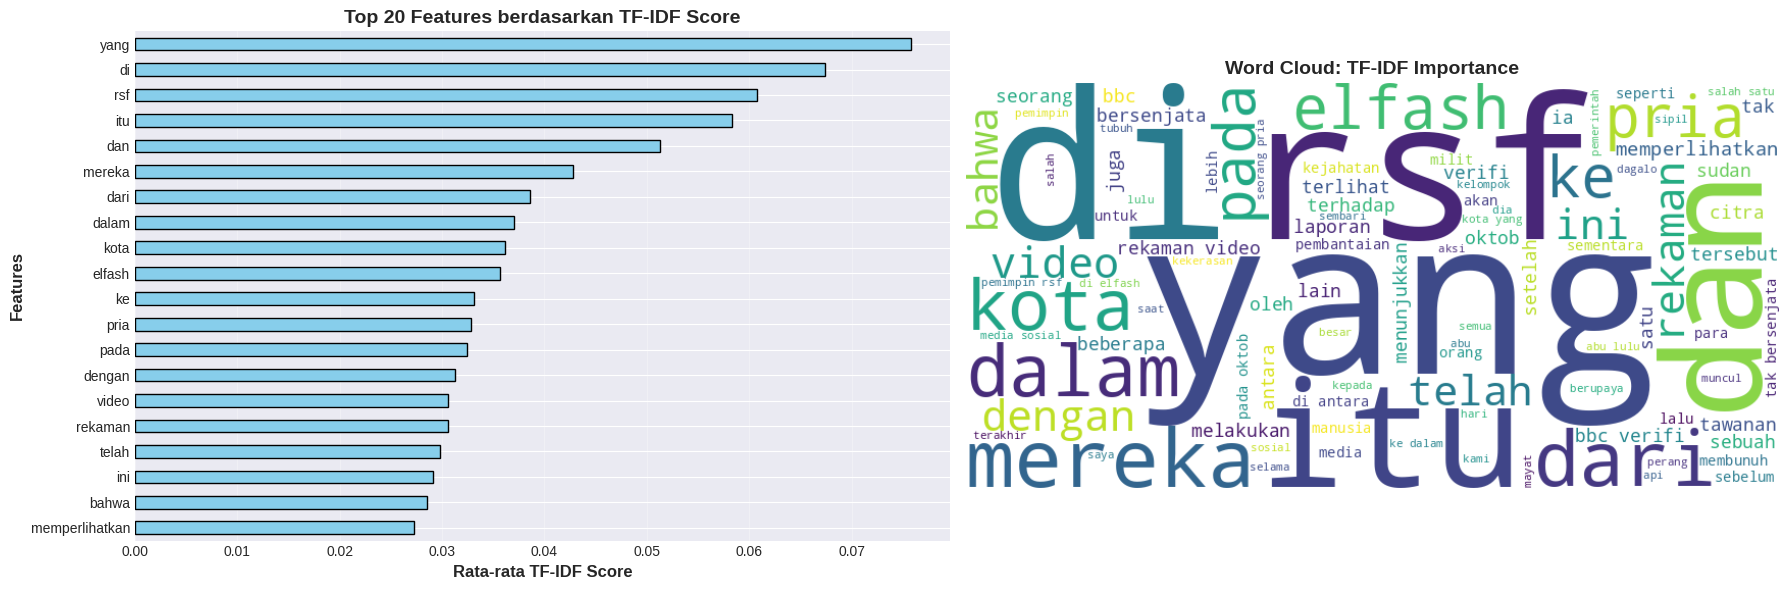

✓ Visualisasi TF-IDF berhasil dibuat!


In [23]:
# Visualisasi bar chart
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# 1. Bar chart horizontal untuk top 20 features
top_20_features.sort_values().plot(kind='barh', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_xlabel('Rata-rata TF-IDF Score', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Features', fontsize=12, fontweight='bold')
axes[0].set_title('Top 20 Features berdasarkan TF-IDF Score', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# 2. Word cloud untuk visualisasi TF-IDF
# Buat dictionary dari mean TF-IDF scores
tfidf_dict = mean_tfidf.to_dict()

wordcloud_tfidf = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=100
).generate_from_frequencies(tfidf_dict)

axes[1].imshow(wordcloud_tfidf, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud: TF-IDF Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Visualisasi TF-IDF berhasil dibuat!")

### Analisis Dokumen Spesifik menggunakan TF-IDF

In [24]:
# Pilih dokumen pertama untuk analisis detail
doc_idx = 0

# Ambil TF-IDF scores untuk dokumen ini
doc_tfidf = tfidf_df.iloc[doc_idx].sort_values(ascending=False)

# Filter hanya yang > 0
doc_tfidf_nonzero = doc_tfidf[doc_tfidf > 0]

print("=" * 100)
print(f"ANALISIS TF-IDF UNTUK DOKUMEN {doc_idx}")
print("=" * 100)

print(f"\n📄 Original Text:")
print("-" * 100)
print(df['text'].iloc[doc_idx][:300] + "...")

print(f"\n\n📊 Top 15 Kata/Phrase Paling Penting (berdasarkan TF-IDF):")
print("-" * 100)
print(f"{'Rank':<6} {'Feature':<30} {'TF-IDF Score':<15}")
print("-" * 100)

for i, (feature, score) in enumerate(doc_tfidf_nonzero.head(15).items(), 1):
    print(f"{i:<6} {feature:<30} {score:.6f}")

print(f"\n\n💡 Insight:")
print(f"   - Dokumen ini memiliki {len(doc_tfidf_nonzero)} unique features")
print(f"   - Kata-kata dengan TF-IDF tinggi adalah kata kunci dokumen ini")
print(f"   - Kata-kata ini membedakan dokumen ini dari dokumen lainnya")

ANALISIS TF-IDF UNTUK DOKUMEN 0

📄 Original Text:
----------------------------------------------------------------------------------------------------
Aksi Milisi Di Sudan Yang Melancarkan Pembantaian Brutal –...


📊 Top 15 Kata/Phrase Paling Penting (berdasarkan TF-IDF):
----------------------------------------------------------------------------------------------------
Rank   Feature                        TF-IDF Score   
----------------------------------------------------------------------------------------------------
1      di sudan                       0.425406
2      milisi                         0.425406
3      brutal                         0.425406
4      aksi                           0.395916
5      pembantaian                    0.354351
6      sudan                          0.338549
7      di                             0.186006
8      yang                           0.159877


💡 Insight:
   - Dokumen ini memiliki 8 unique features
   - Kata-kata dengan TF-IDF tinggi ad

### Similarity Analysis menggunakan TF-IDF

In [25]:
# Hitung cosine similarity antar dokumen
cosine_sim_matrix = cosine_similarity(tfidf_matrix)

print("=" * 100)
print("ANALISIS SIMILARITY ANTAR DOKUMEN (TF-IDF + Cosine Similarity)")
print("=" * 100)

print(f"\n📊 Dimensi Similarity Matrix: {cosine_sim_matrix.shape}")
print(f"\n💡 Cosine Similarity berkisar antara 0 dan 1:")
print(f"   - 0 = Dokumen sangat berbeda")
print(f"   - 1 = Dokumen identik")

# Statistik similarity
# Set diagonal ke NaN untuk mengabaikan self-similarity
np.fill_diagonal(cosine_sim_matrix, np.nan)

print(f"\n📈 Statistik Similarity:")
print(f"   - Rata-rata similarity: {np.nanmean(cosine_sim_matrix):.4f}")
print(f"   - Max similarity: {np.nanmax(cosine_sim_matrix):.4f}")
print(f"   - Min similarity: {np.nanmin(cosine_sim_matrix):.4f}")
print(f"   - Std similarity: {np.nanstd(cosine_sim_matrix):.4f}")

# Cari dokumen yang paling mirip dengan dokumen pertama
doc_idx = 0

# Reset diagonal
np.fill_diagonal(cosine_sim_matrix, 0)

# Ambil similarity scores untuk dokumen ini
doc_similarities = cosine_sim_matrix[doc_idx]

# Urutkan dan ambil top 5 most similar
most_similar_indices = doc_similarities.argsort()[::-1][:5]

print(f"\n{'='*100}")
print(f"5 DOKUMEN PALING MIRIP DENGAN DOKUMEN {doc_idx}")
print(f"{'='*100}")

for i, idx in enumerate(most_similar_indices, 1):
    similarity_score = doc_similarities[idx]
    print(f"\n{i}. Dokumen {idx} (Similarity: {similarity_score:.4f})")
    print("-" * 100)
    print(df['text'].iloc[idx][:200] + "...")

ANALISIS SIMILARITY ANTAR DOKUMEN (TF-IDF + Cosine Similarity)

📊 Dimensi Similarity Matrix: (69, 69)

💡 Cosine Similarity berkisar antara 0 dan 1:
   - 0 = Dokumen sangat berbeda
   - 1 = Dokumen identik

📈 Statistik Similarity:
   - Rata-rata similarity: 0.0599
   - Max similarity: 0.7931
   - Min similarity: 0.0000
   - Std similarity: 0.0724

5 DOKUMEN PALING MIRIP DENGAN DOKUMEN 0

1. Dokumen 61 (Similarity: 0.2911)
----------------------------------------------------------------------------------------------------
Objek itu serupa dengan tinggi manusia dewasa, persis seukuran tubuh yang dibungkus kain kafan yang jamak terlihat di Sudan....

2. Dokumen 26 (Similarity: 0.2162)
----------------------------------------------------------------------------------------------------
RSF dibentuk dari milisi Janjaweed yang membunuh ratusan ribu orang di Darfur antara 2003–2005. Kelompok itu telah lama dituduh melakukan kekejaman terhadap kelompok non-Arab di seluruh Sudan....

3. Dokumen 6

### Visualisasi Similarity Matrix (Heatmap)

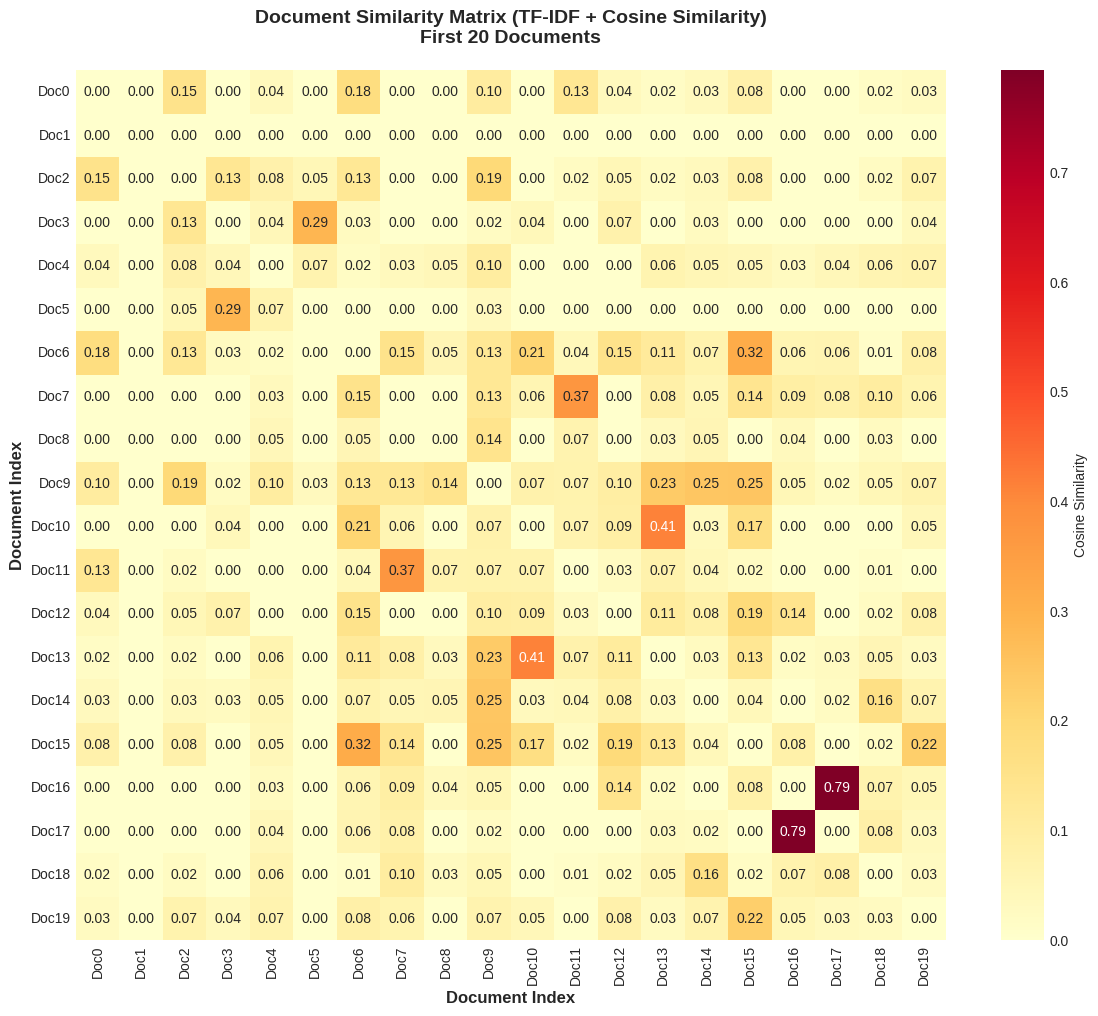

✓ Heatmap similarity matrix berhasil dibuat!


In [26]:
# Visualisasi heatmap untuk subset dokumen (karena bisa terlalu besar)
n_docs_to_show = min(20, len(df))  # Tampilkan max 20 dokumen

plt.figure(figsize=(12, 10))
sns.heatmap(
    cosine_sim_matrix[:n_docs_to_show, :n_docs_to_show],
    cmap='YlOrRd',
    annot=True,
    fmt='.2f',
    square=True,
    cbar_kws={'label': 'Cosine Similarity'},
    xticklabels=[f'Doc{i}' for i in range(n_docs_to_show)],
    yticklabels=[f'Doc{i}' for i in range(n_docs_to_show)]
)
plt.title(f'Document Similarity Matrix (TF-IDF + Cosine Similarity)\nFirst {n_docs_to_show} Documents',
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Document Index', fontsize=12, fontweight='bold')
plt.ylabel('Document Index', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Heatmap similarity matrix berhasil dibuat!")

## 3.5 Visualisasi TF-IDF dengan Dimensionality Reduction

Karena TF-IDF matrix memiliki dimensi tinggi, kita akan mereduksi dimensinya ke 2D untuk visualisasi.

⏳ Melakukan dimensionality reduction dengan t-SNE...
✓ PCA pre-reduction: 277 → 50 dimensions
✓ t-SNE berhasil! Dimensi direduksi ke 2D untuk visualisasi


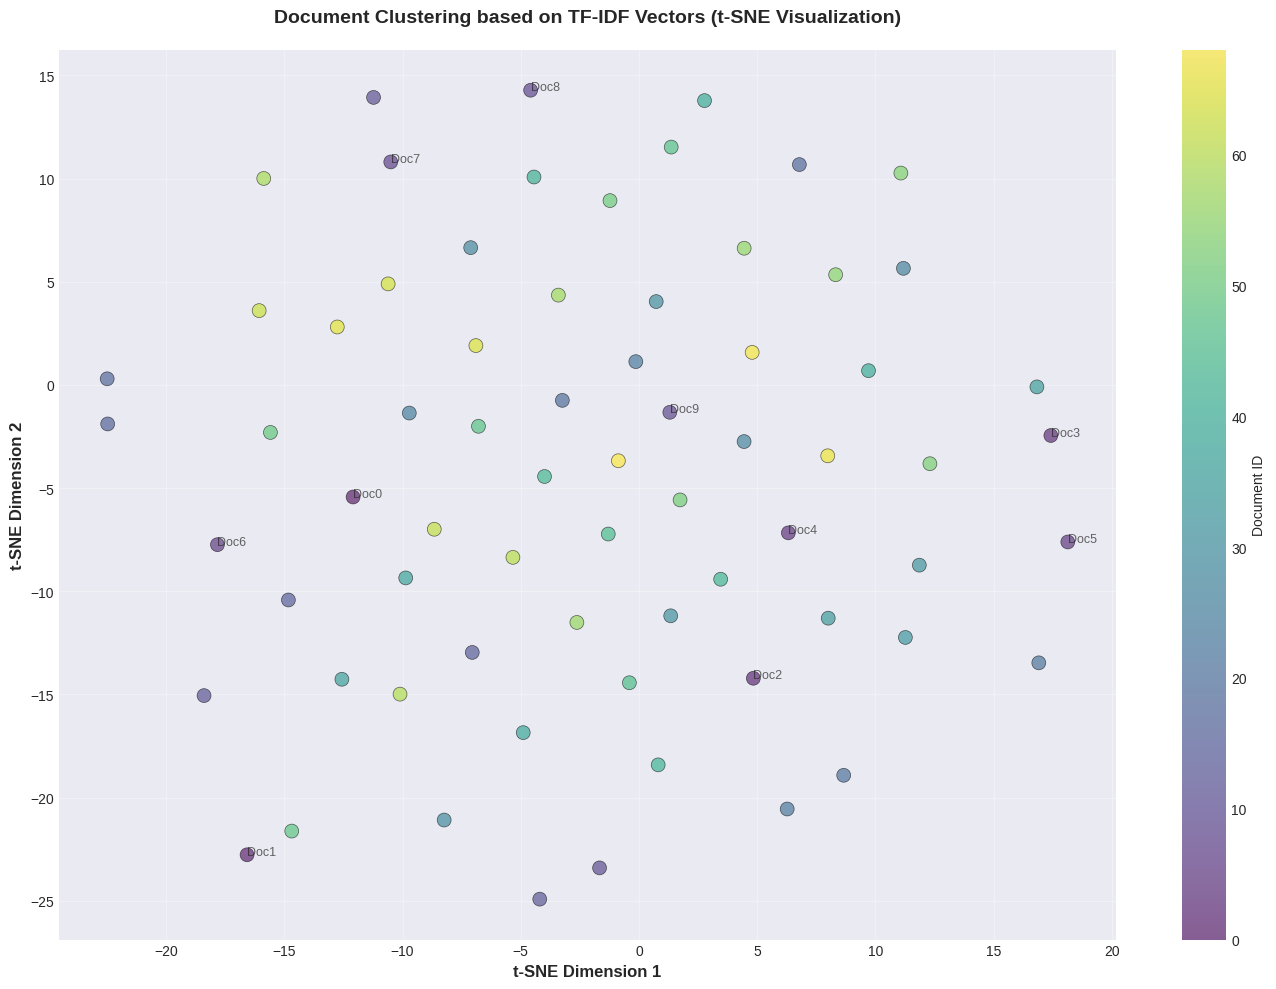


✓ Visualisasi 2D TF-IDF berhasil dibuat!

💡 Insight dari visualisasi:
   - Dokumen yang berdekatan memiliki konten yang mirip
   - Clustering alami menunjukkan topik/tema yang berbeda
   - Dokumen yang terpisah jauh memiliki konten yang sangat berbeda


In [27]:
# Reduksi dimensi menggunakan t-SNE
print("⏳ Melakukan dimensionality reduction dengan t-SNE...")

# Karena t-SNE lambat untuk data besar, gunakan PCA dulu untuk pre-reduction
if tfidf_matrix.shape[1] > 50:
    pca = PCA(n_components=50, random_state=42)
    tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
    print(f"✓ PCA pre-reduction: {tfidf_matrix.shape[1]} → 50 dimensions")
else:
    tfidf_pca = tfidf_matrix.toarray()

# Terapkan t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=min(30, len(df)-1))
tfidf_2d = tsne.fit_transform(tfidf_pca)

print("✓ t-SNE berhasil! Dimensi direduksi ke 2D untuk visualisasi")

# Buat DataFrame untuk plotting
tfidf_viz_df = pd.DataFrame({
    'x': tfidf_2d[:, 0],
    'y': tfidf_2d[:, 1],
    'doc_id': range(len(df))
})

# Visualisasi scatter plot
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    tfidf_viz_df['x'],
    tfidf_viz_df['y'],
    c=tfidf_viz_df['doc_id'],
    cmap='viridis',
    s=100,
    alpha=0.6,
    edgecolors='black',
    linewidth=0.5
)

# Tambahkan label untuk beberapa dokumen
for i in range(min(10, len(tfidf_viz_df))):
    plt.annotate(
        f'Doc{i}',
        (tfidf_viz_df['x'].iloc[i], tfidf_viz_df['y'].iloc[i]),
        fontsize=9,
        alpha=0.7
    )

plt.colorbar(scatter, label='Document ID')
plt.xlabel('t-SNE Dimension 1', fontsize=12, fontweight='bold')
plt.ylabel('t-SNE Dimension 2', fontsize=12, fontweight='bold')
plt.title('Document Clustering based on TF-IDF Vectors (t-SNE Visualization)',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ Visualisasi 2D TF-IDF berhasil dibuat!")
print("\n💡 Insight dari visualisasi:")
print("   - Dokumen yang berdekatan memiliki konten yang mirip")
print("   - Clustering alami menunjukkan topik/tema yang berbeda")
print("   - Dokumen yang terpisah jauh memiliki konten yang sangat berbeda")

# PART 2: Word2Vec

## 3.6 Konsep Word2Vec

### Apa itu Word2Vec?

**Word2Vec** adalah teknik dalam Natural Language Processing (NLP) untuk menghasilkan **word embeddings** - representasi vektor kata yang dapat menangkap makna semantik dan sintaksis kata berdasarkan konteksnya.

### Prinsip Dasar:

**"You shall know a word by the company it keeps"** - J.R. Firth

Word2Vec bekerja berdasarkan **distributional hypothesis**: kata yang muncul dalam konteks yang sama cenderung memiliki makna yang mirip.

### Dua Arsitektur Word2Vec:

#### 1. **CBOW (Continuous Bag of Words)**
- Memprediksi kata target berdasarkan konteks (kata-kata di sekitarnya)
- Input: Kata-kata konteks → Output: Kata target
- Lebih cepat, baik untuk frequent words

#### 2. **Skip-gram**
- Memprediksi konteks berdasarkan kata target
- Input: Kata target → Output: Kata-kata konteks
- Lebih baik untuk rare words, lebih akurat untuk small dataset

### Karakteristik Word2Vec:

✅ **Menangkap Semantic Similarity**
   - Kata dengan makna mirip memiliki vektor yang dekat
   - Contoh: "king" dan "queen" memiliki vektor yang mirip

✅ **Menangkap Semantic Relationships**
   - Dapat melakukan arithmetic dengan vektor kata
   - Contoh terkenal: **king - man + woman ≈ queen**

✅ **Dense Representation**
   - Setiap kata direpresentasikan sebagai vektor dense (tidak sparse seperti TF-IDF)
   - Dimensi vektor jauh lebih kecil (biasanya 100-300 dimensi)

### Keunggulan Word2Vec:
✅ Menangkap makna semantik kata

✅ Dense representation (lebih efisien)

✅ Dapat melakukan word analogy

✅ Transfer learning (dapat menggunakan pre-trained embeddings)

### Kelemahan Word2Vec:
❌ Membutuhkan corpus yang besar untuk hasil optimal

❌ Tidak menangkap polysemy (satu kata dengan banyak makna)

❌ Out-of-vocabulary problem

❌ Training memakan waktu lebih lama dibanding TF-IDF

## 3.7 Implementasi Word2Vec

In [28]:
# Persiapkan data untuk Word2Vec
# Word2Vec membutuhkan list of tokenized sentences

# Ambil tokens dari df_full
sentences = df_full['tokens'].tolist()

# Filter kalimat yang terlalu pendek
sentences = [sent for sent in sentences if len(sent) >= 3]

print("=" * 100)
print("PERSIAPAN DATA UNTUK WORD2VEC")
print("=" * 100)
print(f"\n📊 Jumlah sentences: {len(sentences)}")
print(f"📊 Total tokens: {sum(len(sent) for sent in sentences)}")
print(f"📊 Rata-rata panjang sentence: {np.mean([len(sent) for sent in sentences]):.2f} tokens")

print("\n📝 Contoh 3 sentences pertama:")
for i, sent in enumerate(sentences[:3], 1):
    print(f"\n{i}. {sent[:15]}...")  # Tampilkan 15 token pertama

# Training Word2Vec Model
print("=" * 100)
print("TRAINING WORD2VEC MODEL")
print("=" * 100)
print("\n⏳ Training Word2Vec model...")

# Inisialisasi dan train Word2Vec model
w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=100,        # Dimensi vektor embedding
    window=5,               # Context window size
    min_count=2,            # Ignore words dengan frekuensi < 2
    workers=4,              # Parallel processing
    sg=1,                   # 1 = Skip-gram, 0 = CBOW
    epochs=50,              # Jumlah iterasi training
    seed=42                 # Random seed untuk reproducibility
)

print("\n✓ Word2Vec model berhasil ditraining!")
print("\n⚙️ Parameter yang digunakan:")
print(f"   - vector_size: 100 (dimensi embedding)")
print(f"   - window: 5 (ukuran context window)")
print(f"   - min_count: 2 (frekuensi minimum kata)")
print(f"   - sg: 1 (Skip-gram architecture)")
print(f"   - epochs: 50 (iterasi training)")

print("\n📊 Informasi Model:")
print(f"   - Vocabulary size: {len(w2v_model.wv)}")
print(f"   - Vector dimensionality: {w2v_model.wv.vector_size}")

PERSIAPAN DATA UNTUK WORD2VEC

📊 Jumlah sentences: 68
📊 Total tokens: 1271
📊 Rata-rata panjang sentence: 18.69 tokens

📝 Contoh 3 sentences pertama:

1. ['aksi', 'milisi', 'di', 'sudan', 'yang', 'melancarkan', 'pembantaian', 'brutal']...

2. ['tuga', 'kami', 'hanya', 'membunuh']...

3. ['sejumlah', 'pria', 'tertawa', 'lepa', 'saat', 'mobil', 'pikap', 'yang', 'mereka', 'tumpangi', 'melaju', 'kencang', 'melewati', 'deretan', 'sembilan']...
TRAINING WORD2VEC MODEL

⏳ Training Word2Vec model...

✓ Word2Vec model berhasil ditraining!

⚙️ Parameter yang digunakan:
   - vector_size: 100 (dimensi embedding)
   - window: 5 (ukuran context window)
   - min_count: 2 (frekuensi minimum kata)
   - sg: 1 (Skip-gram architecture)
   - epochs: 50 (iterasi training)

📊 Informasi Model:
   - Vocabulary size: 186
   - Vector dimensionality: 100


## 3.8 Analisis Word2Vec Embeddings

### Eksplorasi Word Vectors

In [29]:
# Pilih beberapa kata untuk analisis
# Ambil kata-kata yang paling sering muncul
vocab = list(w2v_model.wv.index_to_key)[:20]  # 20 kata pertama dalam vocab

print("=" * 100)
print("ANALISIS WORD VECTORS")
print("=" * 100)

print(f"\n📚 Top 20 Words in Vocabulary:")
print(vocab)

# Contoh: ambil vektor untuk kata pertama
if len(vocab) > 0:
    sample_word = vocab[0]
    sample_vector = w2v_model.wv[sample_word]

    print(f"\n\n🔍 Contoh Word Vector untuk '{sample_word}':")
    print("-" * 100)
    print(f"Dimensi: {len(sample_vector)}")
    print(f"\nFirst 10 values: {sample_vector[:10]}")
    print(f"\nStatistik:")
    print(f"   - Mean: {sample_vector.mean():.6f}")
    print(f"   - Std: {sample_vector.std():.6f}")
    print(f"   - Min: {sample_vector.min():.6f}")
    print(f"   - Max: {sample_vector.max():.6f}")

ANALISIS WORD VECTORS

📚 Top 20 Words in Vocabulary:
['yang', 'di', 'rsf', 'itu', 'dan', 'mereka', 'dalam', 'dari', 'elfash', 'pria', 'dengan', 'rekaman', 'video', 'bahwa', 'pada', 'kota', 'ke', 'seorang', 'memperlihatkan', 'telah']


🔍 Contoh Word Vector untuk 'yang':
----------------------------------------------------------------------------------------------------
Dimensi: 100

First 10 values: [ 0.19310036  0.04264782 -0.05899487 -0.01759004 -0.12702273  0.11629359
  0.03150606  0.13942614 -0.2887486  -0.0019925 ]

Statistik:
   - Mean: -0.015101
   - Std: 0.121303
   - Min: -0.383479
   - Max: 0.217436


### Most Similar Words (Word Similarity)

In [30]:
# Cari kata-kata yang paling mirip dengan beberapa kata kunci
print("=" * 100)
print("WORD SIMILARITY ANALYSIS")
print("=" * 100)

# Pilih beberapa kata untuk analisis similarity
# Ambil kata-kata dengan frekuensi tertinggi yang ada di vocabulary
test_words = vocab[:5]  # 5 kata pertama dari vocabulary

for word in test_words:
    if word in w2v_model.wv:
        print(f"\n\n📌 Top 10 words most similar to '{word}':")
        print("-" * 100)
        print(f"{'Rank':<6} {'Word':<30} {'Similarity Score':<20}")
        print("-" * 100)

        similar_words = w2v_model.wv.most_similar(word, topn=10)
        for i, (similar_word, score) in enumerate(similar_words, 1):
            print(f"{i:<6} {similar_word:<30} {score:.6f}")

print("\n\n💡 Insight:")
print("   - Kata-kata dengan cosine similarity tinggi memiliki makna/konteks yang mirip")
print("   - Similarity score berkisar antara -1 (sangat berbeda) dan 1 (sangat mirip)")
print("   - Word2Vec berhasil menangkap semantic relationships antar kata")

WORD SIMILARITY ANALYSIS


📌 Top 10 words most similar to 'yang':
----------------------------------------------------------------------------------------------------
Rank   Word                           Similarity Score    
----------------------------------------------------------------------------------------------------
1      sudan                          0.996166
2      milisi                         0.995896
3      merupakan                      0.995772
4      dari                           0.995681
5      benteng                        0.995643
6      anali                          0.995626
7      muncul                         0.995564
8      laporan                        0.995541
9      aksi                           0.995527
10     tertawa                        0.995499


📌 Top 10 words most similar to 'di':
----------------------------------------------------------------------------------------------------
Rank   Word                           Similarity Score    
----

### Word Analogy (Vector Arithmetic)

In [31]:
# Demonstrasi word analogy
# Format: word1 - word2 + word3 ≈ ?

print("=" * 100)
print("WORD ANALOGY ANALYSIS (Vector Arithmetic)")
print("=" * 100)

print("\n🧮 Word2Vec memungkinkan operasi aritmatika pada word vectors!")
print("   Format: word1 - word2 + word3 ≈ result")
print("   Contoh terkenal: king - man + woman ≈ queen\n")

# Coba beberapa analogy jika kata-katanya ada
# Karena kita tidak tahu kata apa yang ada, kita coba dengan kata-kata umum
analogy_examples = [
    # Format: (positive_words, negative_words, description)
]

# Buat analogy dari kata-kata yang ada
if len(vocab) >= 6:
    # Coba beberapa kombinasi
    try:
        word1, word2, word3 = vocab[0], vocab[1], vocab[2]
        print(f"\n📊 Analogy: '{word1}' - '{word2}' + '{word3}' ≈ ?")
        print("-" * 100)

        result = w2v_model.wv.most_similar(
            positive=[word1, word3],
            negative=[word2],
            topn=5
        )

        print(f"{'Rank':<6} {'Result Word':<30} {'Similarity Score':<20}")
        print("-" * 100)
        for i, (word, score) in enumerate(result, 1):
            print(f"{i:<6} {word:<30} {score:.6f}")

    except:
        print("\nℹ️ Analogy tidak dapat dilakukan dengan kombinasi kata ini.")
else:
    print("\nℹ️ Vocabulary terlalu kecil untuk melakukan word analogy analysis.")

print("\n\n💡 Penjelasan Word Analogy:")
print("   - Vector arithmetic menangkap hubungan semantik antar kata")
print("   - positive = kata yang ingin kita 'tambahkan' ke hasil")
print("   - negative = kata yang ingin kita 'kurangi' dari hasil")
print("   - Model akan mencari kata yang paling cocok dengan operasi ini")

WORD ANALOGY ANALYSIS (Vector Arithmetic)

🧮 Word2Vec memungkinkan operasi aritmatika pada word vectors!
   Format: word1 - word2 + word3 ≈ result
   Contoh terkenal: king - man + woman ≈ queen


📊 Analogy: 'yang' - 'di' + 'rsf' ≈ ?
----------------------------------------------------------------------------------------------------
Rank   Result Word                    Similarity Score    
----------------------------------------------------------------------------------------------------
1      penyelidikan                   0.991071
2      telah                          0.990806
3      pada                           0.990578
4      dagalo                         0.990573
5      hari                           0.990509


💡 Penjelasan Word Analogy:
   - Vector arithmetic menangkap hubungan semantik antar kata
   - positive = kata yang ingin kita 'tambahkan' ke hasil
   - negative = kata yang ingin kita 'kurangi' dari hasil
   - Model akan mencari kata yang paling cocok dengan operasi in

### Visualisasi Word Embeddings dengan t-SNE

⏳ Memvisualisasikan word embeddings dengan t-SNE...

✓ t-SNE selesai! 100 words direduksi ke 2D


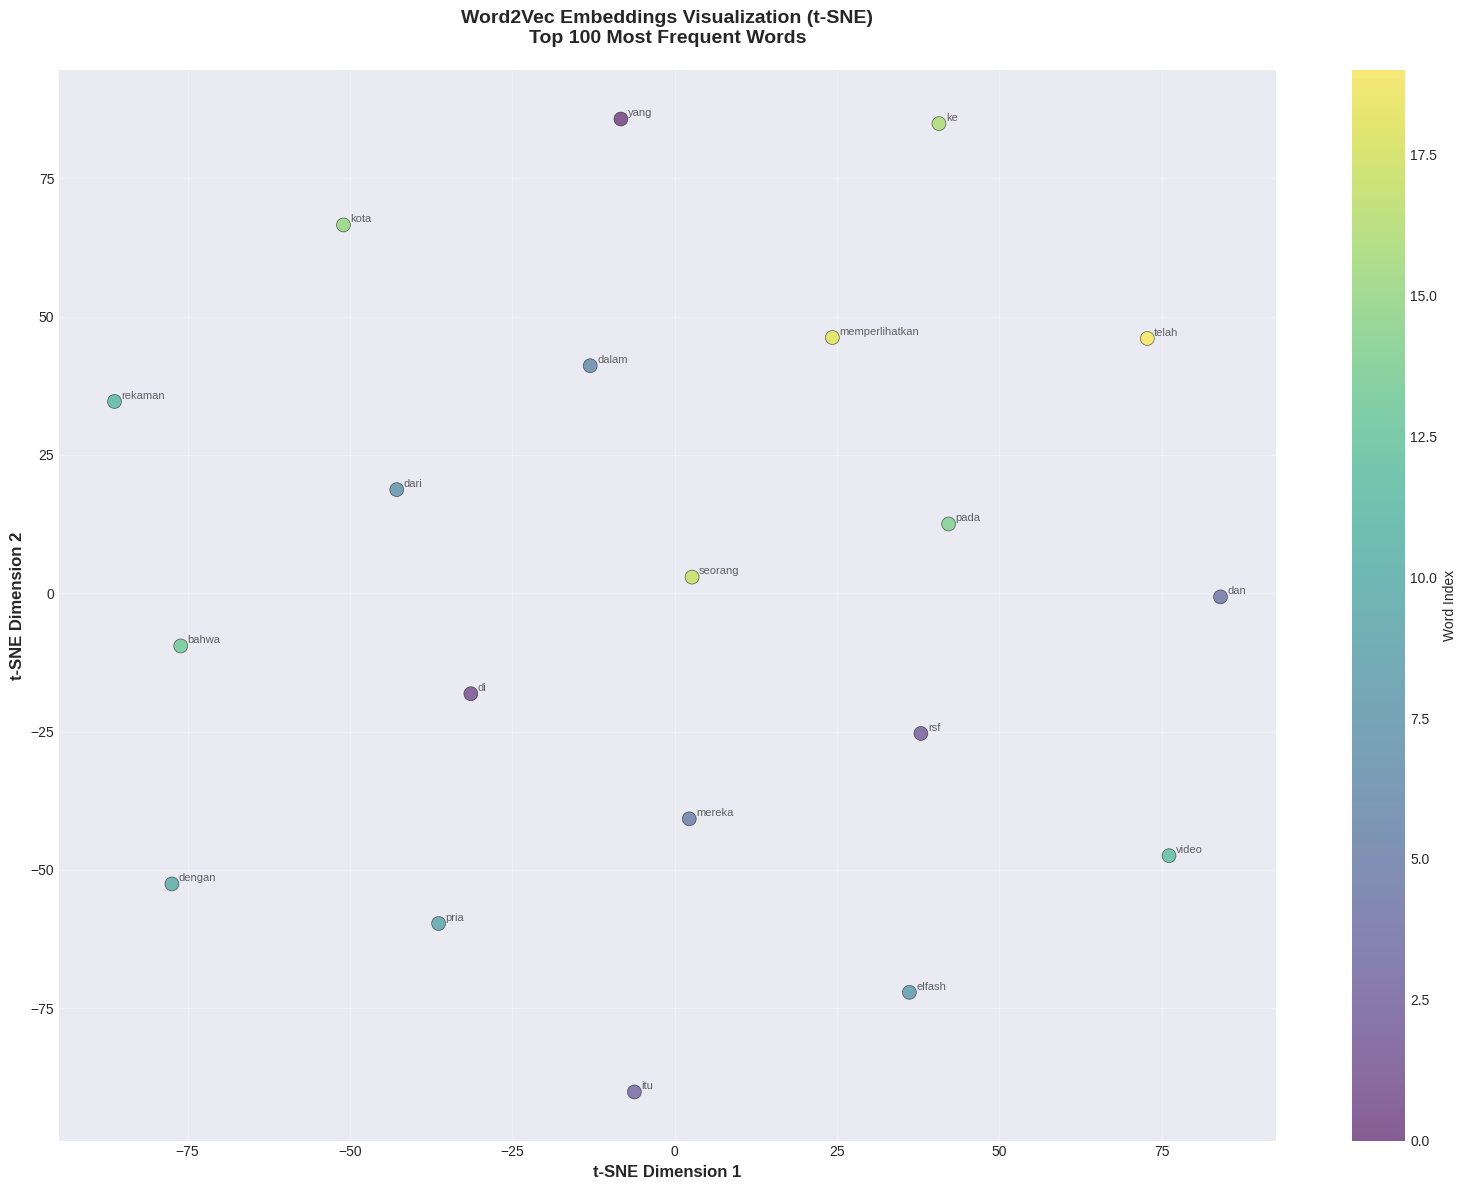


✓ Visualisasi Word2Vec embeddings berhasil dibuat!

💡 Insight dari visualisasi:
   - Kata-kata yang berdekatan memiliki makna/konteks yang mirip
   - Clustering alami menunjukkan semantic groups
   - Jarak antar kata mencerminkan similarity semantik


In [32]:
# Visualisasi word embeddings dalam 2D space
print("⏳ Memvisualisasikan word embeddings dengan t-SNE...\n")

# Ambil top N words berdasarkan frekuensi
n_words_to_plot = min(100, len(w2v_model.wv))  # Plot max 100 words
words_to_plot = vocab[:n_words_to_plot]

# Get word vectors
word_vectors = np.array([w2v_model.wv[word] for word in words_to_plot])

# Reduce dimensions with t-SNE
tsne_w2v = TSNE(n_components=2, random_state=42, perplexity=min(30, len(words_to_plot)-1))
word_vectors_2d = tsne_w2v.fit_transform(word_vectors)

print(f"✓ t-SNE selesai! {n_words_to_plot} words direduksi ke 2D")

# Plot word embeddings
plt.figure(figsize=(16, 12))

# Scatter plot
plt.scatter(
    word_vectors_2d[:, 0],
    word_vectors_2d[:, 1],
    s=100,
    alpha=0.6,
    c=range(len(words_to_plot)),
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

# Tambahkan label untuk setiap kata
for i, word in enumerate(words_to_plot):
    plt.annotate(
        word,
        xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]),
        xytext=(5, 2),
        textcoords='offset points',
        fontsize=8,
        alpha=0.7
    )

plt.xlabel('t-SNE Dimension 1', fontsize=12, fontweight='bold')
plt.ylabel('t-SNE Dimension 2', fontsize=12, fontweight='bold')
plt.title(f'Word2Vec Embeddings Visualization (t-SNE)\nTop {n_words_to_plot} Most Frequent Words',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(True, alpha=0.3)
plt.colorbar(label='Word Index')
plt.tight_layout()
plt.show()

print("\n✓ Visualisasi Word2Vec embeddings berhasil dibuat!")
print("\n💡 Insight dari visualisasi:")
print("   - Kata-kata yang berdekatan memiliki makna/konteks yang mirip")
print("   - Clustering alami menunjukkan semantic groups")
print("   - Jarak antar kata mencerminkan similarity semantik")

## 3.9 Document Embeddings dengan Word2Vec

Untuk merepresentasikan seluruh dokumen dengan Word2Vec, kita akan menggunakan averaging method - mengambil rata-rata dari semua word vectors dalam dokumen.

In [33]:
def get_document_vector(tokens, model):
    """
    Mengubah dokumen (list of tokens) menjadi document vector
    dengan cara averaging word vectors.

    Parameters:
    -----------
    tokens : list
        List of tokens dalam dokumen
    model : Word2Vec model
        Trained Word2Vec model

    Returns:
    --------
    np.array : Document vector (rata-rata dari word vectors)
    """
    # Filter tokens yang ada di vocabulary
    valid_tokens = [token for token in tokens if token in model.wv]

    if len(valid_tokens) == 0:
        # Jika tidak ada token yang valid, return zero vector
        return np.zeros(model.wv.vector_size)

    # Ambil vectors untuk semua valid tokens
    word_vectors = [model.wv[token] for token in valid_tokens]

    # Return rata-rata
    return np.mean(word_vectors, axis=0)

print("✓ Fungsi document embedding berhasil dibuat!")

# Buat document vectors untuk semua dokumen
print("⏳ Membuat document vectors...\n")

document_vectors = []
for tokens in sentences:
    doc_vec = get_document_vector(tokens, w2v_model)
    document_vectors.append(doc_vec)

# Convert ke numpy array
document_vectors = np.array(document_vectors)

print(f"✓ Document vectors berhasil dibuat!")
print(f"\n📊 Dimensi Document Vectors Matrix: {document_vectors.shape}")
print(f"   - {document_vectors.shape[0]} dokumen")
print(f"   - {document_vectors.shape[1]} dimensi per dokumen")

✓ Fungsi document embedding berhasil dibuat!
⏳ Membuat document vectors...

✓ Document vectors berhasil dibuat!

📊 Dimensi Document Vectors Matrix: (68, 100)
   - 68 dokumen
   - 100 dimensi per dokumen


### Document Similarity dengan Word2Vec

ANALISIS SIMILARITY ANTAR DOKUMEN (Word2Vec + Cosine Similarity)

📊 Dimensi Similarity Matrix: (68, 68)

📈 Statistik Similarity (Word2Vec):
   - Rata-rata similarity: 0.9972
   - Max similarity: 0.9997
   - Min similarity: 0.9886
   - Std similarity: 0.0018


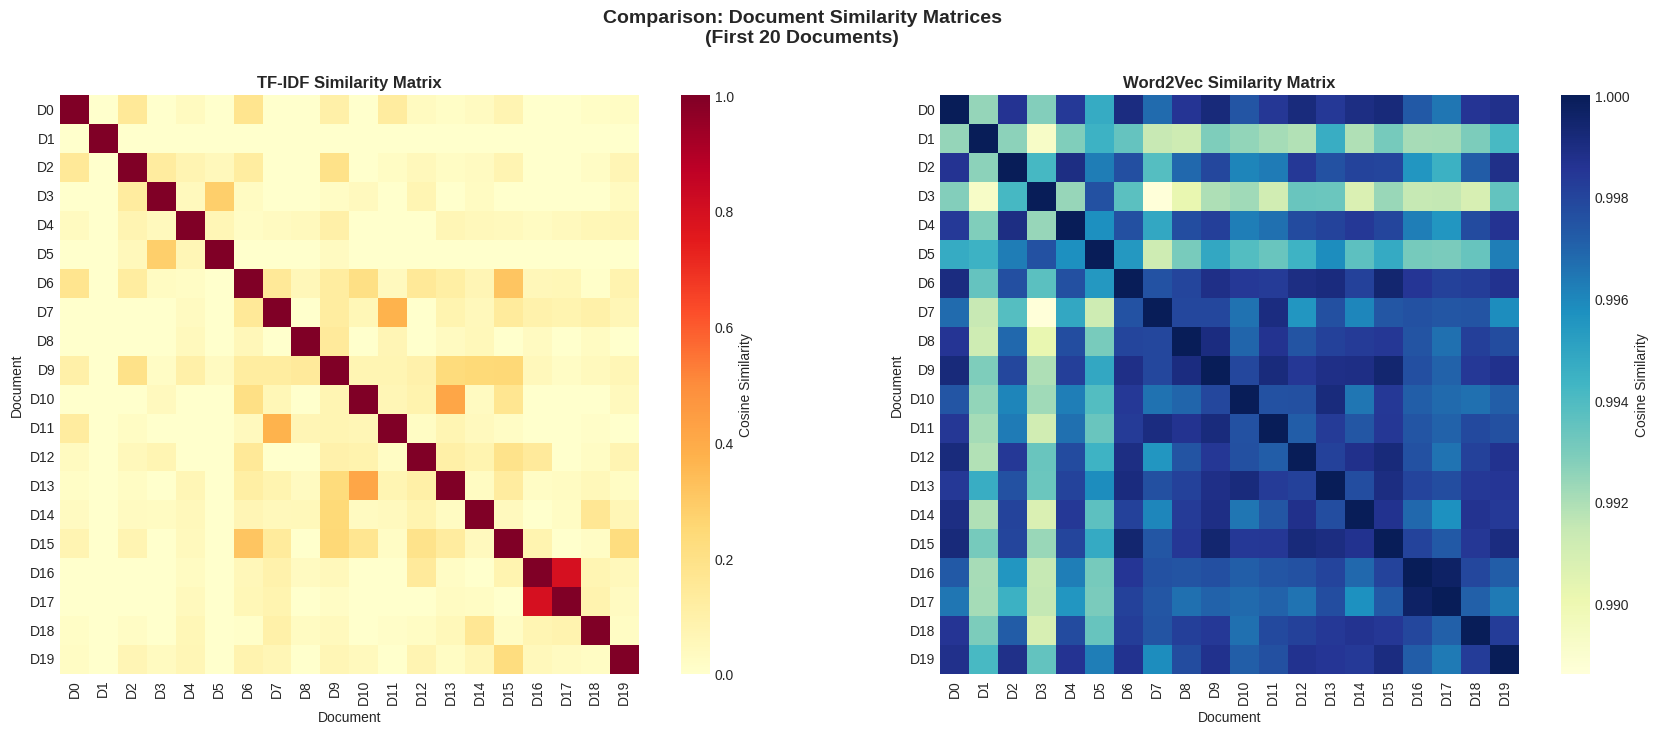


✓ Visualisasi perbandingan similarity berhasil dibuat!


In [34]:
# Hitung cosine similarity antar dokumen menggunakan Word2Vec embeddings
cosine_sim_w2v = cosine_similarity(document_vectors)

print("=" * 100)
print("ANALISIS SIMILARITY ANTAR DOKUMEN (Word2Vec + Cosine Similarity)")
print("=" * 100)

print(f"\n📊 Dimensi Similarity Matrix: {cosine_sim_w2v.shape}")

# Set diagonal ke NaN untuk mengabaikan self-similarity
np.fill_diagonal(cosine_sim_w2v, np.nan)

print(f"\n📈 Statistik Similarity (Word2Vec):")
print(f"   - Rata-rata similarity: {np.nanmean(cosine_sim_w2v):.4f}")
print(f"   - Max similarity: {np.nanmax(cosine_sim_w2v):.4f}")
print(f"   - Min similarity: {np.nanmin(cosine_sim_w2v):.4f}")
print(f"   - Std similarity: {np.nanstd(cosine_sim_w2v):.4f}")

# Visualisasi perbandingan similarity: TF-IDF vs Word2Vec
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Reset diagonal untuk visualisasi
np.fill_diagonal(cosine_sim_matrix, 1)
np.fill_diagonal(cosine_sim_w2v, 1)

n_docs_to_show = min(20, len(df))

# 1. TF-IDF Similarity
sns.heatmap(
    cosine_sim_matrix[:n_docs_to_show, :n_docs_to_show],
    cmap='YlOrRd',
    annot=False,
    square=True,
    cbar_kws={'label': 'Cosine Similarity'},
    ax=axes[0],
    xticklabels=[f'D{i}' for i in range(n_docs_to_show)],
    yticklabels=[f'D{i}' for i in range(n_docs_to_show)]
)
axes[0].set_title('TF-IDF Similarity Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Document', fontsize=10)
axes[0].set_ylabel('Document', fontsize=10)

# 2. Word2Vec Similarity
sns.heatmap(
    cosine_sim_w2v[:n_docs_to_show, :n_docs_to_show],
    cmap='YlGnBu',
    annot=False,
    square=True,
    cbar_kws={'label': 'Cosine Similarity'},
    ax=axes[1],
    xticklabels=[f'D{i}' for i in range(n_docs_to_show)],
    yticklabels=[f'D{i}' for i in range(n_docs_to_show)]
)
axes[1].set_title('Word2Vec Similarity Matrix', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Document', fontsize=10)
axes[1].set_ylabel('Document', fontsize=10)

plt.suptitle(f'Comparison: Document Similarity Matrices\n(First {n_docs_to_show} Documents)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✓ Visualisasi perbandingan similarity berhasil dibuat!")

## 3.10 Perbandingan TF-IDF vs Word2Vec

In [35]:
# Buat tabel perbandingan
print("=" * 120)
print("PERBANDINGAN TF-IDF vs WORD2VEC")
print("=" * 120)

comparison_data = {
    'Aspek': [
        'Representasi',
        'Dimensi Output',
        'Sparsity',
        'Semantic Understanding',
        'Context Awareness',
        'Training Required',
        'Computational Cost',
        'Memory Efficiency',
        'Out-of-Vocabulary',
        'Best For'
    ],
    'TF-IDF': [
        'Sparse, statistical',
        f'{tfidf_matrix.shape[1]} (vocabulary size)',
        f'{(1 - tfidf_matrix.nnz / (tfidf_matrix.shape[0] * tfidf_matrix.shape[1])) * 100:.1f}% sparse',
        '❌ Tidak menangkap makna',
        '❌ Tidak context-aware',
        '✅ Tidak perlu training',
        '✅ Sangat cepat',
        '❌ Butuh banyak memory (sparse)',
        '✅ Otomatis handle new words',
        'Document classification, Information retrieval'
    ],
    'Word2Vec': [
        'Dense, neural embeddings',
        f'{w2v_model.wv.vector_size} (fixed)',
        '0% sparse (dense vectors)',
        '✅ Menangkap semantic similarity',
        '✅ Context-aware',
        '❌ Perlu training',
        '❌ Lebih lambat (training)',
        '✅ Memory efficient (dense)',
        '❌ Tidak handle unknown words',
        'Semantic analysis, Similarity tasks'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
display(comparison_df)

print("\n" + "=" * 120)

# Statistik perbandingan numerik
print("\n📊 STATISTIK PERBANDINGAN NUMERIK:")
print("=" * 120)

stats_comparison = {
    'Metrik': [
        'Matrix Dimension',
        'Average Document Similarity',
        'Std Document Similarity',
        'Max Document Similarity',
        'Min Document Similarity',
        'Representation Size per Doc'
    ],
    'TF-IDF': [
        f"{tfidf_matrix.shape[0]} × {tfidf_matrix.shape[1]}",
        f"{np.nanmean(cosine_sim_matrix):.4f}",
        f"{np.nanstd(cosine_sim_matrix):.4f}",
        f"{np.nanmax(cosine_sim_matrix):.4f}",
        f"{np.nanmin(cosine_sim_matrix):.4f}",
        f"{tfidf_matrix.shape[1]} features"
    ],
    'Word2Vec': [
        f"{document_vectors.shape[0]} × {document_vectors.shape[1]}",
        f"{np.nanmean(cosine_sim_w2v):.4f}",
        f"{np.nanstd(cosine_sim_w2v):.4f}",
        f"{np.nanmax(cosine_sim_w2v):.4f}",
        f"{np.nanmin(cosine_sim_w2v):.4f}",
        f"{document_vectors.shape[1]} dimensions"
    ]
}

stats_df = pd.DataFrame(stats_comparison)
display(stats_df)

print("\n" + "=" * 120)

PERBANDINGAN TF-IDF vs WORD2VEC


Aspek                                          TF-IDF  \
0            Representasi                             Sparse, statistical   
1          Dimensi Output                           277 (vocabulary size)   
2                Sparsity                                    94.5% sparse   
3  Semantic Understanding                         ❌ Tidak menangkap makna   
4       Context Awareness                           ❌ Tidak context-aware   
5       Training Required                          ✅ Tidak perlu training   
6      Computational Cost                                  ✅ Sangat cepat   
7       Memory Efficiency                  ❌ Butuh banyak memory (sparse)   
8       Out-of-Vocabulary                     ✅ Otomatis handle new words   
9                Best For  Document classification, Information retrieval   

                              Word2Vec  
0             Dense, neural embeddings  
1                          100 (fixed)  
2            0% sparse (dense vectors)  
3      ✅ Menangkap semantic similarity  
4                      ✅ Context-aware  
5                     ❌ Perlu training  
6            ❌ Lebih lambat (training)  
7           ✅ Memory efficient (dense)  
8         ❌ Tidak handle unknown words  
9  Semantic analysis, Similarity tasks



📊 STATISTIK PERBANDINGAN NUMERIK:


Metrik        TF-IDF        Word2Vec
0             Matrix Dimension      69 × 277        68 × 100
1  Average Document Similarity        0.0736          0.9972
2      Std Document Similarity        0.1334          0.0018
3      Max Document Similarity        1.0000          1.0000
4      Min Document Similarity        0.0000          0.9886
5  Representation Size per Doc  277 features  100 dimensions

## 3.11 Simpan Feature Representations

In [36]:
# Simpan hasil feature engineering
print("=" * 100)
print("MENYIMPAN HASIL FEATURE ENGINEERING")
print("=" * 100)

# 1. Simpan TF-IDF matrix
tfidf_output_path = '/content/drive/MyDrive/UTS/tfidf_features.pkl'
with open(tfidf_output_path, 'wb') as f:
    pickle.dump({
        'matrix': tfidf_matrix,
        'feature_names': feature_names,
        'vectorizer': tfidf_vectorizer
    }, f)
print(f"✓ TF-IDF features saved to: {tfidf_output_path}")

# 2. Simpan Word2Vec model
w2v_model_path = '/content/drive/MyDrive/UTS/word2vec_model.model'
w2v_model.save(w2v_model_path)
print(f"✓ Word2Vec model saved to: {w2v_model_path}")

# 3. Simpan document vectors
doc_vec_path = '/content/drive/MyDrive/UTS/document_vectors.pkl'
with open(doc_vec_path, 'wb') as f:
    pickle.dump(document_vectors, f)
print(f"✓ Document vectors saved to: {doc_vec_path}")

# 4. Simpan similarity matrices
sim_matrix_path = '/content/drive/MyDrive/UTS/similarity_matrices.pkl'
with open(sim_matrix_path, 'wb') as f:
    pickle.dump({
        'tfidf_similarity': cosine_sim_matrix,
        'word2vec_similarity': cosine_sim_w2v
    }, f)
print(f"✓ Similarity matrices saved to: {sim_matrix_path}")

print("\n✓ Semua hasil feature engineering berhasil disimpan!")

MENYIMPAN HASIL FEATURE ENGINEERING
✓ TF-IDF features saved to: /content/drive/MyDrive/UTS/tfidf_features.pkl
✓ Word2Vec model saved to: /content/drive/MyDrive/UTS/word2vec_model.model
✓ Document vectors saved to: /content/drive/MyDrive/UTS/document_vectors.pkl
✓ Similarity matrices saved to: /content/drive/MyDrive/UTS/similarity_matrices.pkl

✓ Semua hasil feature engineering berhasil disimpan!


# Tahap 4: Analisis Data Eksploratif (EDA) dan Visualisasi

## Tujuan Tahap Ini:

Pada tahap Exploratory Data Analysis (EDA), kita akan:

1. **Memvisualisasikan kata-kata yang paling sering muncul** menggunakan word clouds
2. **Menganalisis distribusi panjang teks** (jumlah kata, karakter, kalimat per dokumen)
3. **Memvisualisasikan frekuensi kata teratas** menggunakan bar plots
4. **Menganalisis N-grams** (unigrams, bigrams, trigrams)
5. **Eksplorasi pola dan karakteristik** dalam dataset teks

EDA adalah langkah penting untuk memahami karakteristik data sebelum melakukan modeling atau analisis lebih lanjut.

## 4.1 Import Library dan Load Dataset

In [37]:
# Import library dasar
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

# Import library untuk text processing
import re
import string
from collections import Counter

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Import library untuk statistik
from scipy import stats

# Import library untuk n-grams
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk import ngrams
from nltk.corpus import stopwords

# Download NLTK data jika belum ada
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
%matplotlib inline

# Set random seed
np.random.seed(42)

print("✓ Semua library berhasil diimport!")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

print("✓ Google Drive terhubung!")

# Load dataset dari tahap-tahap sebelumnya
print("⏳ Loading datasets...\n")

# Load dataset CSV (preprocessed)
df_preprocessed = pd.read_csv('/content/drive/MyDrive/UTS/sudan_preprocessed.csv')

# Load dataset pickle (dengan tokens)
df_full = pd.read_pickle('/content/drive/MyDrive/UTS/sudan_tokens.pkl')

print("✓ Dataset berhasil dimuat!")
print(f"\n📊 Dimensi dataset: {df_full.shape[0]} baris × {df_full.shape[1]} kolom")
print(f"\n📋 Kolom yang tersedia: {list(df_full.columns)}")

# Preview dataset
print("\n" + "=" * 100)
print("Preview Dataset")
print("=" * 100)
display(df_full[['text', 'text_preprocessed', 'word_count', 'token_count']].head())

✓ Semua library berhasil diimport!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Google Drive terhubung!
⏳ Loading datasets...

✓ Dataset berhasil dimuat!

📊 Dimensi dataset: 69 baris × 7 kolom

📋 Kolom yang tersedia: ['text', 'char_count', 'word_count', 'sentence_count', 'text_preprocessed', 'tokens', 'token_count']

Preview Dataset


text  \
0  Aksi Milisi Di Sudan Yang Melancarkan Pembanta...   
1                        'Tugas Kami Hanya Membunuh'   
2  Sejumlah Pria Tertawa Lepas Saat Mobil Pikap Y...   
3  "Lihat semua ini. Lihat genosida ini," teriak ...   
4  Ia mengarahkan kamera ke wajahnya dan rekan-re...   

                                   text_preprocessed  word_count  token_count  
0  aksi milisi di sudan yang melancarkan pembanta...           9            8  
1                           tuga kami hanya membunuh           4            4  
2  sejumlah pria tertawa lepa saat mobil pikap ya...          21           21  
3  lihat semua ini lihat genosida ini teriak sala...          13           13  
4  ia mengarahkan kamera ke wajahnya dan rekanrek...          18           18

## 4.2 Statistik Deskriptif Dataset

In [38]:
# Hitung statistik dasar
print("=" * 100)
print("STATISTIK DESKRIPTIF DATASET")
print("=" * 100)

# Total statistik
total_docs = len(df_full)
total_chars_original = df_full['char_count'].sum()
total_words_original = df_full['word_count'].sum()
total_sentences_original = df_full['sentence_count'].sum()
total_tokens_preprocessed = df_full['token_count'].sum()

print(f"\n📚 JUMLAH TOTAL:")
print(f"   - Total Dokumen: {total_docs:,}")
print(f"   - Total Karakter (Original): {total_chars_original:,}")
print(f"   - Total Kata (Original): {total_words_original:,}")
print(f"   - Total Kalimat (Original): {total_sentences_original:,}")
print(f"   - Total Tokens (Preprocessed): {total_tokens_preprocessed:,}")

# Rata-rata per dokumen
avg_chars = df_full['char_count'].mean()
avg_words = df_full['word_count'].mean()
avg_sentences = df_full['sentence_count'].mean()
avg_tokens = df_full['token_count'].mean()

print(f"\n📊 RATA-RATA PER DOKUMEN:")
print(f"   - Rata-rata Karakter: {avg_chars:.2f}")
print(f"   - Rata-rata Kata: {avg_words:.2f}")
print(f"   - Rata-rata Kalimat: {avg_sentences:.2f}")
print(f"   - Rata-rata Tokens (Preprocessed): {avg_tokens:.2f}")

# Min dan Max
print(f"\n📏 RANGE (MIN - MAX):")
print(f"   - Karakter: {df_full['char_count'].min()} - {df_full['char_count'].max()}")
print(f"   - Kata: {df_full['word_count'].min()} - {df_full['word_count'].max()}")
print(f"   - Kalimat: {df_full['sentence_count'].min()} - {df_full['sentence_count'].max()}")
print(f"   - Tokens: {df_full['token_count'].min()} - {df_full['token_count'].max()}")

# Standard Deviation
print(f"\n📈 STANDARD DEVIATION:")
print(f"   - Karakter: {df_full['char_count'].std():.2f}")
print(f"   - Kata: {df_full['word_count'].std():.2f}")
print(f"   - Tokens: {df_full['token_count'].std():.2f}")

# Statistik deskriptif lengkap
print("\n" + "=" * 100)
print("TABEL STATISTIK DESKRIPTIF LENGKAP")
print("=" * 100)

stats_df = df_full[['char_count', 'word_count', 'sentence_count', 'token_count']].describe()
display(stats_df.round(2))

# Tambahkan metrik tambahan
additional_stats = pd.DataFrame({
    'char_count': [df_full['char_count'].median(), df_full['char_count'].mode()[0], stats.skew(df_full['char_count'])],
    'word_count': [df_full['word_count'].median(), df_full['word_count'].mode()[0], stats.skew(df_full['word_count'])],
    'sentence_count': [df_full['sentence_count'].median(), df_full['sentence_count'].mode()[0], stats.skew(df_full['sentence_count'])],
    'token_count': [df_full['token_count'].median(), df_full['token_count'].mode()[0], stats.skew(df_full['token_count'])]
}, index=['median', 'mode', 'skewness'])

print("\n📊 Metrik Tambahan:")
display(additional_stats.round(2))

STATISTIK DESKRIPTIF DATASET

📚 JUMLAH TOTAL:
   - Total Dokumen: 69
   - Total Karakter (Original): 9,470
   - Total Kata (Original): 1,288
   - Total Kalimat (Original): 157
   - Total Tokens (Preprocessed): 1,272

📊 RATA-RATA PER DOKUMEN:
   - Rata-rata Karakter: 137.25
   - Rata-rata Kata: 18.67
   - Rata-rata Kalimat: 2.28
   - Rata-rata Tokens (Preprocessed): 18.43

📏 RANGE (MIN - MAX):
   - Karakter: 27 - 285
   - Kata: 2 - 39
   - Kalimat: 1 - 3
   - Tokens: 1 - 38

📈 STANDARD DEVIATION:
   - Karakter: 51.70
   - Kata: 7.06
   - Tokens: 7.04

TABEL STATISTIK DESKRIPTIF LENGKAP


char_count  word_count  sentence_count  token_count
count       69.00       69.00           69.00        69.00
mean       137.25       18.67            2.28        18.43
std         51.70        7.06            0.59         7.04
min         27.00        2.00            1.00         1.00
25%        105.00       14.00            2.00        14.00
50%        142.00       19.00            2.00        18.00
75%        165.00       23.00            3.00        23.00
max        285.00       39.00            3.00        38.00


📊 Metrik Tambahan:


char_count  word_count  sentence_count  token_count
median        142.00       19.00            2.00        18.00
mode          142.00       21.00            2.00        18.00
skewness        0.05       -0.03           -0.15        -0.07

# PART 1: WORD CLOUDS

Word Cloud adalah visualisasi yang menampilkan kata-kata dengan ukuran proporsional terhadap frekuensinya. Kata yang lebih sering muncul akan ditampilkan dengan ukuran yang lebih besar.

## 4.3 Word Cloud: Teks Original (Sebelum Preprocessing)

WORD CLOUD: TEKS ORIGINAL (SEBELUM PREPROCESSING)

📊 Total karakter: 9,538
📊 Total kata: 1,288

⏳ Generating word cloud...



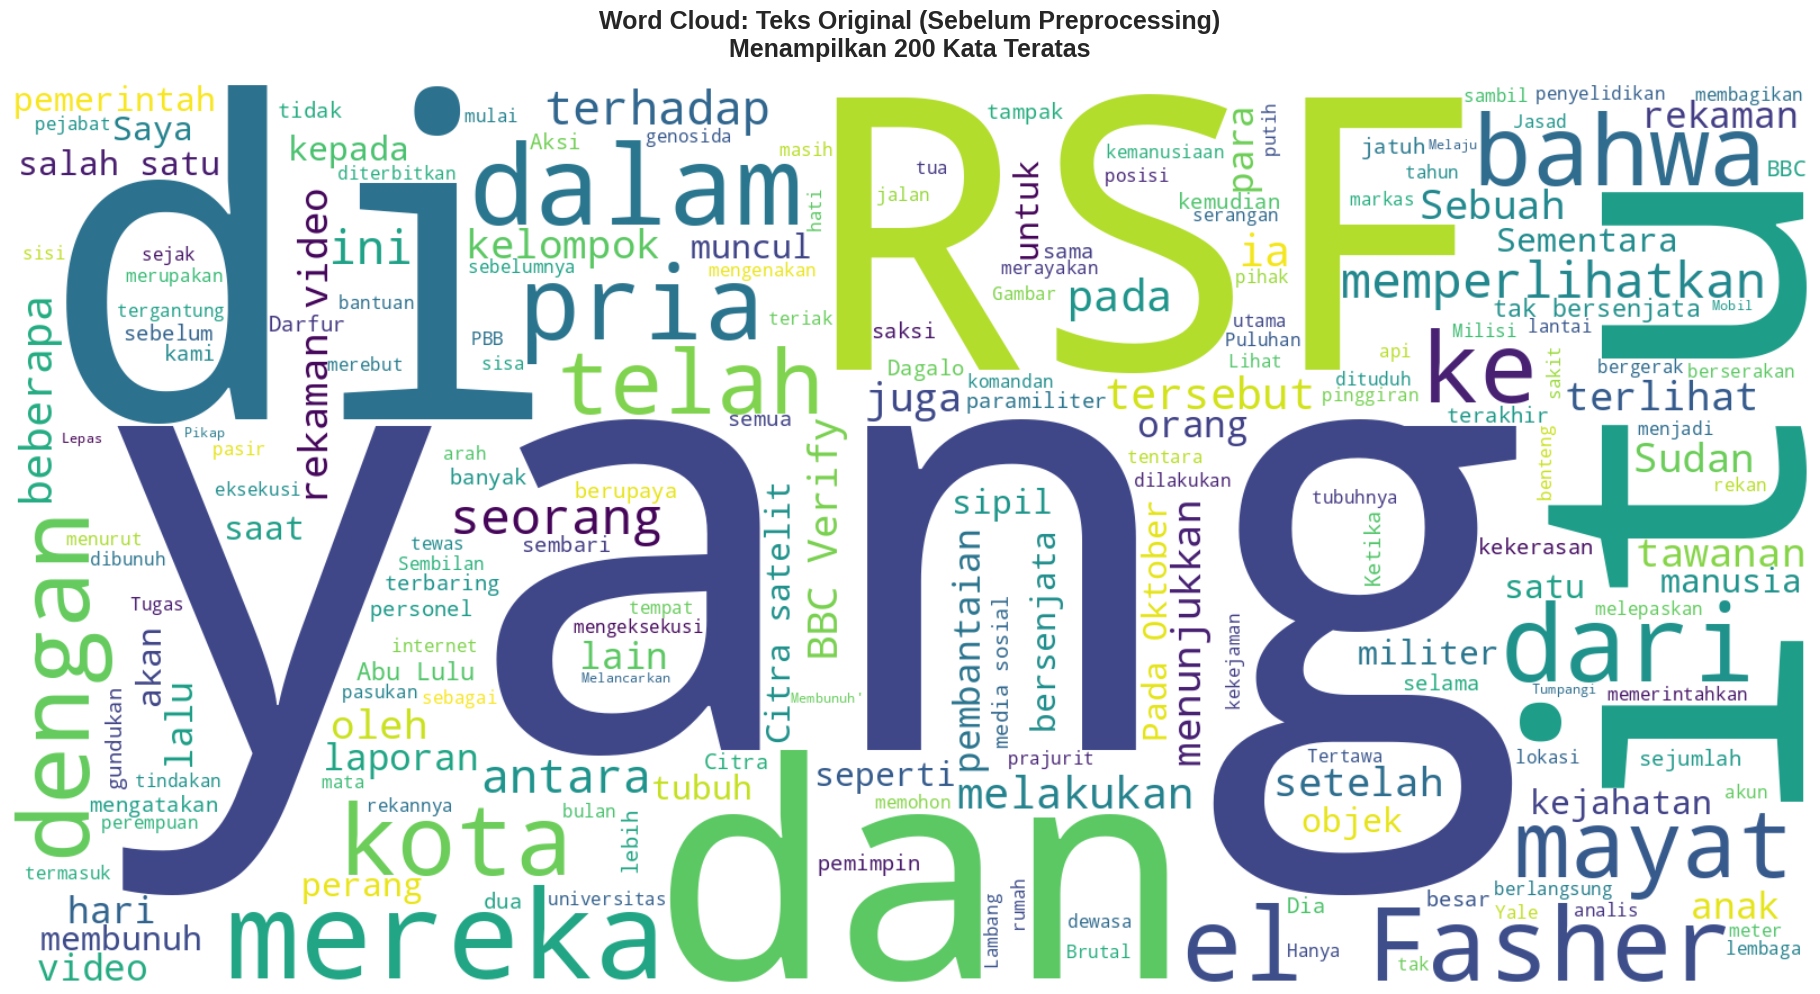

✓ Word cloud berhasil dibuat!

💡 Insight:
   - Word cloud ini menampilkan kata-kata SEBELUM preprocessing
   - Stopwords (the, and, of, dll.) sangat dominan
   - Ukuran kata mencerminkan frekuensi kemunculan


In [39]:
# Gabungkan semua teks original
all_text_original = ' '.join(df_full['text'].astype(str))

print("=" * 100)
print("WORD CLOUD: TEKS ORIGINAL (SEBELUM PREPROCESSING)")
print("=" * 100)
print(f"\n📊 Total karakter: {len(all_text_original):,}")
print(f"📊 Total kata: {len(all_text_original.split()):,}")
print("\n⏳ Generating word cloud...\n")

# Buat word cloud
wordcloud_original = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='viridis',
    max_words=200,
    relative_scaling=0.5,
    min_font_size=10
).generate(all_text_original)

# Plot
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Teks Original (Sebelum Preprocessing)\nMenampilkan 200 Kata Teratas',
          fontsize=18, fontweight='bold', pad=20)
plt.tight_layout(pad=0)
plt.show()

print("✓ Word cloud berhasil dibuat!")
print("\n💡 Insight:")
print("   - Word cloud ini menampilkan kata-kata SEBELUM preprocessing")
print("   - Stopwords (the, and, of, dll.) sangat dominan")
print("   - Ukuran kata mencerminkan frekuensi kemunculan")

## 4.4 Word Cloud: Teks Preprocessed (Setelah Preprocessing)

WORD CLOUD: TEKS PREPROCESSED (SETELAH PREPROCESSING)

📊 Total karakter: 9,069
📊 Total tokens: 1,272

⏳ Generating word cloud...



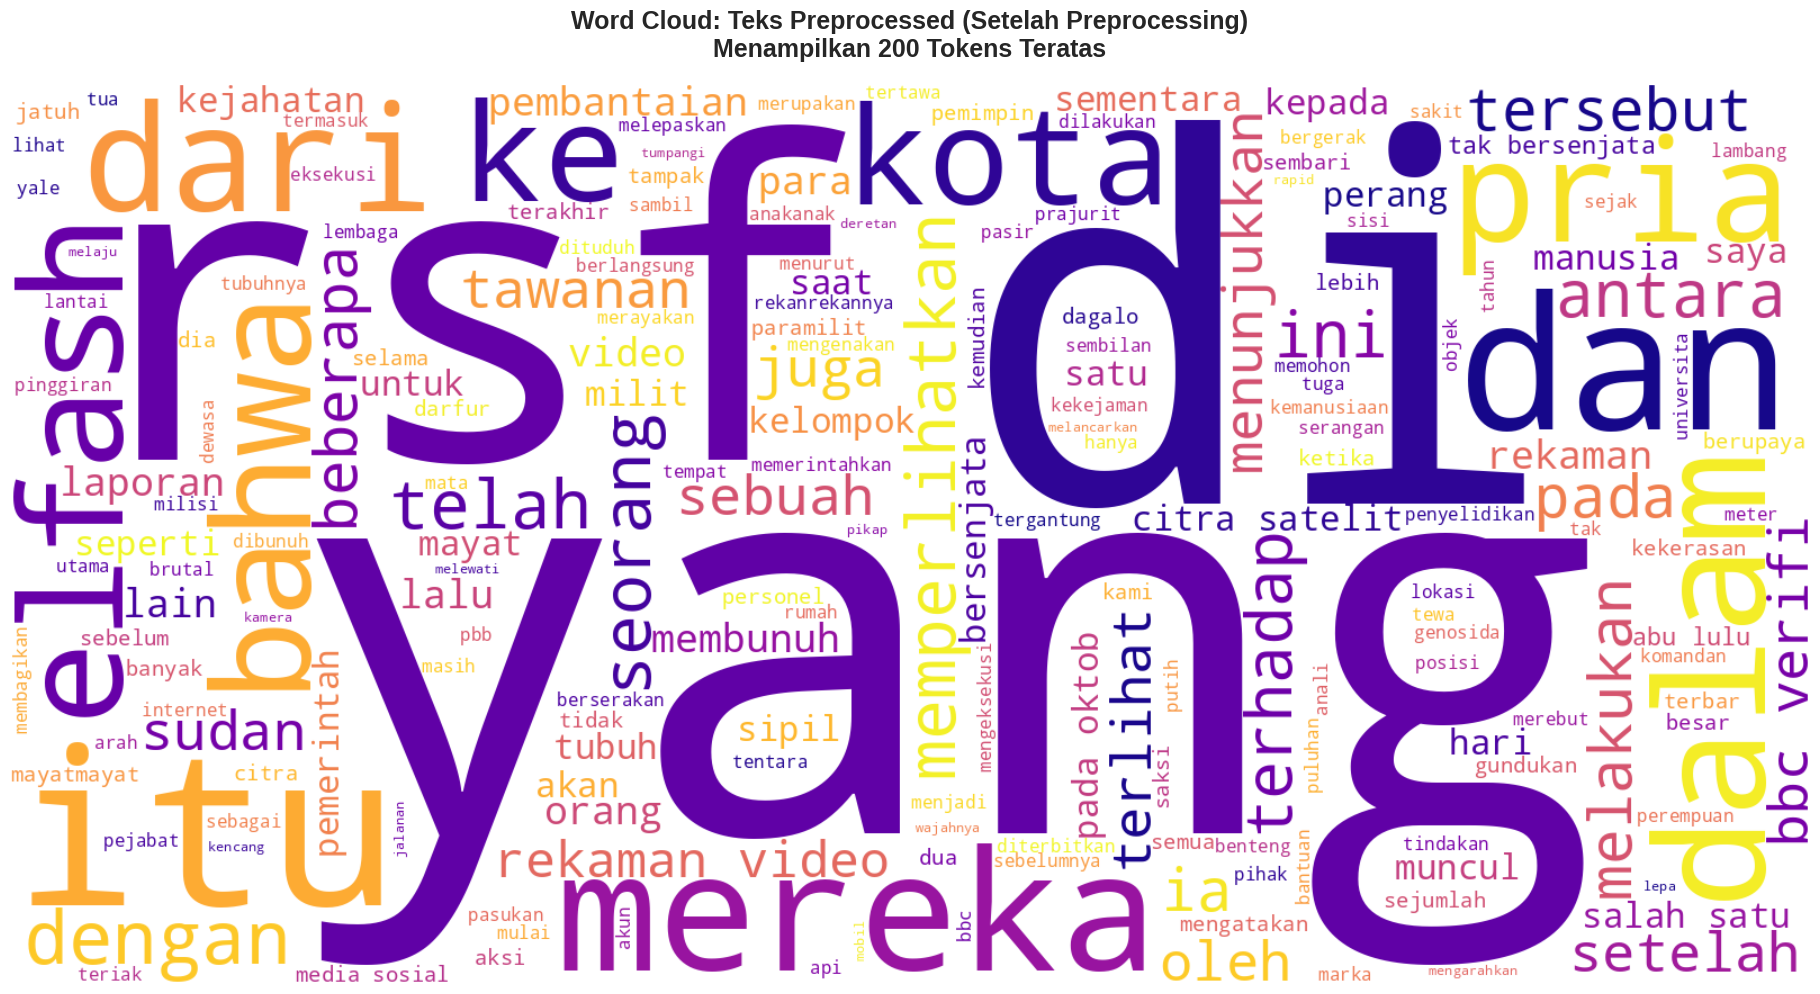

✓ Word cloud berhasil dibuat!

💡 Insight:
   - Word cloud ini menampilkan tokens SETELAH preprocessing
   - Stopwords sudah dihapus
   - Kata-kata yang muncul lebih informatif dan relevan dengan konten
   - Kata-kata sudah di-stem ke bentuk dasarnya


In [40]:
# Gabungkan semua teks preprocessed
all_text_preprocessed = ' '.join(df_full['text_preprocessed'].astype(str))

print("=" * 100)
print("WORD CLOUD: TEKS PREPROCESSED (SETELAH PREPROCESSING)")
print("=" * 100)
print(f"\n📊 Total karakter: {len(all_text_preprocessed):,}")
print(f"📊 Total tokens: {len(all_text_preprocessed.split()):,}")
print("\n⏳ Generating word cloud...\n")

# Buat word cloud
wordcloud_preprocessed = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    colormap='plasma',
    max_words=200,
    relative_scaling=0.5,
    min_font_size=10
).generate(all_text_preprocessed)

# Plot
plt.figure(figsize=(18, 10))
plt.imshow(wordcloud_preprocessed, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Teks Preprocessed (Setelah Preprocessing)\nMenampilkan 200 Tokens Teratas',
          fontsize=18, fontweight='bold', pad=20)
plt.tight_layout(pad=0)
plt.show()

print("✓ Word cloud berhasil dibuat!")
print("\n💡 Insight:")
print("   - Word cloud ini menampilkan tokens SETELAH preprocessing")
print("   - Stopwords sudah dihapus")
print("   - Kata-kata yang muncul lebih informatif dan relevan dengan konten")
print("   - Kata-kata sudah di-stem ke bentuk dasarnya")

## 4.5 Word Cloud: Perbandingan Side-by-Side

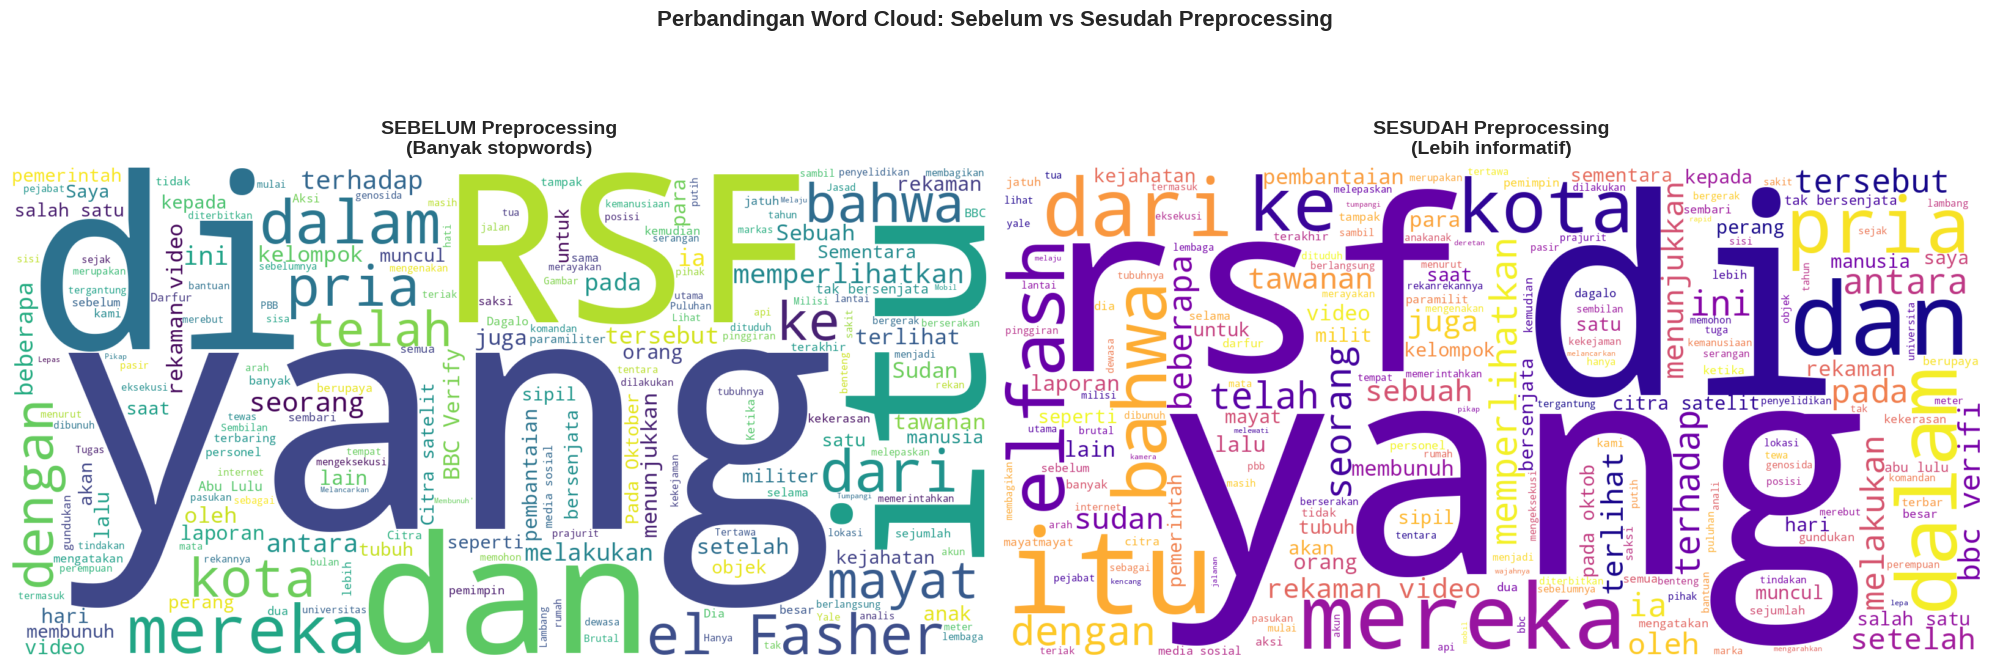


✓ Perbandingan word cloud berhasil dibuat!

💡 Perhatikan perbedaan:
   - Kiri: Didominasi stopwords (the, and, of, to, in, dll.)
   - Kanan: Kata-kata content yang lebih bermakna muncul lebih jelas


In [41]:
# Buat perbandingan visual
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Perbandingan Word Cloud: Sebelum vs Sesudah Preprocessing',
             fontsize=16, fontweight='bold', y=0.98)

# Word cloud original
axes[0].imshow(wordcloud_original, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('SEBELUM Preprocessing\n(Banyak stopwords)',
                   fontsize=14, fontweight='bold', pad=10)

# Word cloud preprocessed
axes[1].imshow(wordcloud_preprocessed, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('SESUDAH Preprocessing\n(Lebih informatif)',
                   fontsize=14, fontweight='bold', pad=10)

plt.tight_layout()
plt.show()

print("\n✓ Perbandingan word cloud berhasil dibuat!")
print("\n💡 Perhatikan perbedaan:")
print("   - Kiri: Didominasi stopwords (the, and, of, to, in, dll.)")
print("   - Kanan: Kata-kata content yang lebih bermakna muncul lebih jelas")

## 4.6 Word Cloud: Berbagai Variasi Style

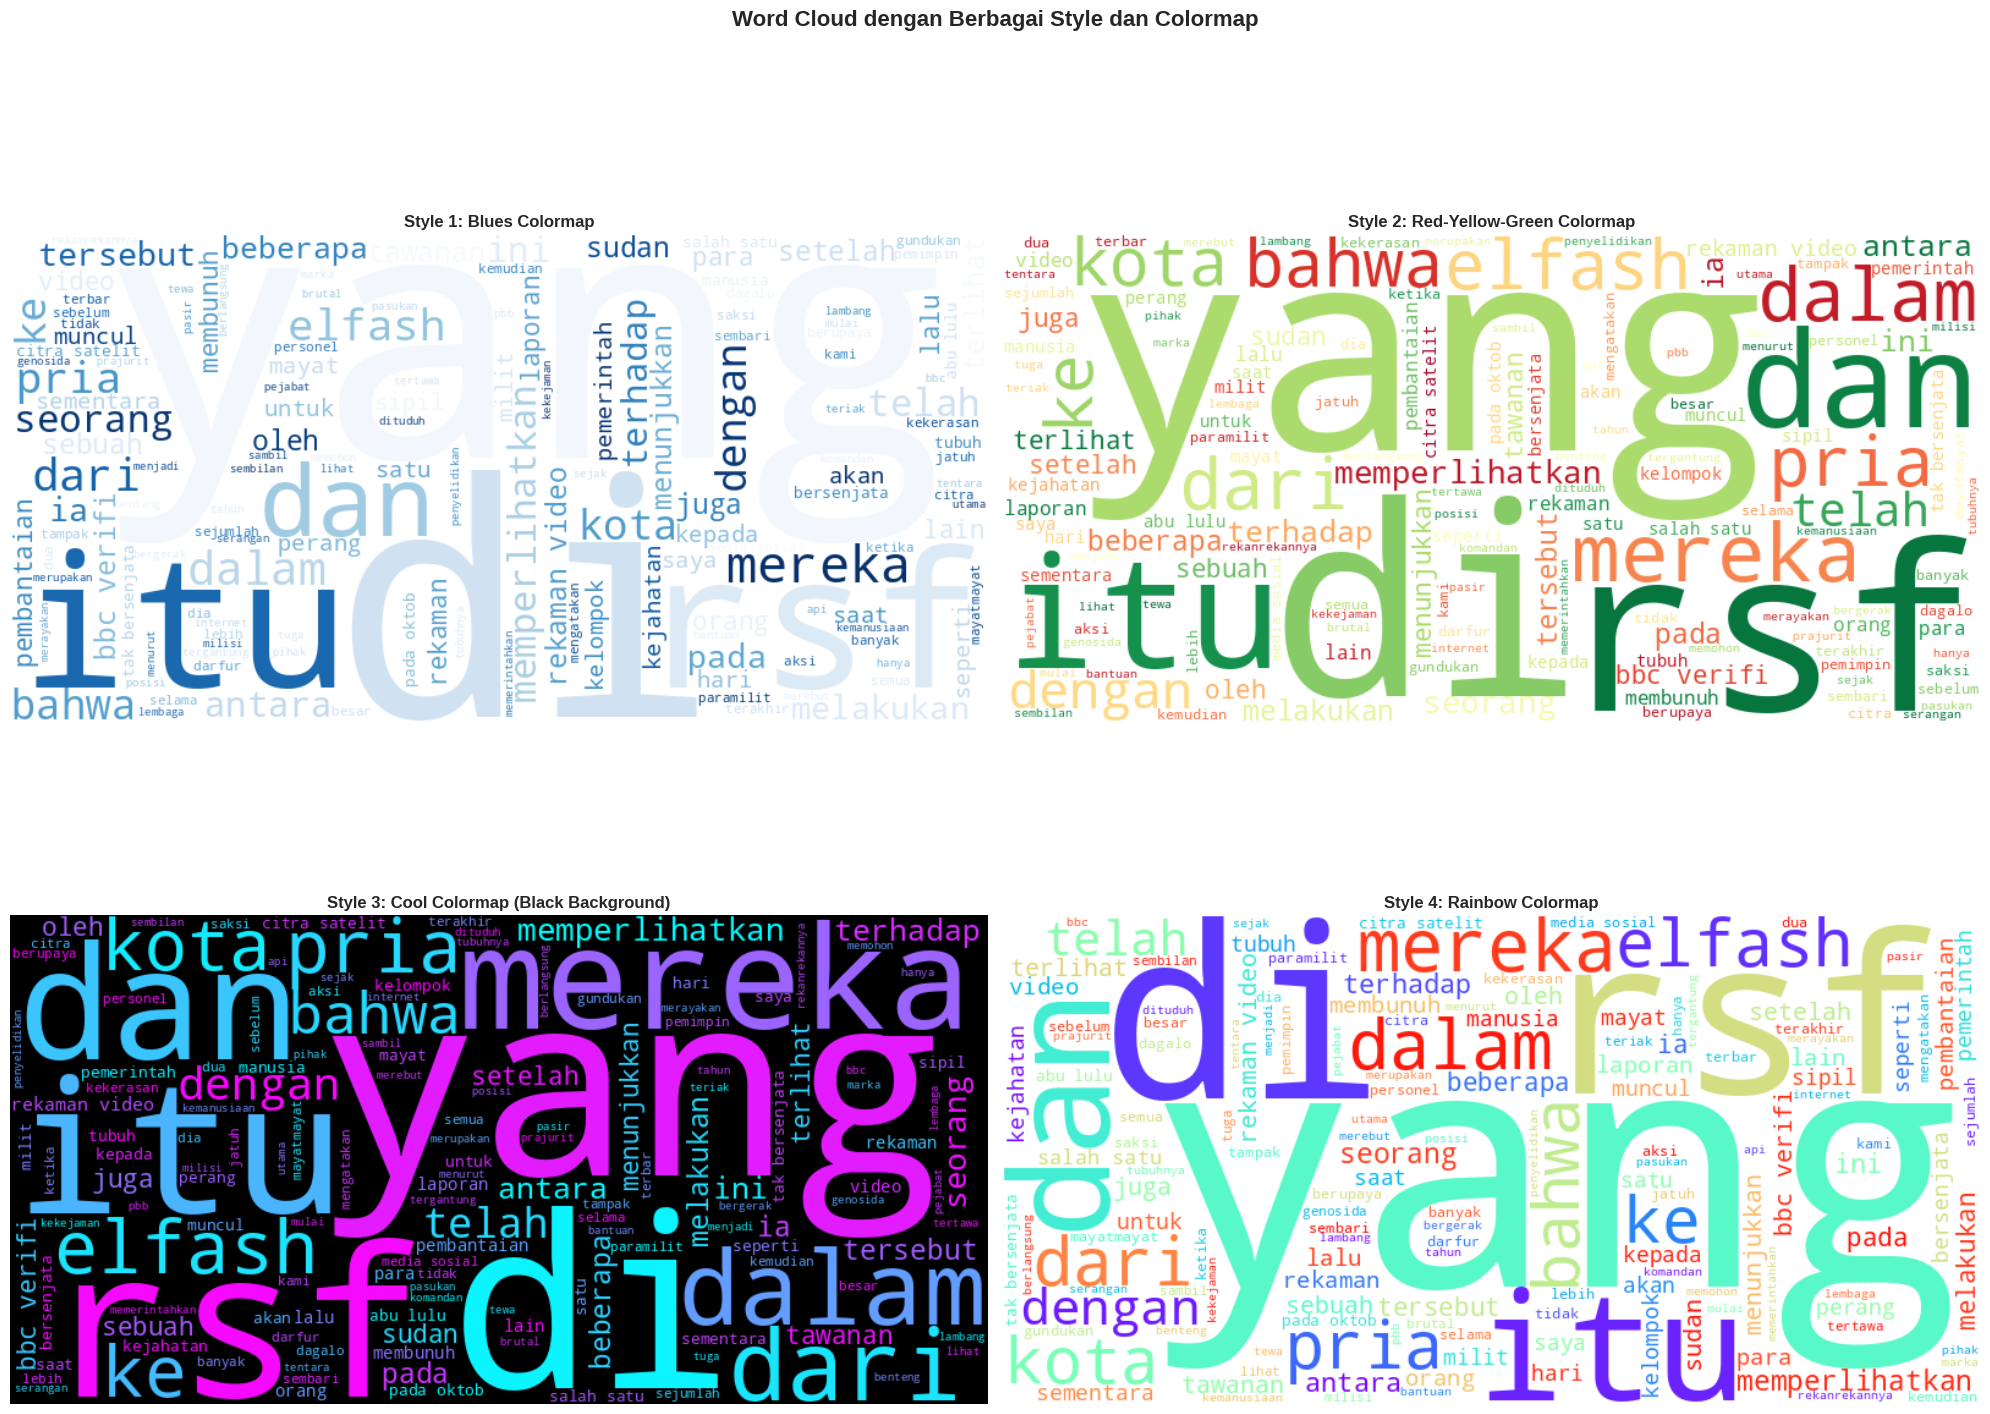

✓ Word clouds dengan berbagai style berhasil dibuat!


In [42]:
# Buat berbagai style word cloud
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
fig.suptitle('Word Cloud dengan Berbagai Style dan Colormap',
             fontsize=16, fontweight='bold', y=0.995)

# Style 1: Colormap 'Blues'
wc1 = WordCloud(width=800, height=400, background_color='white',
                colormap='Blues', max_words=150).generate(all_text_preprocessed)
axes[0, 0].imshow(wc1, interpolation='bilinear')
axes[0, 0].axis('off')
axes[0, 0].set_title('Style 1: Blues Colormap', fontsize=12, fontweight='bold')

# Style 2: Colormap 'RdYlGn'
wc2 = WordCloud(width=800, height=400, background_color='white',
                colormap='RdYlGn', max_words=150).generate(all_text_preprocessed)
axes[0, 1].imshow(wc2, interpolation='bilinear')
axes[0, 1].axis('off')
axes[0, 1].set_title('Style 2: Red-Yellow-Green Colormap', fontsize=12, fontweight='bold')

# Style 3: Colormap 'cool'
wc3 = WordCloud(width=800, height=400, background_color='black',
                colormap='cool', max_words=150).generate(all_text_preprocessed)
axes[1, 0].imshow(wc3, interpolation='bilinear')
axes[1, 0].axis('off')
axes[1, 0].set_title('Style 3: Cool Colormap (Black Background)', fontsize=12, fontweight='bold')

# Style 4: Colormap 'rainbow'
wc4 = WordCloud(width=800, height=400, background_color='white',
                colormap='rainbow', max_words=150, relative_scaling=0.3).generate(all_text_preprocessed)
axes[1, 1].imshow(wc4, interpolation='bilinear')
axes[1, 1].axis('off')
axes[1, 1].set_title('Style 4: Rainbow Colormap', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Word clouds dengan berbagai style berhasil dibuat!")

# PART 2: DISTRIBUSI PANJANG TEKS

Pada bagian ini, kita akan menganalisis distribusi panjang teks dalam berbagai metrik:
- Jumlah karakter per dokumen
- Jumlah kata per dokumen
- Jumlah kalimat per dokumen

## 4.7 Distribusi Jumlah Kata per Dokumen

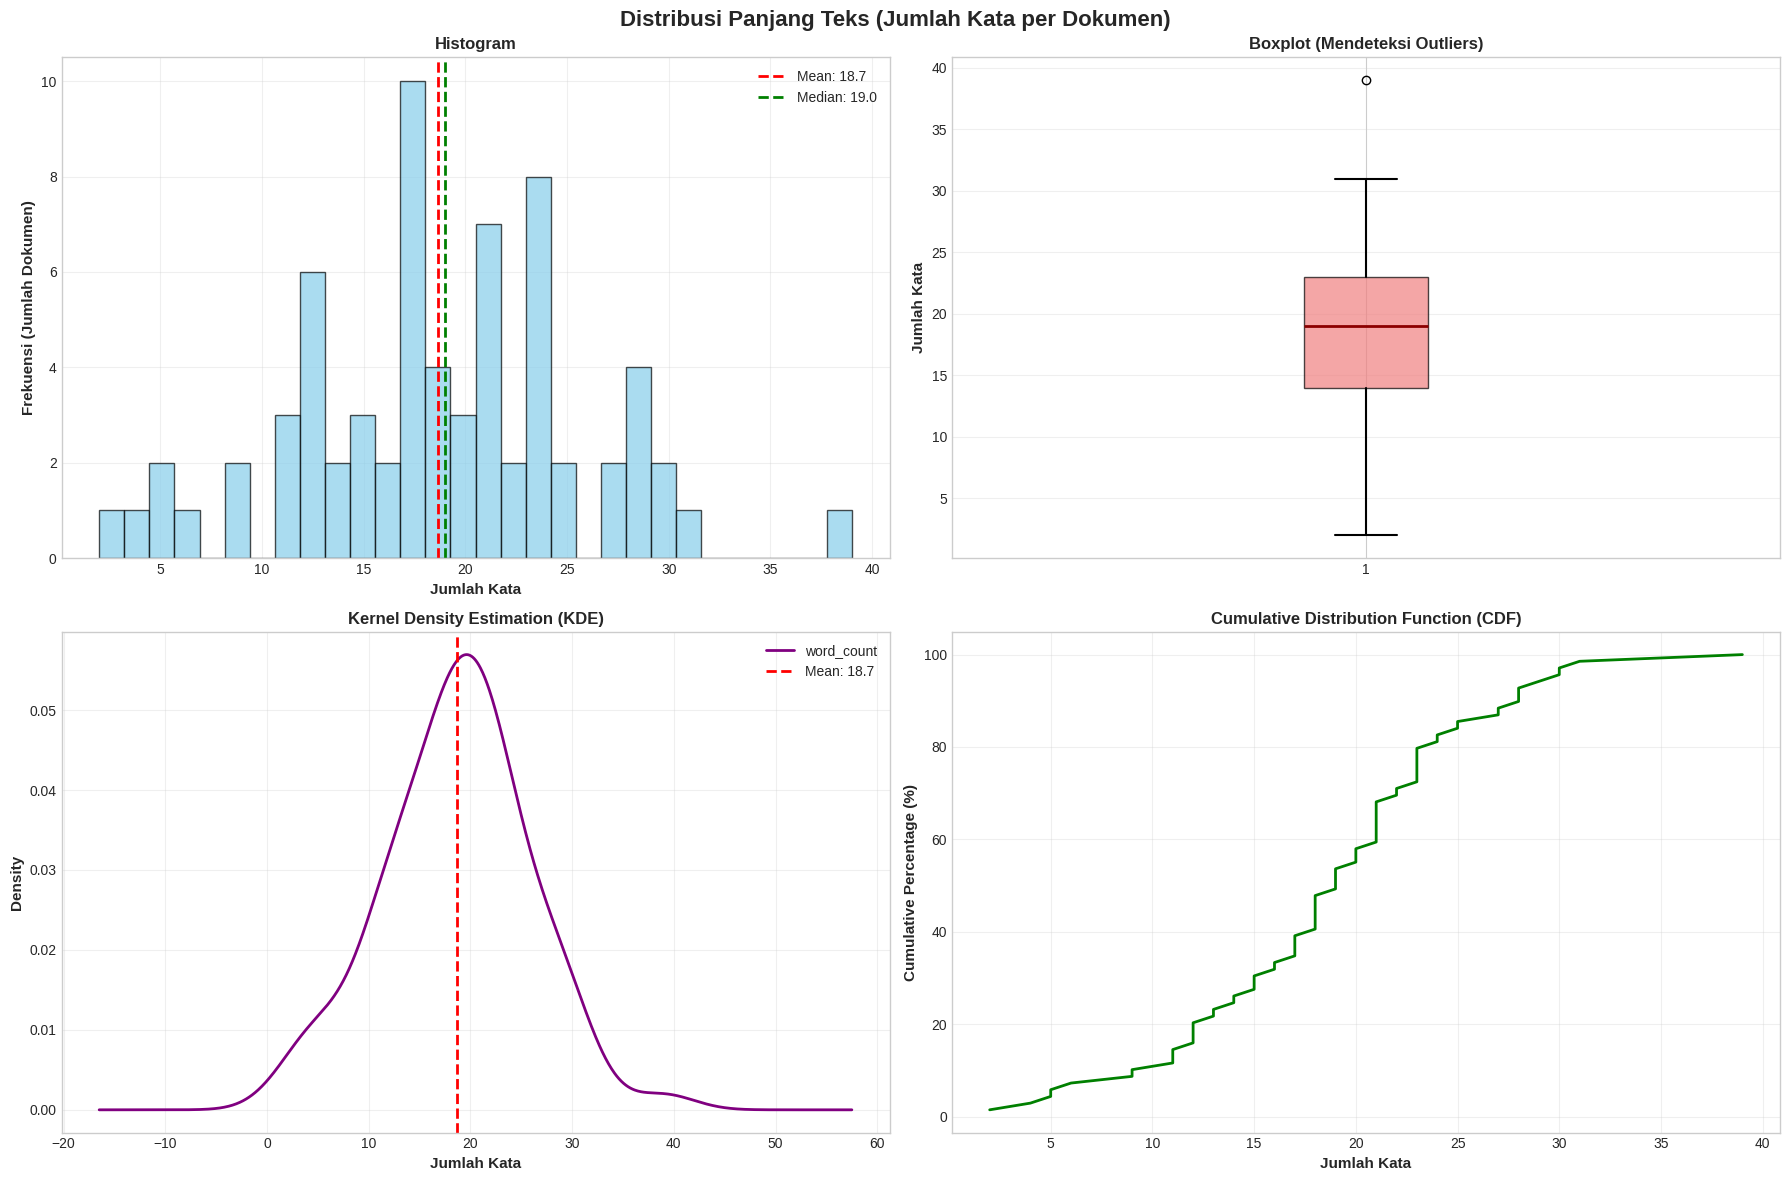


✓ Visualisasi distribusi jumlah kata berhasil dibuat!

💡 Interpretasi:
   - Histogram: Menunjukkan frekuensi dokumen untuk setiap range jumlah kata
   - Boxplot: Menunjukkan median, quartiles, dan outliers
   - KDE: Menunjukkan probabilitas density dari distribusi
   - CDF: Menunjukkan persentase kumulatif dokumen hingga jumlah kata tertentu


In [43]:
# Visualisasi distribusi jumlah kata
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribusi Panjang Teks (Jumlah Kata per Dokumen)',
             fontsize=16, fontweight='bold')

# 1. Histogram
axes[0, 0].hist(df_full['word_count'], bins=30, color='skyblue',
                edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_full['word_count'].mean(), color='red',
                    linestyle='--', linewidth=2, label=f"Mean: {df_full['word_count'].mean():.1f}")
axes[0, 0].axvline(df_full['word_count'].median(), color='green',
                    linestyle='--', linewidth=2, label=f"Median: {df_full['word_count'].median():.1f}")
axes[0, 0].set_xlabel('Jumlah Kata', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Frekuensi (Jumlah Dokumen)', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Histogram', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Boxplot
box = axes[0, 1].boxplot(df_full['word_count'], vert=True, patch_artist=True,
                          boxprops=dict(facecolor='lightcoral', alpha=0.7),
                          medianprops=dict(color='darkred', linewidth=2),
                          whiskerprops=dict(linewidth=1.5),
                          capprops=dict(linewidth=1.5))
axes[0, 1].set_ylabel('Jumlah Kata', fontsize=11, fontweight='bold')
axes[0, 1].set_title('Boxplot (Mendeteksi Outliers)', fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# 3. Density Plot (KDE)
df_full['word_count'].plot(kind='density', ax=axes[1, 0], color='purple', linewidth=2)
axes[1, 0].axvline(df_full['word_count'].mean(), color='red',
                    linestyle='--', linewidth=2, label=f"Mean: {df_full['word_count'].mean():.1f}")
axes[1, 0].set_xlabel('Jumlah Kata', fontsize=11, fontweight='bold')
axes[1, 0].set_ylabel('Density', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Kernel Density Estimation (KDE)', fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Cumulative Distribution
sorted_word_counts = np.sort(df_full['word_count'])
cumulative = np.arange(1, len(sorted_word_counts) + 1) / len(sorted_word_counts) * 100
axes[1, 1].plot(sorted_word_counts, cumulative, color='green', linewidth=2)
axes[1, 1].set_xlabel('Jumlah Kata', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Cumulative Percentage (%)', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Cumulative Distribution Function (CDF)', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✓ Visualisasi distribusi jumlah kata berhasil dibuat!")
print("\n💡 Interpretasi:")
print("   - Histogram: Menunjukkan frekuensi dokumen untuk setiap range jumlah kata")
print("   - Boxplot: Menunjukkan median, quartiles, dan outliers")
print("   - KDE: Menunjukkan probabilitas density dari distribusi")
print("   - CDF: Menunjukkan persentase kumulatif dokumen hingga jumlah kata tertentu")

## 4.8 Distribusi Multi-Metrik (Karakter, Kata, Kalimat)

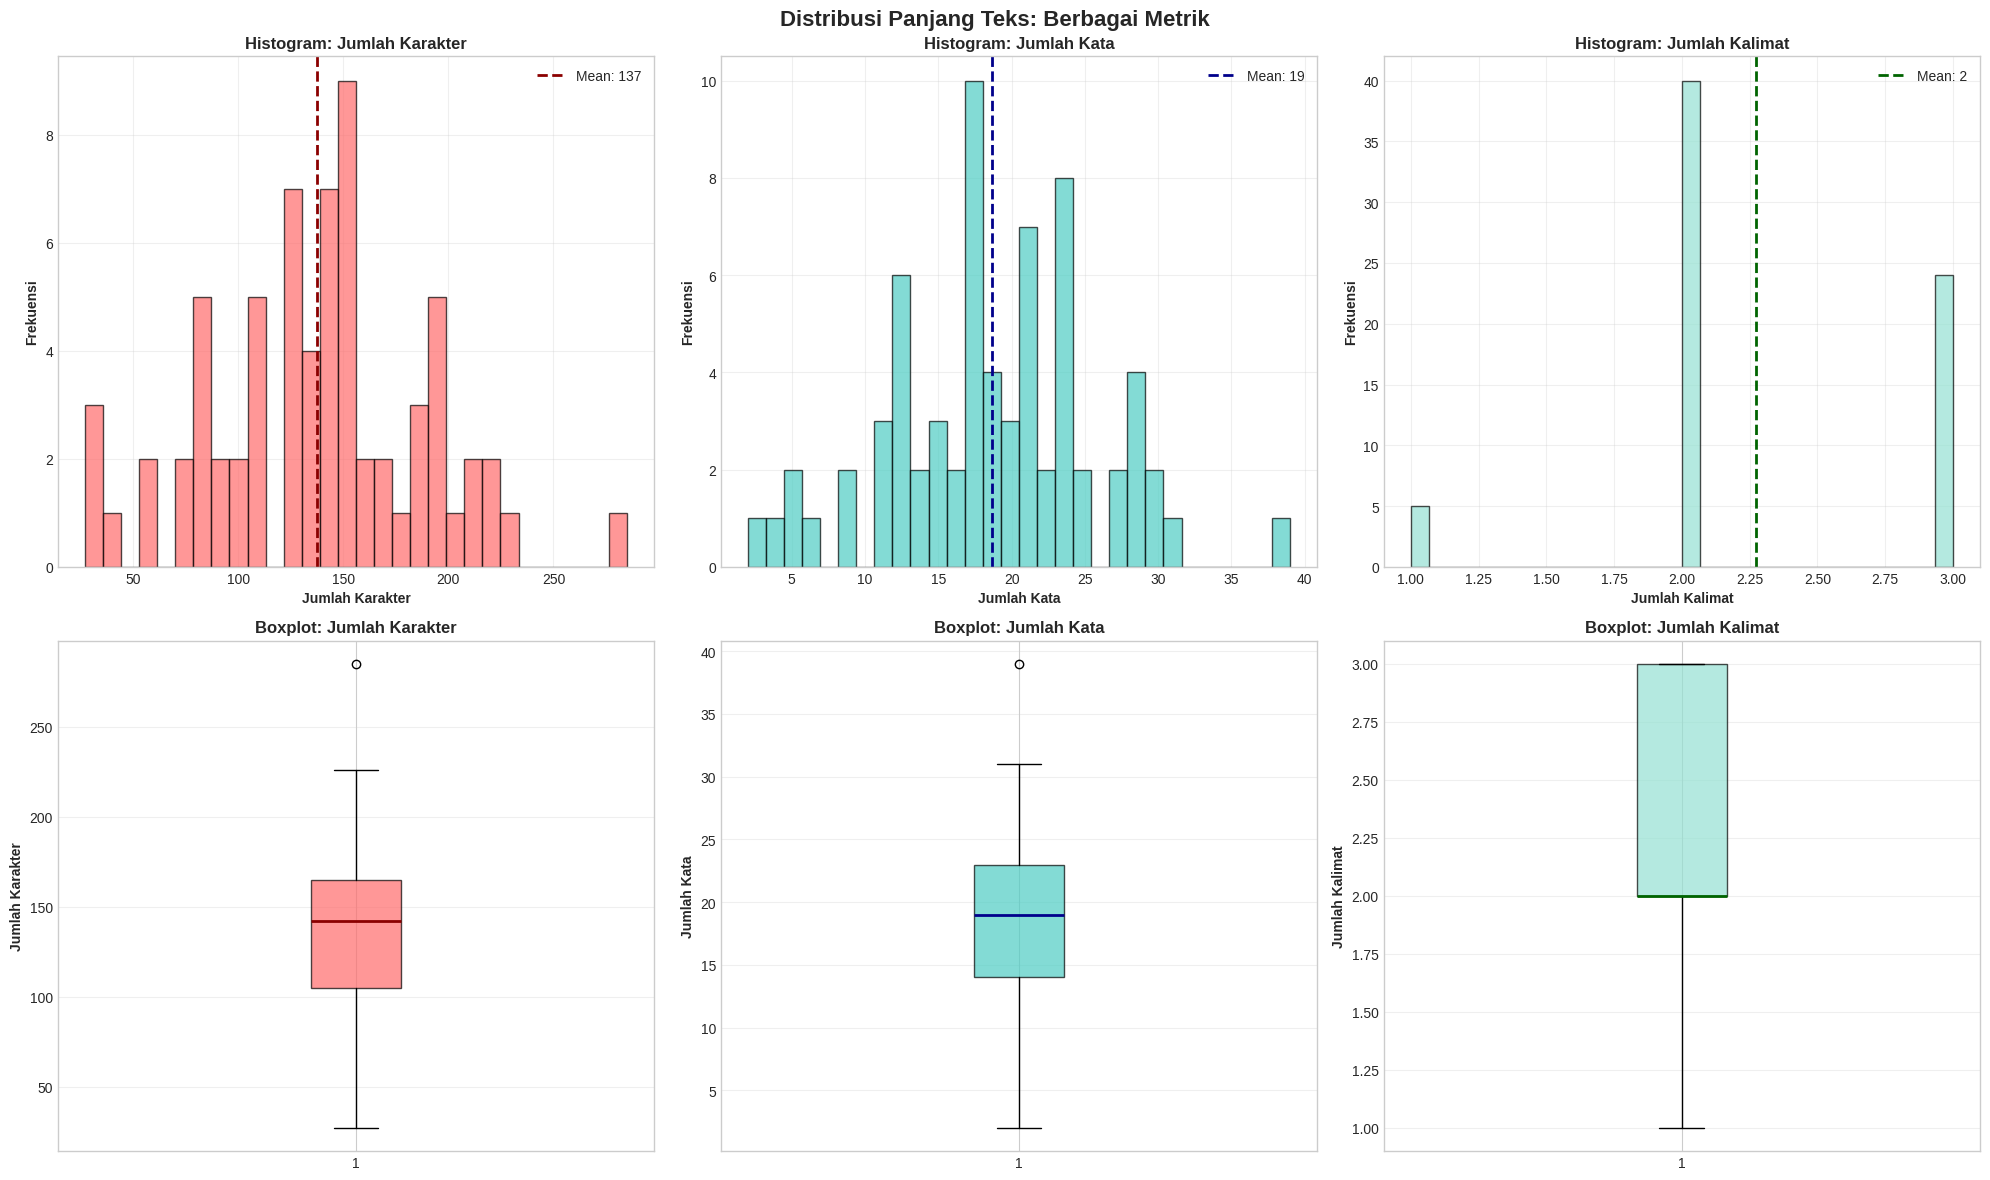


✓ Visualisasi multi-metrik berhasil dibuat!


In [44]:
# Perbandingan distribusi berbagai metrik
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Distribusi Panjang Teks: Berbagai Metrik',
             fontsize=16, fontweight='bold')

# ROW 1: Histograms
# Karakter
axes[0, 0].hist(df_full['char_count'], bins=30, color='#FF6B6B',
                edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_full['char_count'].mean(), color='darkred',
                    linestyle='--', linewidth=2, label=f"Mean: {df_full['char_count'].mean():.0f}")
axes[0, 0].set_xlabel('Jumlah Karakter', fontsize=10, fontweight='bold')
axes[0, 0].set_ylabel('Frekuensi', fontsize=10, fontweight='bold')
axes[0, 0].set_title('Histogram: Jumlah Karakter', fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Kata
axes[0, 1].hist(df_full['word_count'], bins=30, color='#4ECDC4',
                edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df_full['word_count'].mean(), color='darkblue',
                    linestyle='--', linewidth=2, label=f"Mean: {df_full['word_count'].mean():.0f}")
axes[0, 1].set_xlabel('Jumlah Kata', fontsize=10, fontweight='bold')
axes[0, 1].set_ylabel('Frekuensi', fontsize=10, fontweight='bold')
axes[0, 1].set_title('Histogram: Jumlah Kata', fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Kalimat
axes[0, 2].hist(df_full['sentence_count'], bins=30, color='#95E1D3',
                edgecolor='black', alpha=0.7)
axes[0, 2].axvline(df_full['sentence_count'].mean(), color='darkgreen',
                    linestyle='--', linewidth=2, label=f"Mean: {df_full['sentence_count'].mean():.0f}")
axes[0, 2].set_xlabel('Jumlah Kalimat', fontsize=10, fontweight='bold')
axes[0, 2].set_ylabel('Frekuensi', fontsize=10, fontweight='bold')
axes[0, 2].set_title('Histogram: Jumlah Kalimat', fontweight='bold')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# ROW 2: Boxplots
# Karakter
axes[1, 0].boxplot(df_full['char_count'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='#FF6B6B', alpha=0.7),
                    medianprops=dict(color='darkred', linewidth=2))
axes[1, 0].set_ylabel('Jumlah Karakter', fontsize=10, fontweight='bold')
axes[1, 0].set_title('Boxplot: Jumlah Karakter', fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Kata
axes[1, 1].boxplot(df_full['word_count'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='#4ECDC4', alpha=0.7),
                    medianprops=dict(color='darkblue', linewidth=2))
axes[1, 1].set_ylabel('Jumlah Kata', fontsize=10, fontweight='bold')
axes[1, 1].set_title('Boxplot: Jumlah Kata', fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Kalimat
axes[1, 2].boxplot(df_full['sentence_count'], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='#95E1D3', alpha=0.7),
                    medianprops=dict(color='darkgreen', linewidth=2))
axes[1, 2].set_ylabel('Jumlah Kalimat', fontsize=10, fontweight='bold')
axes[1, 2].set_title('Boxplot: Jumlah Kalimat', fontweight='bold')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n✓ Visualisasi multi-metrik berhasil dibuat!")

## 4.9 Analisis Outliers

In [45]:
# Deteksi outliers menggunakan IQR method
def detect_outliers_iqr(data):
    """
    Mendeteksi outliers menggunakan Interquartile Range (IQR) method.
    """
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_lower = data[data < lower_bound]
    outliers_upper = data[data > upper_bound]

    return outliers_lower, outliers_upper, lower_bound, upper_bound

print("=" * 100)
print("ANALISIS OUTLIERS (Menggunakan IQR Method)")
print("=" * 100)

# Deteksi outliers untuk jumlah kata
outliers_lower, outliers_upper, lower_bound, upper_bound = detect_outliers_iqr(df_full['word_count'])

print(f"\n📊 Analisis Outliers untuk JUMLAH KATA:")
print(f"\n   Batas Bawah (Lower Bound): {lower_bound:.2f}")
print(f"   Batas Atas (Upper Bound): {upper_bound:.2f}")
print(f"\n   Outliers Bawah (< {lower_bound:.2f}): {len(outliers_lower)} dokumen")
print(f"   Outliers Atas (> {upper_bound:.2f}): {len(outliers_upper)} dokumen")
print(f"\n   Total Outliers: {len(outliers_lower) + len(outliers_upper)} dari {len(df_full)} dokumen")
print(f"   Persentase Outliers: {((len(outliers_lower) + len(outliers_upper)) / len(df_full)) * 100:.2f}%")

# Tampilkan beberapa outliers
if len(outliers_upper) > 0:
    print(f"\n   📌 Contoh dokumen dengan jumlah kata SANGAT TINGGI (outliers atas):")
    for idx in outliers_upper.index[:3]:  # Tampilkan 3 teratas
        print(f"      - Dokumen {idx}: {df_full.loc[idx, 'word_count']} kata")
        print(f"        Preview: {df_full.loc[idx, 'text'][:100]}...")

if len(outliers_lower) > 0:
    print(f"\n   📌 Contoh dokumen dengan jumlah kata SANGAT RENDAH (outliers bawah):")
    for idx in outliers_lower.index[:3]:  # Tampilkan 3 teratas
        print(f"      - Dokumen {idx}: {df_full.loc[idx, 'word_count']} kata")
        print(f"        Preview: {df_full.loc[idx, 'text'][:100]}...")

ANALISIS OUTLIERS (Menggunakan IQR Method)

📊 Analisis Outliers untuk JUMLAH KATA:

   Batas Bawah (Lower Bound): 0.50
   Batas Atas (Upper Bound): 36.50

   Outliers Bawah (< 0.50): 0 dokumen
   Outliers Atas (> 36.50): 1 dokumen

   Total Outliers: 1 dari 69 dokumen
   Persentase Outliers: 1.45%

   📌 Contoh dokumen dengan jumlah kata SANGAT TINGGI (outliers atas):
      - Dokumen 59: 39 kata
        Preview: Sebuah laporan yang diterbitkan pada 4 November mencatat bahwa citra satelit menunjukkan pengangkata...


# PART 3: FREKUENSI KATA TERATAS (BAR PLOTS)

Pada bagian ini, kita akan memvisualisasikan kata-kata yang paling sering muncul menggunakan bar plots.

## 4.10 Top 20 Kata Paling Sering Muncul (Original)

⏳ Menghitung frekuensi kata dari teks original...

✓ Frekuensi kata berhasil dihitung!

📊 Total unique words: 602
📊 Total words: 1,288

TOP 20 KATA PALING SERING MUNCUL (TEKS ORIGINAL)


Kata  Frekuensi
0             yang         48
1               di         41
2              rsf         29
3              itu         29
4              dan         21
5           mereka         17
6            dalam         14
7             dari         13
8             pria         12
9        el-fasher         12
10            kota         11
11            pada         11
12           bahwa         11
13           video         11
14         rekaman         11
15          dengan         11
16              ke         10
17           telah          9
18  memperlihatkan          9
19         seorang          9

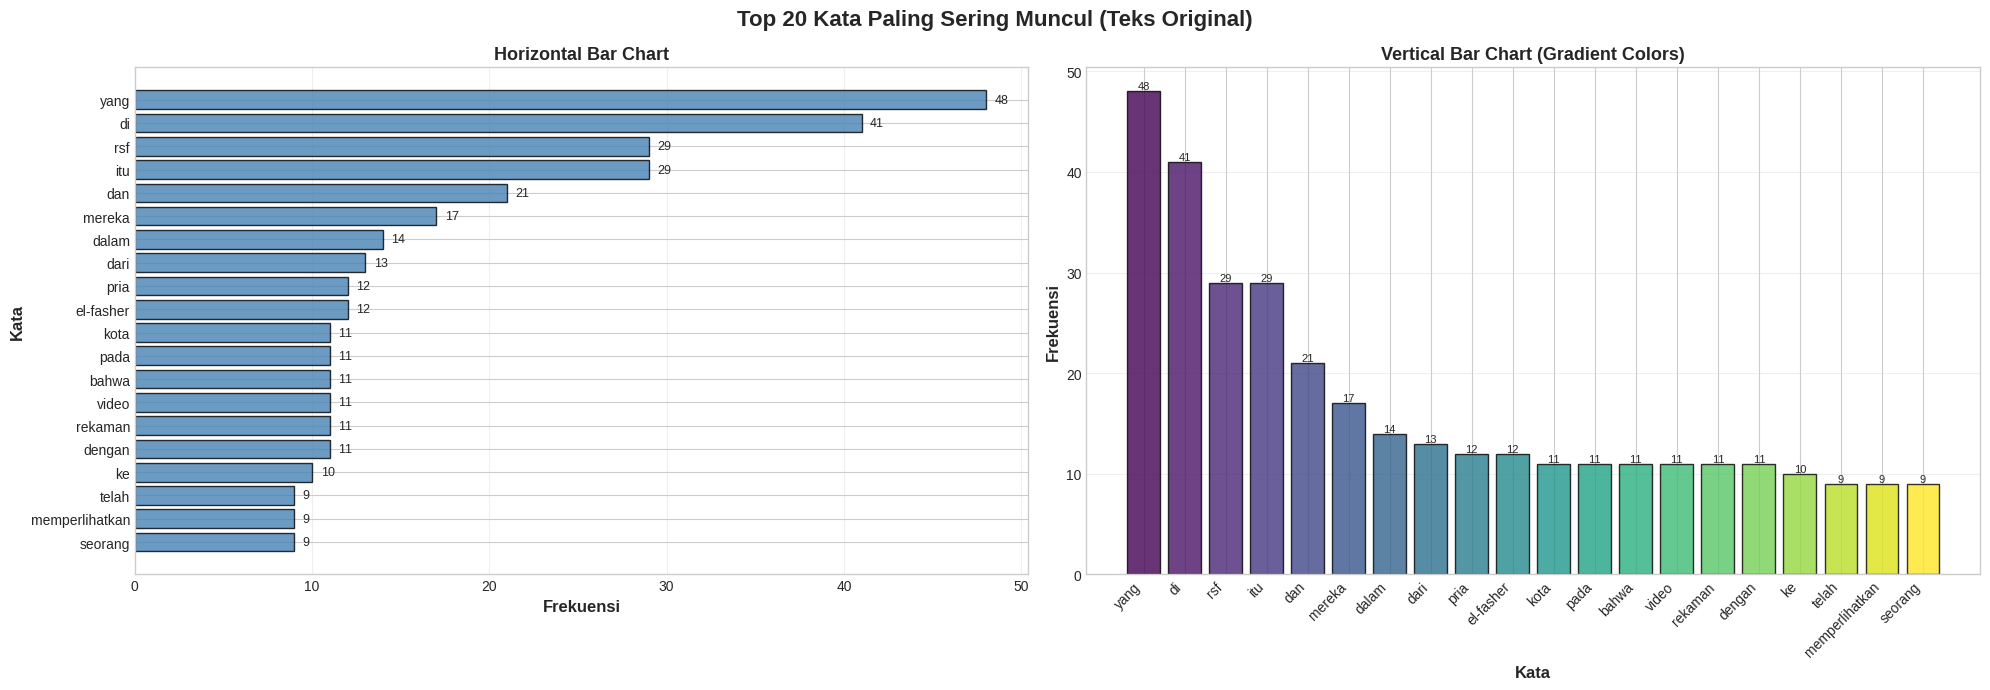


✓ Bar plots berhasil dibuat!

💡 Insight:
   - Stopwords (the, and, of, to, in) sangat dominan di teks original
   - Kata-kata ini tidak membawa informasi spesifik tentang konten
   - Ini menunjukkan pentingnya preprocessing untuk analisis lebih lanjut


In [46]:
# Hitung frekuensi kata dari teks original
print("⏳ Menghitung frekuensi kata dari teks original...\n")

# Gabungkan semua teks dan split
all_words_original = []
for text in df_full['text']:
    # Lowercase dan hapus punctuation
    text_clean = text.lower()
    words = text_clean.split()
    # Hapus punctuation dari setiap kata
    words = [word.strip(string.punctuation) for word in words]
    all_words_original.extend(words)

# Hitung frekuensi
word_freq_original = Counter(all_words_original)
top_20_original = word_freq_original.most_common(20)

# Buat DataFrame untuk plotting
df_top20_original = pd.DataFrame(top_20_original, columns=['Kata', 'Frekuensi'])

print("✓ Frekuensi kata berhasil dihitung!")
print(f"\n📊 Total unique words: {len(word_freq_original):,}")
print(f"📊 Total words: {len(all_words_original):,}")

# Display tabel
print("\n" + "=" * 100)
print("TOP 20 KATA PALING SERING MUNCUL (TEKS ORIGINAL)")
print("=" * 100)
display(df_top20_original)

# Visualisasi Bar Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Top 20 Kata Paling Sering Muncul (Teks Original)',
             fontsize=16, fontweight='bold')

# Horizontal bar plot
axes[0].barh(df_top20_original['Kata'], df_top20_original['Frekuensi'],
             color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Frekuensi', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Kata', fontsize=12, fontweight='bold')
axes[0].set_title('Horizontal Bar Chart', fontweight='bold', fontsize=13)
axes[0].invert_yaxis()  # Kata dengan frekuensi tertinggi di atas
axes[0].grid(True, alpha=0.3, axis='x')

# Tambahkan nilai di ujung bar
for i, (kata, freq) in enumerate(zip(df_top20_original['Kata'], df_top20_original['Frekuensi'])):
    axes[0].text(freq + max(df_top20_original['Frekuensi']) * 0.01, i,
                 f'{freq:,}', va='center', fontsize=9)

# Vertical bar plot
bars = axes[1].bar(range(len(df_top20_original)), df_top20_original['Frekuensi'],
                    color=plt.cm.viridis(np.linspace(0, 1, 20)),
                    edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Kata', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frekuensi', fontsize=12, fontweight='bold')
axes[1].set_title('Vertical Bar Chart (Gradient Colors)', fontweight='bold', fontsize=13)
axes[1].set_xticks(range(len(df_top20_original)))
axes[1].set_xticklabels(df_top20_original['Kata'], rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for i, (bar, freq) in enumerate(zip(bars, df_top20_original['Frekuensi'])):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{freq:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n✓ Bar plots berhasil dibuat!")
print("\n💡 Insight:")
print("   - Stopwords (the, and, of, to, in) sangat dominan di teks original")
print("   - Kata-kata ini tidak membawa informasi spesifik tentang konten")
print("   - Ini menunjukkan pentingnya preprocessing untuk analisis lebih lanjut")

## 4.11 Top 20 Tokens Paling Sering Muncul (Preprocessed)

⏳ Menghitung frekuensi tokens dari teks preprocessed...

✓ Frekuensi tokens berhasil dihitung!

📊 Total unique tokens: 582
📊 Total tokens: 1,272

TOP 20 TOKENS PALING SERING MUNCUL (TEKS PREPROCESSED)


Token  Frekuensi
0             yang         49
1               di         41
2              rsf         30
3              itu         29
4              dan         21
5           mereka         17
6            dalam         14
7             dari         13
8             pria         12
9           elfash         12
10              ke         11
11            kota         11
12            pada         11
13           bahwa         11
14           video         11
15         rekaman         11
16          dengan         11
17           telah          9
18  memperlihatkan          9
19         seorang          9

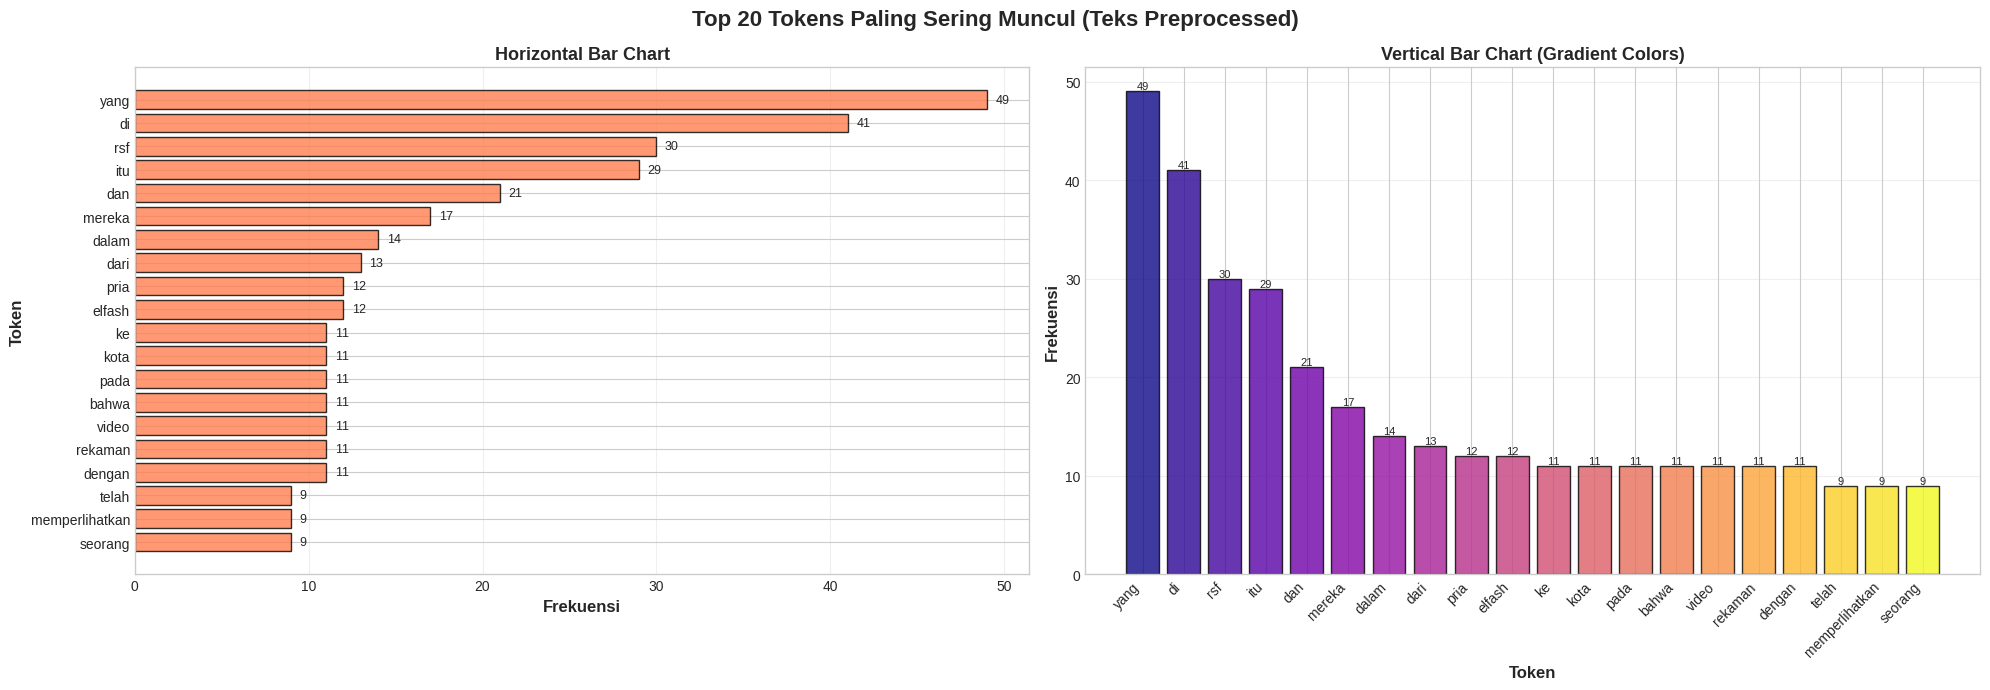


✓ Bar plots berhasil dibuat!

💡 Insight:
   - Tokens setelah preprocessing lebih informatif dan relevan
   - Stopwords sudah dihilangkan
   - Tokens mencerminkan konten aktual dari dokumen


In [47]:
# Hitung frekuensi tokens dari teks preprocessed
print("⏳ Menghitung frekuensi tokens dari teks preprocessed...\n")

# Gabungkan semua tokens
all_tokens_preprocessed = []
for tokens in df_full['tokens']:
    all_tokens_preprocessed.extend(tokens)

# Hitung frekuensi
token_freq_preprocessed = Counter(all_tokens_preprocessed)
top_20_preprocessed = token_freq_preprocessed.most_common(20)

# Buat DataFrame untuk plotting
df_top20_preprocessed = pd.DataFrame(top_20_preprocessed, columns=['Token', 'Frekuensi'])

print("✓ Frekuensi tokens berhasil dihitung!")
print(f"\n📊 Total unique tokens: {len(token_freq_preprocessed):,}")
print(f"📊 Total tokens: {len(all_tokens_preprocessed):,}")

# Display tabel
print("\n" + "=" * 100)
print("TOP 20 TOKENS PALING SERING MUNCUL (TEKS PREPROCESSED)")
print("=" * 100)
display(df_top20_preprocessed)

# Visualisasi Bar Plot
fig, axes = plt.subplots(1, 2, figsize=(20, 7))
fig.suptitle('Top 20 Tokens Paling Sering Muncul (Teks Preprocessed)',
             fontsize=16, fontweight='bold')

# Horizontal bar plot
axes[0].barh(df_top20_preprocessed['Token'], df_top20_preprocessed['Frekuensi'],
             color='coral', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Frekuensi', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Token', fontsize=12, fontweight='bold')
axes[0].set_title('Horizontal Bar Chart', fontweight='bold', fontsize=13)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Tambahkan nilai di ujung bar
for i, (token, freq) in enumerate(zip(df_top20_preprocessed['Token'], df_top20_preprocessed['Frekuensi'])):
    axes[0].text(freq + max(df_top20_preprocessed['Frekuensi']) * 0.01, i,
                 f'{freq:,}', va='center', fontsize=9)

# Vertical bar plot
bars = axes[1].bar(range(len(df_top20_preprocessed)), df_top20_preprocessed['Frekuensi'],
                    color=plt.cm.plasma(np.linspace(0, 1, 20)),
                    edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Token', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Frekuensi', fontsize=12, fontweight='bold')
axes[1].set_title('Vertical Bar Chart (Gradient Colors)', fontweight='bold', fontsize=13)
axes[1].set_xticks(range(len(df_top20_preprocessed)))
axes[1].set_xticklabels(df_top20_preprocessed['Token'], rotation=45, ha='right')
axes[1].grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bar
for i, (bar, freq) in enumerate(zip(bars, df_top20_preprocessed['Frekuensi'])):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                 f'{freq:,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

print("\n✓ Bar plots berhasil dibuat!")
print("\n💡 Insight:")
print("   - Tokens setelah preprocessing lebih informatif dan relevan")
print("   - Stopwords sudah dihilangkan")
print("   - Tokens mencerminkan konten aktual dari dokumen")

## 4.12 Perbandingan Side-by-Side: Original vs Preprocessed

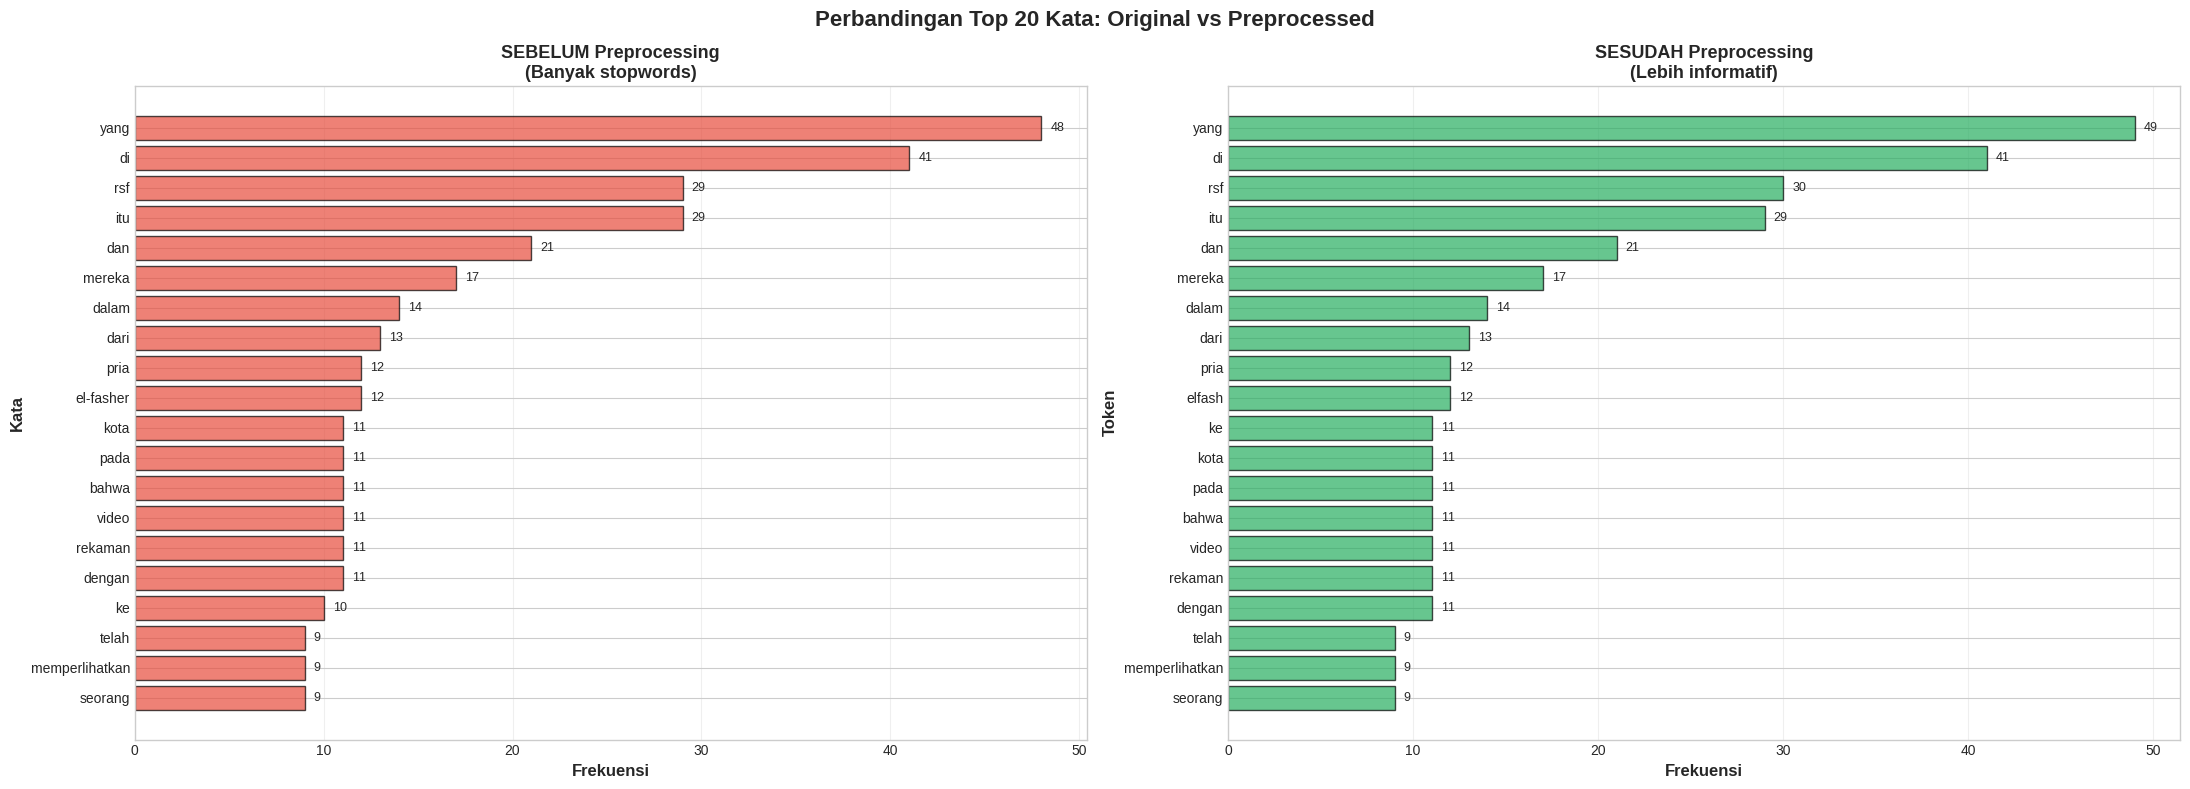


✓ Perbandingan bar plots berhasil dibuat!

💡 Perbandingan Key Insights:
   - Kiri (Original): Didominasi stopwords yang tidak informatif
   - Kanan (Preprocessed): Menampilkan kata-kata content yang bermakna
   - Preprocessing berhasil meningkatkan kualitas analisis


In [48]:
# Perbandingan visual
fig, axes = plt.subplots(1, 2, figsize=(22, 8))
fig.suptitle('Perbandingan Top 20 Kata: Original vs Preprocessed',
             fontsize=16, fontweight='bold')

# Original
axes[0].barh(df_top20_original['Kata'], df_top20_original['Frekuensi'],
             color='#E74C3C', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Frekuensi', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Kata', fontsize=12, fontweight='bold')
axes[0].set_title('SEBELUM Preprocessing\n(Banyak stopwords)',
                   fontweight='bold', fontsize=13)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Tambahkan nilai
for i, freq in enumerate(df_top20_original['Frekuensi']):
    axes[0].text(freq + max(df_top20_original['Frekuensi']) * 0.01, i,
                 f'{freq:,}', va='center', fontsize=9)

# Preprocessed
axes[1].barh(df_top20_preprocessed['Token'], df_top20_preprocessed['Frekuensi'],
             color='#27AE60', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Frekuensi', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Token', fontsize=12, fontweight='bold')
axes[1].set_title('SESUDAH Preprocessing\n(Lebih informatif)',
                   fontweight='bold', fontsize=13)
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Tambahkan nilai
for i, freq in enumerate(df_top20_preprocessed['Frekuensi']):
    axes[1].text(freq + max(df_top20_preprocessed['Frekuensi']) * 0.01, i,
                 f'{freq:,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✓ Perbandingan bar plots berhasil dibuat!")
print("\n💡 Perbandingan Key Insights:")
print("   - Kiri (Original): Didominasi stopwords yang tidak informatif")
print("   - Kanan (Preprocessed): Menampilkan kata-kata content yang bermakna")
print("   - Preprocessing berhasil meningkatkan kualitas analisis")

# PART 4: N-GRAMS ANALYSIS

N-grams adalah sekuens dari N item yang berurutan dari teks. Analisis N-grams membantu kita memahami:
- **Unigrams (1-gram)**: Kata individual
- **Bigrams (2-grams)**: Pasangan kata yang sering muncul bersama
- **Trigrams (3-grams)**: Tiga kata yang sering muncul bersama

## 4.13 Top Bigrams (2-grams)

⏳ Mengekstrak bigrams dari teks preprocessed...

✓ Bigrams berhasil diekstrak!

📊 Total unique bigrams: 20

TOP 20 BIGRAMS (Pasangan Kata yang Sering Muncul Bersama)


Bigram  Frekuensi
1          bbc verifi          6
12      rekaman video          6
4           di antara          5
0            abu lulu          4
16     tak bersenjata          4
3       citra satelit          4
9          pada oktob          4
5           di elfash          4
14         salah satu          4
15       seorang pria          4
2       beberapa hari          3
6            ke dalam          3
11    pria bersenjata          3
10       pemimpin rsf          3
8   menunjukkan bahwa          3
7          kepada bbc          3
13       rekaman yang          3
17        tawanan tak          3
18         video yang          3
19        yang muncul          3


💡 Interpretasi Bigrams:
   - Bigrams menunjukkan pasangan kata yang sering muncul bersamaan
   - Memberikan konteks lebih baik dibanding unigrams
   - Membantu identifikasi frasa dan konsep penting


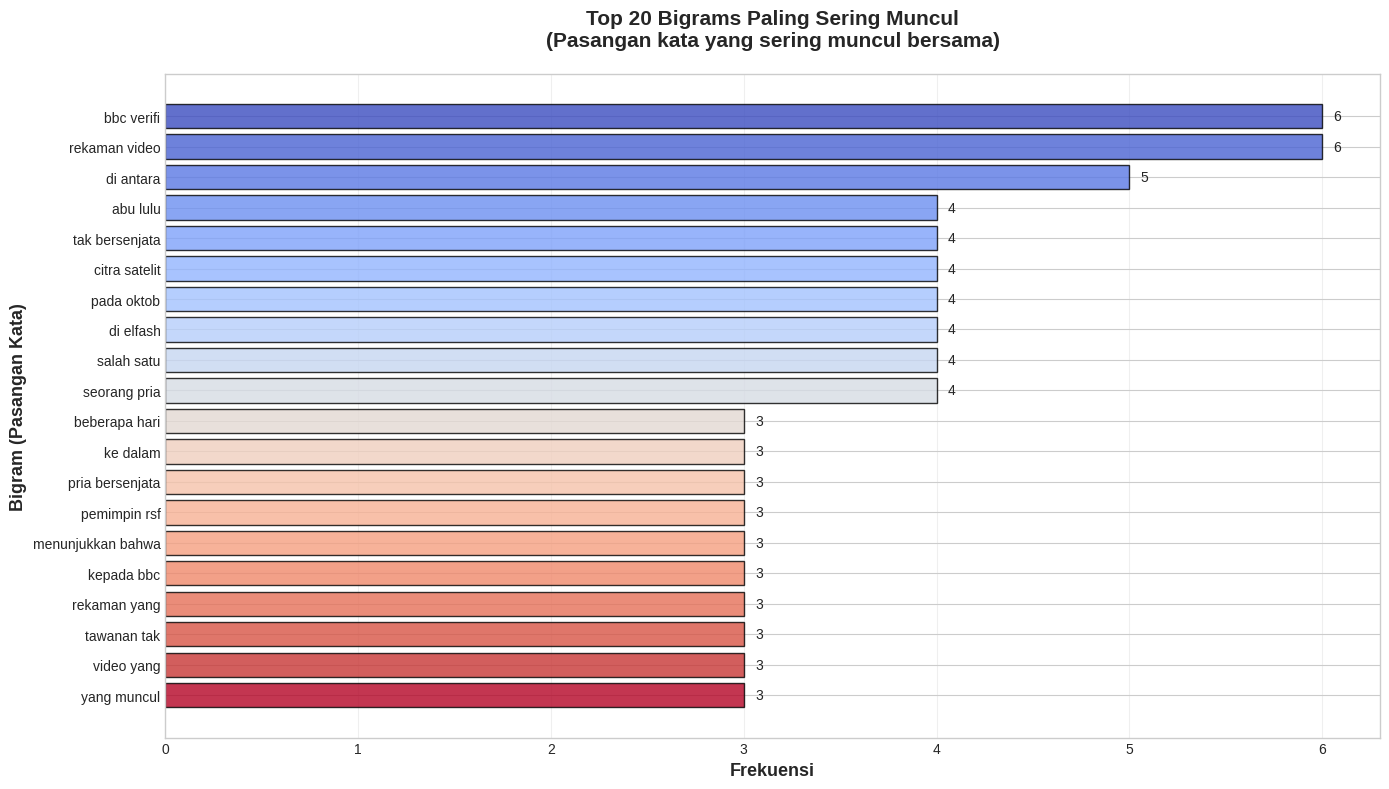

✓ Visualisasi bigrams berhasil dibuat!


In [49]:
# Ekstrak bigrams dari teks preprocessed
print("⏳ Mengekstrak bigrams dari teks preprocessed...\n")

# Gunakan CountVectorizer untuk ekstrak bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=20)
bigram_matrix = bigram_vectorizer.fit_transform(df_full['text_preprocessed'])

# Hitung total frekuensi setiap bigram
bigram_freq = bigram_matrix.sum(axis=0).A1
bigram_names = bigram_vectorizer.get_feature_names_out()

# Buat DataFrame dan sort
df_bigrams = pd.DataFrame({
    'Bigram': bigram_names,
    'Frekuensi': bigram_freq
}).sort_values('Frekuensi', ascending=False)

print("✓ Bigrams berhasil diekstrak!")
print(f"\n📊 Total unique bigrams: {len(df_bigrams)}")

# Display tabel
print("\n" + "=" * 100)
print("TOP 20 BIGRAMS (Pasangan Kata yang Sering Muncul Bersama)")
print("=" * 100)
display(df_bigrams)

print("\n💡 Interpretasi Bigrams:")
print("   - Bigrams menunjukkan pasangan kata yang sering muncul bersamaan")
print("   - Memberikan konteks lebih baik dibanding unigrams")
print("   - Membantu identifikasi frasa dan konsep penting")

# Visualisasi Top Bigrams
plt.figure(figsize=(14, 8))

bars = plt.barh(df_bigrams['Bigram'], df_bigrams['Frekuensi'],
                color=plt.cm.coolwarm(np.linspace(0, 1, len(df_bigrams))),
                edgecolor='black', alpha=0.8)

plt.xlabel('Frekuensi', fontsize=13, fontweight='bold')
plt.ylabel('Bigram (Pasangan Kata)', fontsize=13, fontweight='bold')
plt.title('Top 20 Bigrams Paling Sering Muncul\n(Pasangan kata yang sering muncul bersama)',
          fontsize=15, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Tambahkan nilai di ujung bar
for i, freq in enumerate(df_bigrams['Frekuensi']):
    plt.text(freq + max(df_bigrams['Frekuensi']) * 0.01, i,
             f'{int(freq):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Visualisasi bigrams berhasil dibuat!")

## 4.14 Top Trigrams (3-grams)

⏳ Mengekstrak trigrams dari teks preprocessed...

✓ Trigrams berhasil diekstrak!

📊 Total unique trigrams: 20

TOP 20 TRIGRAMS (Tiga Kata yang Sering Muncul Bersama)


Trigram  Frekuensi
13        tawanan tak bersenjata          3
0      citra satelit menunjukkan          2
2            gundukan pasir yang          2
1               di antara mereka          2
3            kami hanya membunuh          2
4                   ke arah pria          2
6                oleh bbc verifi          2
5                  ke dalam kota          2
8   rekaman video memperlihatkan          2
9             rekaman video yang          2
10            satu rekaman video          2
7               orang tewa dalam          2
11             sementara itu rsf          2
12            seorang saksi mata          2
14             teriak salah satu          2
15           tewa dalam serangan          2
16               tuga kami hanya          2
17               yang muncul dan          1
18              yang muncul dari          1
19        yang mungkin merupakan          1


💡 Interpretasi Trigrams:
   - Trigrams memberikan konteks yang lebih lengkap
   - Menangkap frasa dan ekspresi yang lebih kompleks
   - Berguna untuk identifikasi named entities dan key phrases


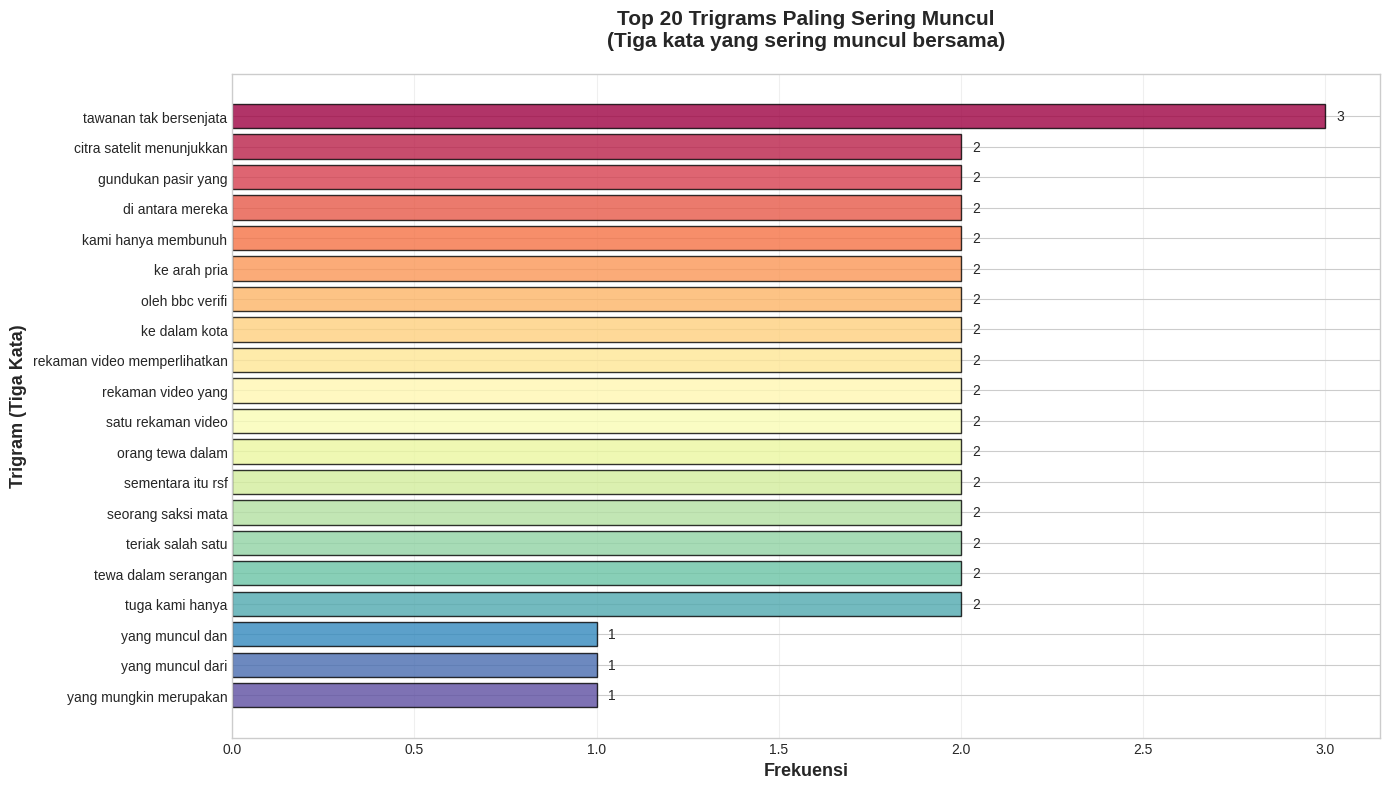

✓ Visualisasi trigrams berhasil dibuat!


In [50]:
# Ekstrak trigrams dari teks preprocessed
print("⏳ Mengekstrak trigrams dari teks preprocessed...\n")

# Gunakan CountVectorizer untuk ekstrak trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=20)
trigram_matrix = trigram_vectorizer.fit_transform(df_full['text_preprocessed'])

# Hitung total frekuensi setiap trigram
trigram_freq = trigram_matrix.sum(axis=0).A1
trigram_names = trigram_vectorizer.get_feature_names_out()

# Buat DataFrame dan sort
df_trigrams = pd.DataFrame({
    'Trigram': trigram_names,
    'Frekuensi': trigram_freq
}).sort_values('Frekuensi', ascending=False)

print("✓ Trigrams berhasil diekstrak!")
print(f"\n📊 Total unique trigrams: {len(df_trigrams)}")

# Display tabel
print("\n" + "=" * 100)
print("TOP 20 TRIGRAMS (Tiga Kata yang Sering Muncul Bersama)")
print("=" * 100)
display(df_trigrams)

print("\n💡 Interpretasi Trigrams:")
print("   - Trigrams memberikan konteks yang lebih lengkap")
print("   - Menangkap frasa dan ekspresi yang lebih kompleks")
print("   - Berguna untuk identifikasi named entities dan key phrases")

# Visualisasi Top Trigrams
plt.figure(figsize=(14, 8))

bars = plt.barh(df_trigrams['Trigram'], df_trigrams['Frekuensi'],
                color=plt.cm.Spectral(np.linspace(0, 1, len(df_trigrams))),
                edgecolor='black', alpha=0.8)

plt.xlabel('Frekuensi', fontsize=13, fontweight='bold')
plt.ylabel('Trigram (Tiga Kata)', fontsize=13, fontweight='bold')
plt.title('Top 20 Trigrams Paling Sering Muncul\n(Tiga kata yang sering muncul bersama)',
          fontsize=15, fontweight='bold', pad=20)
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')

# Tambahkan nilai di ujung bar
for i, freq in enumerate(df_trigrams['Frekuensi']):
    plt.text(freq + max(df_trigrams['Frekuensi']) * 0.01, i,
             f'{int(freq):,}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Visualisasi trigrams berhasil dibuat!")

## 4.15 Perbandingan N-grams (Unigrams vs Bigrams vs Trigrams)

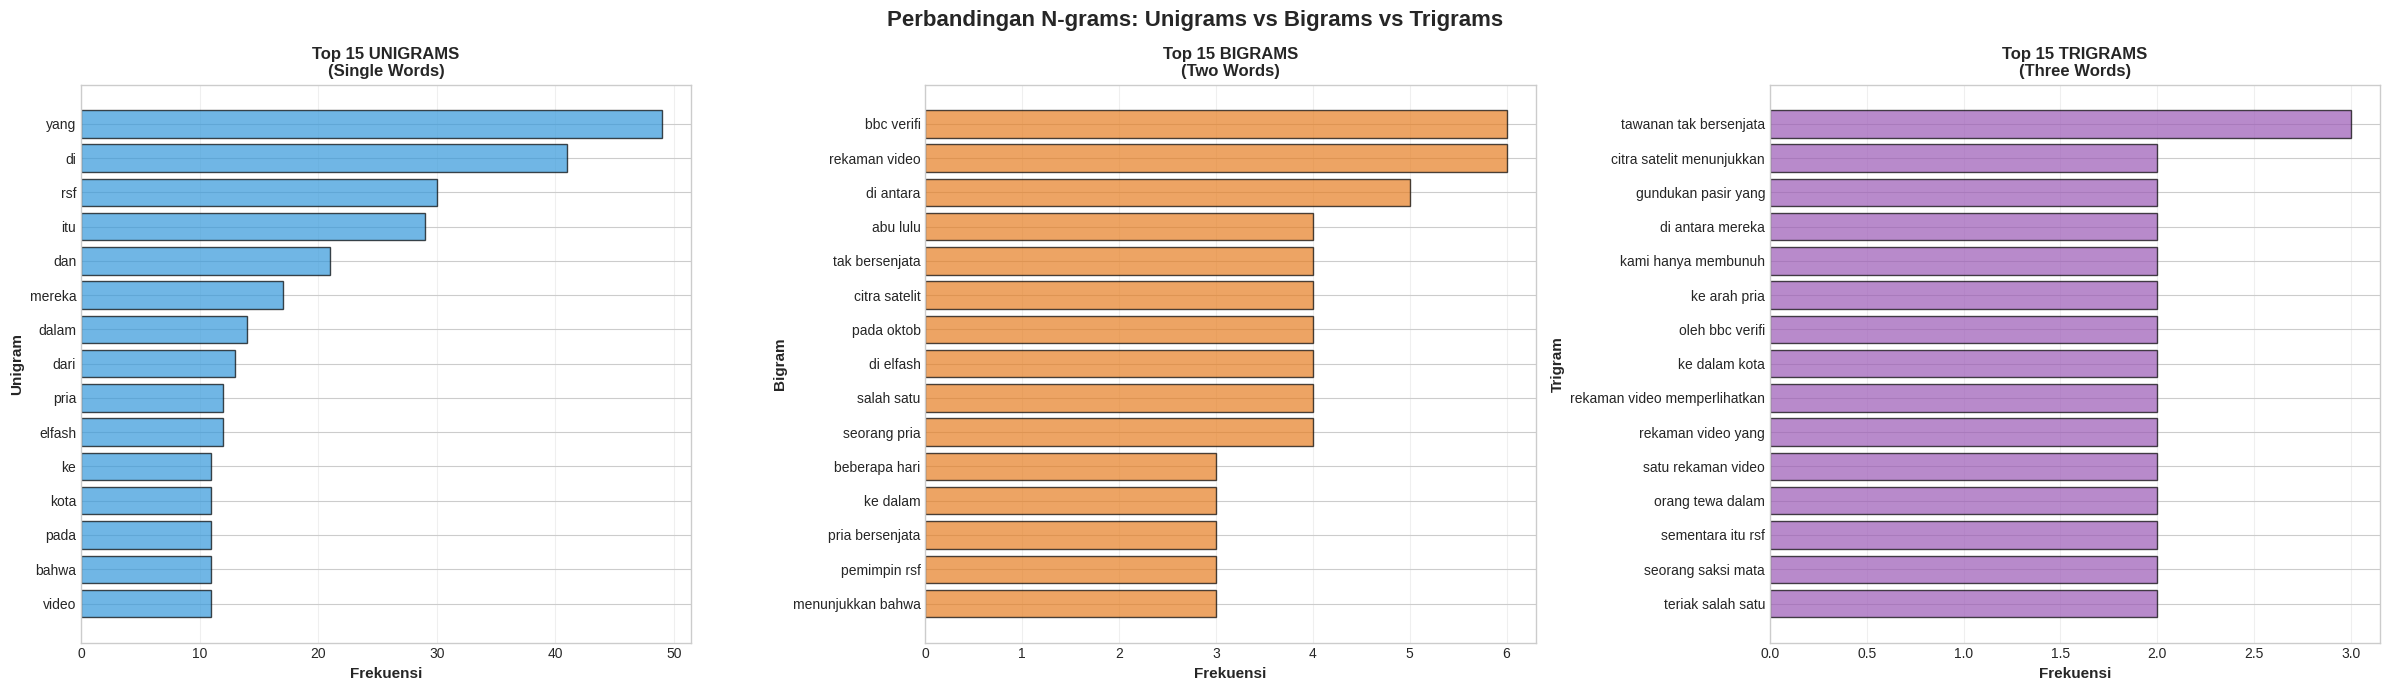


✓ Perbandingan N-grams berhasil dibuat!

💡 Insights dari N-grams:
   - Unigrams: Kata individual yang paling sering muncul
   - Bigrams: Pasangan kata yang memberikan konteks lebih baik
   - Trigrams: Frasa lengkap yang menangkap makna kompleks
   - Semakin tinggi N, semakin spesifik dan kontekstual informasinya


In [51]:
# Buat visualisasi perbandingan
fig, axes = plt.subplots(1, 3, figsize=(24, 7))
fig.suptitle('Perbandingan N-grams: Unigrams vs Bigrams vs Trigrams',
             fontsize=16, fontweight='bold')

# Top 15 untuk masing-masing
n_top = 15

# Unigrams
axes[0].barh(df_top20_preprocessed['Token'][:n_top],
             df_top20_preprocessed['Frekuensi'][:n_top],
             color='#3498DB', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Frekuensi', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Unigram', fontsize=11, fontweight='bold')
axes[0].set_title('Top 15 UNIGRAMS\n(Single Words)', fontweight='bold', fontsize=12)
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Bigrams
axes[1].barh(df_bigrams['Bigram'][:n_top],
             df_bigrams['Frekuensi'][:n_top],
             color='#E67E22', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Frekuensi', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Bigram', fontsize=11, fontweight='bold')
axes[1].set_title('Top 15 BIGRAMS\n(Two Words)', fontweight='bold', fontsize=12)
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

# Trigrams
axes[2].barh(df_trigrams['Trigram'][:n_top],
             df_trigrams['Frekuensi'][:n_top],
             color='#9B59B6', edgecolor='black', alpha=0.7)
axes[2].set_xlabel('Frekuensi', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Trigram', fontsize=11, fontweight='bold')
axes[2].set_title('Top 15 TRIGRAMS\n(Three Words)', fontweight='bold', fontsize=12)
axes[2].invert_yaxis()
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n✓ Perbandingan N-grams berhasil dibuat!")
print("\n💡 Insights dari N-grams:")
print("   - Unigrams: Kata individual yang paling sering muncul")
print("   - Bigrams: Pasangan kata yang memberikan konteks lebih baik")
print("   - Trigrams: Frasa lengkap yang menangkap makna kompleks")
print("   - Semakin tinggi N, semakin spesifik dan kontekstual informasinya")

# Tahap 5: Klasifikasi Teks

## Tujuan Tahap Ini:

Pada tahap klasifikasi teks, kita akan:

1. **Mempersiapkan data** untuk klasifikasi (train-test split)
2. **Melatih classifier** menggunakan berbagai algoritma:
   - Naive Bayes
   - Support Vector Machine (SVM)
   - Logistic Regression
3. **Evaluasi model** pada data testing dengan metrik:
   - Accuracy
   - Precision
   - Recall
   - F1-Score
4. **Visualisasi hasil** dan perbandingan performa model
5. **Analisis confusion matrix** untuk setiap classifier

## Catatan Penting:

**Label untuk Klasifikasi:**
- Jika dataset Anda sudah memiliki label/kategori, kita akan menggunakan label tersebut
- Jika dataset belum memiliki label, kita akan membuat label otomatis menggunakan clustering (K-Means)
- Dalam kasus ini, kita akan mendemonstrasikan kedua skenario

## 5.1 Import Library

In [52]:
# Import library dasar
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings('ignore')

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import library untuk machine learning
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# Import classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression

# Import untuk evaluation
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix,
    roc_curve, auc, roc_auc_score
)

# Import untuk clustering (jika perlu membuat label)
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD

# Konfigurasi visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline

# Set random seed untuk reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✓ Semua library berhasil diimport!")

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

print("✓ Google Drive terhubung!")

✓ Semua library berhasil diimport!
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✓ Google Drive terhubung!


## 5.2 Load Dataset dan TF-IDF Features

In [53]:
# Load dataset
print("⏳ Loading dataset...\n")

df = pd.read_pickle('/content/drive/MyDrive/UTS/sudan_tokens.pkl')

print("✓ Dataset berhasil dimuat!")
print(f"\n📊 Dimensi dataset: {df.shape[0]} baris × {df.shape[1]} kolom")
print(f"\n📋 Kolom yang tersedia: {list(df.columns)}")

# Preview dataset
print("\n" + "=" * 100)
print("Preview Dataset")
print("=" * 100)
display(df[['text', 'text_preprocessed', 'word_count', 'token_count']].head())

# Load TF-IDF features dari Tahap 3
print("⏳ Loading TF-IDF features...\n")

with open('/content/drive/MyDrive/UTS/tfidf_features.pkl', 'rb') as f:
    tfidf_data = pickle.load(f)
    tfidf_matrix = tfidf_data['matrix']
    tfidf_vectorizer = tfidf_data['vectorizer']
    feature_names = tfidf_data['feature_names']

print("✓ TF-IDF features berhasil dimuat!")
print(f"\n📊 Dimensi TF-IDF Matrix: {tfidf_matrix.shape}")
print(f"   - {tfidf_matrix.shape[0]} dokumen")
print(f"   - {tfidf_matrix.shape[1]} features")

⏳ Loading dataset...

✓ Dataset berhasil dimuat!

📊 Dimensi dataset: 69 baris × 7 kolom

📋 Kolom yang tersedia: ['text', 'char_count', 'word_count', 'sentence_count', 'text_preprocessed', 'tokens', 'token_count']

Preview Dataset


text  \
0  Aksi Milisi Di Sudan Yang Melancarkan Pembanta...   
1                        'Tugas Kami Hanya Membunuh'   
2  Sejumlah Pria Tertawa Lepas Saat Mobil Pikap Y...   
3  "Lihat semua ini. Lihat genosida ini," teriak ...   
4  Ia mengarahkan kamera ke wajahnya dan rekan-re...   

                                   text_preprocessed  word_count  token_count  
0  aksi milisi di sudan yang melancarkan pembanta...           9            8  
1                           tuga kami hanya membunuh           4            4  
2  sejumlah pria tertawa lepa saat mobil pikap ya...          21           21  
3  lihat semua ini lihat genosida ini teriak sala...          13           13  
4  ia mengarahkan kamera ke wajahnya dan rekanrek...          18           18

⏳ Loading TF-IDF features...

✓ TF-IDF features berhasil dimuat!

📊 Dimensi TF-IDF Matrix: (69, 277)
   - 69 dokumen
   - 277 features


## 5.3 Persiapan Label untuk Klasifikasi

### Skenario 1: Jika Dataset Sudah Memiliki Label

Jika dataset Anda sudah memiliki kolom label/kategori, gunakan kode berikut:

```python
# Misalnya kolom label bernama 'category'
y = df['category']
```

### Skenario 2: Membuat Label Otomatis dengan Clustering

Jika dataset belum memiliki label, kita akan membuat label otomatis menggunakan K-Means clustering berdasarkan TF-IDF features.

In [54]:
# Cek apakah ada kolom label/category dalam dataset
print("=" * 100)
print("CEK KETERSEDIAAN LABEL")
print("=" * 100)

# Daftar nama kolom yang mungkin berisi label
possible_label_columns = ['label', 'category', 'class', 'type', 'sentiment', 'topic']

label_column = None
for col in possible_label_columns:
    if col in df.columns:
        label_column = col
        break

if label_column:
    print(f"\n✓ Ditemukan kolom label: '{label_column}'")
    y = df[label_column]
    print(f"\n📊 Distribusi Label:")
    print(y.value_counts())
    use_clustering = False
else:
    print("\n⚠️ Dataset tidak memiliki kolom label.")
    print("\n📌 Solusi: Kita akan membuat label otomatis menggunakan K-Means clustering")
    print("   Ini adalah pendekatan semi-supervised learning.")
    use_clustering = True

CEK KETERSEDIAAN LABEL

⚠️ Dataset tidak memiliki kolom label.

📌 Solusi: Kita akan membuat label otomatis menggunakan K-Means clustering
   Ini adalah pendekatan semi-supervised learning.


### Membuat Label dengan K-Means Clustering

In [55]:
if use_clustering:
    print("=" * 100)
    print("MEMBUAT LABEL OTOMATIS DENGAN K-MEANS CLUSTERING")
    print("=" * 100)

    # Tentukan jumlah cluster (kategori)
    # Anda bisa mengubah ini sesuai kebutuhan
    n_clusters = 3  # Misalnya: 3 kategori (Low, Medium, High relevance)

    print(f"\n⚙️ Parameter: {n_clusters} clusters\n")
    print("⏳ Melakukan clustering...")

    # Reduksi dimensi dengan SVD untuk clustering yang lebih baik
    svd = TruncatedSVD(n_components=50, random_state=RANDOM_STATE)
    tfidf_reduced = svd.fit_transform(tfidf_matrix)

    print(f"✓ Dimensi direduksi: {tfidf_matrix.shape[1]} → {tfidf_reduced.shape[1]}")

    # Terapkan K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans.fit_predict(tfidf_reduced)

    # Buat label kategori
    y = pd.Series(cluster_labels, name='cluster_label')

    print(f"\n✓ Clustering selesai!")
    print(f"\n📊 Distribusi Cluster (Label):")
    print(y.value_counts().sort_index())

    # Tambahkan ke dataframe
    df['cluster_label'] = cluster_labels

    # Beri nama untuk setiap cluster
    cluster_names = {i: f"Category_{i}" for i in range(n_clusters)}
    print(f"\n📝 Nama Cluster:")
    for i, name in cluster_names.items():
        print(f"   Cluster {i}: {name}")

    print("\n💡 Catatan:")
    print("   - Label dibuat otomatis berdasarkan similarity dokumen")
    print("   - Dokumen dengan konten serupa berada di cluster yang sama")
    print("   - Ini adalah pendekatan untuk demonstrasi klasifikasi")
else:
    print("\n✓ Menggunakan label yang sudah ada dalam dataset.")

MEMBUAT LABEL OTOMATIS DENGAN K-MEANS CLUSTERING

⚙️ Parameter: 3 clusters

⏳ Melakukan clustering...
✓ Dimensi direduksi: 277 → 50

✓ Clustering selesai!

📊 Distribusi Cluster (Label):
cluster_label
0    17
1    28
2    24
Name: count, dtype: int64

📝 Nama Cluster:
   Cluster 0: Category_0
   Cluster 1: Category_1
   Cluster 2: Category_2

💡 Catatan:
   - Label dibuat otomatis berdasarkan similarity dokumen
   - Dokumen dengan konten serupa berada di cluster yang sama
   - Ini adalah pendekatan untuk demonstrasi klasifikasi


## 5.4 Split Data: Training dan Testing Set

Kita akan membagi data menjadi:
- **Training set (80%)**: Untuk melatih model
- **Testing set (20%)**: Untuk menguji performa model

In [56]:
print("=" * 100)
print("SPLIT DATA: TRAINING DAN TESTING SET")
print("=" * 100)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix,
    y,
    test_size=0.2,        # 20% untuk testing
    random_state=RANDOM_STATE,
    stratify=y            # Stratified split untuk balanced distribution
)

print(f"\n✓ Data berhasil di-split!\n")
print(f"📊 Training Set:")
print(f"   - Jumlah dokumen: {X_train.shape[0]}")
print(f"   - Jumlah features: {X_train.shape[1]}")
print(f"   - Persentase: {(X_train.shape[0] / len(df)) * 100:.1f}%")

print(f"\n📊 Testing Set:")
print(f"   - Jumlah dokumen: {X_test.shape[0]}")
print(f"   - Jumlah features: {X_test.shape[1]}")
print(f"   - Persentase: {(X_test.shape[0] / len(df)) * 100:.1f}%")

# Distribusi label di training dan testing set
print(f"\n📈 Distribusi Label di Training Set:")
print(pd.Series(y_train).value_counts().sort_index())

print(f"\n📈 Distribusi Label di Testing Set:")
print(pd.Series(y_test).value_counts().sort_index())

print("\n💡 Stratified split memastikan distribusi label yang seimbang di kedua set.")

SPLIT DATA: TRAINING DAN TESTING SET

✓ Data berhasil di-split!

📊 Training Set:
   - Jumlah dokumen: 55
   - Jumlah features: 277
   - Persentase: 79.7%

📊 Testing Set:
   - Jumlah dokumen: 14
   - Jumlah features: 277
   - Persentase: 20.3%

📈 Distribusi Label di Training Set:
cluster_label
0    14
1    22
2    19
Name: count, dtype: int64

📈 Distribusi Label di Testing Set:
cluster_label
0    3
1    6
2    5
Name: count, dtype: int64

💡 Stratified split memastikan distribusi label yang seimbang di kedua set.


# PART 1: NAIVE BAYES CLASSIFIER

## Konsep Naive Bayes:

**Naive Bayes** adalah algoritma klasifikasi probabilistik berdasarkan **Teorema Bayes** dengan asumsi "naive" bahwa semua fitur independen satu sama lain.

### Teorema Bayes:
$$P(C|X) = \frac{P(X|C) \cdot P(C)}{P(X)}$$

Dimana:
- $P(C|X)$ = Probabilitas kelas C given fitur X (posterior)
- $P(X|C)$ = Probabilitas fitur X given kelas C (likelihood)
- $P(C)$ = Probabilitas kelas C (prior)
- $P(X)$ = Probabilitas fitur X (evidence)

### Keunggulan:
✅ Cepat dan efisien

✅ Bekerja baik dengan high-dimensional data

✅ Tidak memerlukan banyak training data

✅ Bagus untuk text classification

### Kelemahan:
❌ Asumsi independensi yang naive (jarang terpenuhi di real-world)

❌ Sensitif terhadap feature correlation

### Varian untuk Text Classification:
**Multinomial Naive Bayes** - Cocok untuk discrete features (word counts, TF-IDF)

## 5.5 Training Naive Bayes Classifier

In [57]:
print("=" * 100)
print("TRAINING NAIVE BAYES CLASSIFIER")
print("=" * 100)

print("\n⏳ Training Multinomial Naive Bayes model...\n")

# Inisialisasi dan train model
nb_model = MultinomialNB(alpha=1.0)  # alpha = Laplace smoothing parameter
nb_model.fit(X_train, y_train)

print("✓ Training selesai!\n")

# Prediksi pada training set (untuk cek overfitting)
y_train_pred_nb = nb_model.predict(X_train)
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)

# Prediksi pada testing set
y_test_pred_nb = nb_model.predict(X_test)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print(f"📊 Accuracy on Training Set: {train_accuracy_nb:.4f} ({train_accuracy_nb*100:.2f}%)")
print(f"📊 Accuracy on Testing Set: {test_accuracy_nb:.4f} ({test_accuracy_nb*100:.2f}%)")

# Hitung metrics lainnya
precision_nb = precision_score(y_test, y_test_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_test_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_test_pred_nb, average='weighted')

print(f"\n📈 Evaluation Metrics (Testing Set):")
print(f"   - Precision: {precision_nb:.4f}")
print(f"   - Recall: {recall_nb:.4f}")
print(f"   - F1-Score: {f1_nb:.4f}")

TRAINING NAIVE BAYES CLASSIFIER

⏳ Training Multinomial Naive Bayes model...

✓ Training selesai!

📊 Accuracy on Training Set: 1.0000 (100.00%)
📊 Accuracy on Testing Set: 0.6429 (64.29%)

📈 Evaluation Metrics (Testing Set):
   - Precision: 0.6973
   - Recall: 0.6429
   - F1-Score: 0.6306


## 5.6 Detailed Classification Report (Naive Bayes)

In [58]:
print("=" * 100)
print("CLASSIFICATION REPORT - NAIVE BAYES")
print("=" * 100)

print("\n" + classification_report(y_test, y_test_pred_nb))

print("\n💡 Penjelasan Metrics:")
print("   - Precision: Dari semua prediksi positif, berapa yang benar?")
print("   - Recall: Dari semua data positif aktual, berapa yang berhasil diprediksi?")
print("   - F1-Score: Harmonic mean dari precision dan recall")
print("   - Support: Jumlah sample aktual untuk setiap kelas")

CLASSIFICATION REPORT - NAIVE BAYES

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.57      0.67      0.62         6
           2       0.67      0.80      0.73         5

    accuracy                           0.64        14
   macro avg       0.75      0.60      0.61        14
weighted avg       0.70      0.64      0.63        14


💡 Penjelasan Metrics:
   - Precision: Dari semua prediksi positif, berapa yang benar?
   - Recall: Dari semua data positif aktual, berapa yang berhasil diprediksi?
   - F1-Score: Harmonic mean dari precision dan recall
   - Support: Jumlah sample aktual untuk setiap kelas


## 5.7 Confusion Matrix (Naive Bayes)

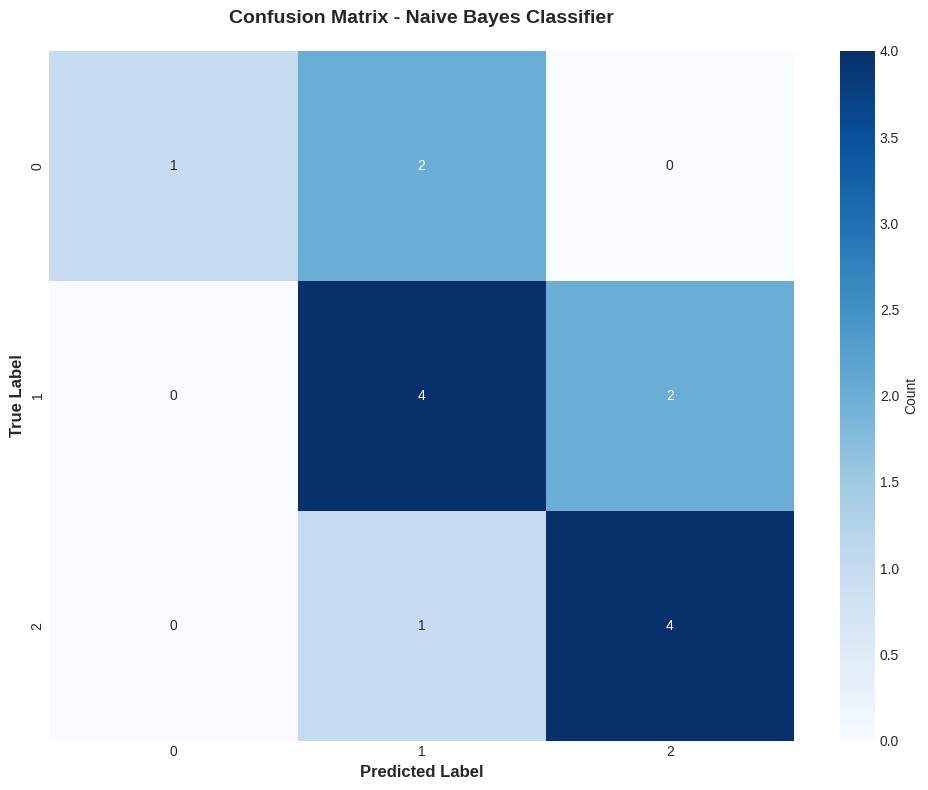


✓ Confusion matrix berhasil dibuat!

💡 Interpretasi Confusion Matrix:
   - Diagonal: Prediksi yang benar
   - Off-diagonal: Prediksi yang salah (misclassifications)
   - Warna lebih gelap = nilai lebih tinggi


In [59]:
# Hitung confusion matrix
cm_nb = confusion_matrix(y_test, y_test_pred_nb)

# Visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Naive Bayes Classifier', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Confusion matrix berhasil dibuat!")
print("\n💡 Interpretasi Confusion Matrix:")
print("   - Diagonal: Prediksi yang benar")
print("   - Off-diagonal: Prediksi yang salah (misclassifications)")
print("   - Warna lebih gelap = nilai lebih tinggi")

---

# PART 2: SUPPORT VECTOR MACHINE (SVM)

---

## Konsep SVM:

**Support Vector Machine (SVM)** adalah algoritma supervised learning yang mencari hyperplane optimal untuk memisahkan data dari berbagai kelas.

### Prinsip Dasar:
- Mencari **decision boundary** yang memaksimalkan margin antara kelas
- Menggunakan **support vectors** (data points terdekat ke boundary)
- Dapat menggunakan **kernel trick** untuk non-linear separation

### Keunggulan:
✅ Efektif untuk high-dimensional data

✅ Memory efficient (hanya menyimpan support vectors)

✅ Versatile (berbagai kernel functions)

✅ Robust terhadap overfitting (terutama di high-dimensional space)

### Kelemahan:
❌ Training lambat untuk large datasets

❌ Sensitif terhadap parameter tuning

❌ Tidak memberikan probabilitas estimates langsung

### Varian:
- **LinearSVC**: Untuk linear separation (lebih cepat)
- **SVC dengan RBF kernel**: Untuk non-linear separation

## 5.8 Training SVM Classifier

In [60]:
print("=" * 100)
print("TRAINING SUPPORT VECTOR MACHINE (SVM) CLASSIFIER")
print("=" * 100)

print("\n⏳ Training Linear SVM model...\n")

# Inisialisasi dan train model
# LinearSVC lebih cepat untuk text classification
svm_model = LinearSVC(C=1.0, max_iter=1000, random_state=RANDOM_STATE)
svm_model.fit(X_train, y_train)

print("✓ Training selesai!\n")

# Prediksi pada training set
y_train_pred_svm = svm_model.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

# Prediksi pada testing set
y_test_pred_svm = svm_model.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_test_pred_svm)

print(f"📊 Accuracy on Training Set: {train_accuracy_svm:.4f} ({train_accuracy_svm*100:.2f}%)")
print(f"📊 Accuracy on Testing Set: {test_accuracy_svm:.4f} ({test_accuracy_svm*100:.2f}%)")

# Hitung metrics lainnya
precision_svm = precision_score(y_test, y_test_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_test_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_test_pred_svm, average='weighted')

print(f"\n📈 Evaluation Metrics (Testing Set):")
print(f"   - Precision: {precision_svm:.4f}")
print(f"   - Recall: {recall_svm:.4f}")
print(f"   - F1-Score: {f1_svm:.4f}")

TRAINING SUPPORT VECTOR MACHINE (SVM) CLASSIFIER

⏳ Training Linear SVM model...

✓ Training selesai!

📊 Accuracy on Training Set: 1.0000 (100.00%)
📊 Accuracy on Testing Set: 0.6429 (64.29%)

📈 Evaluation Metrics (Testing Set):
   - Precision: 0.6310
   - Recall: 0.6429
   - F1-Score: 0.6312


## 5.9 Detailed Classification Report (SVM)

In [61]:
print("=" * 100)
print("CLASSIFICATION REPORT - SVM")
print("=" * 100)

print("\n" + classification_report(y_test, y_test_pred_svm))

CLASSIFICATION REPORT - SVM

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.67      0.67      0.67         6
           2       0.67      0.80      0.73         5

    accuracy                           0.64        14
   macro avg       0.61      0.60      0.60        14
weighted avg       0.63      0.64      0.63        14



## 5.10 Confusion Matrix (SVM)

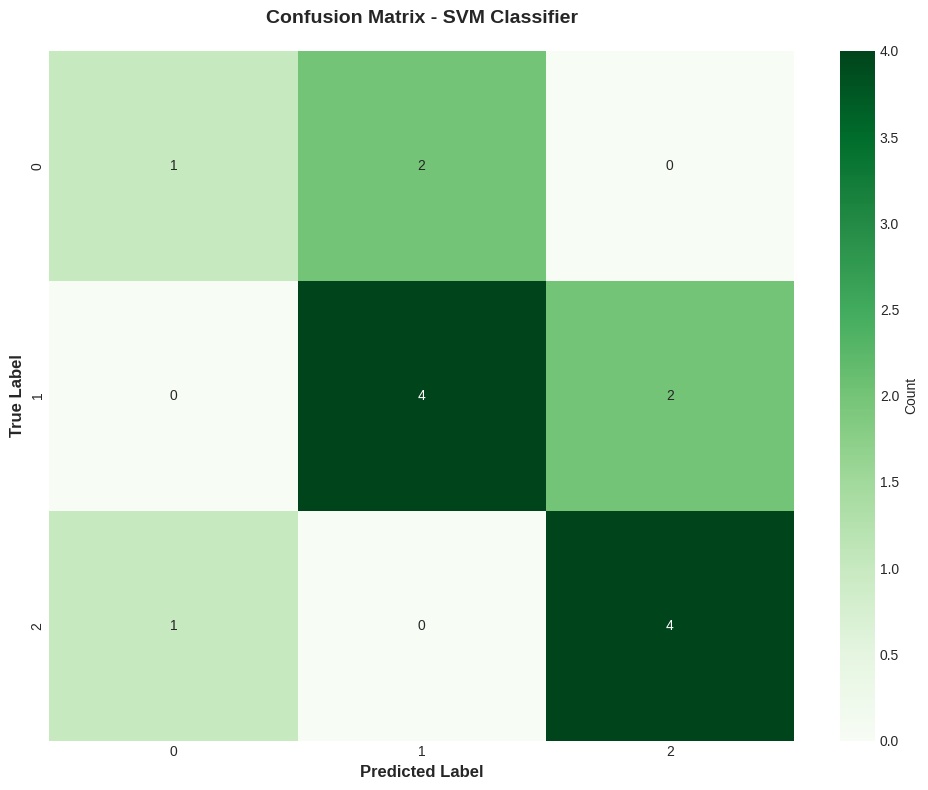


✓ Confusion matrix berhasil dibuat!


In [62]:
# Hitung confusion matrix
cm_svm = confusion_matrix(y_test, y_test_pred_svm)

# Visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y), yticklabels=np.unique(y),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - SVM Classifier', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Confusion matrix berhasil dibuat!")

---

# PART 3: LOGISTIC REGRESSION

---

## Konsep Logistic Regression:

**Logistic Regression** adalah algoritma klasifikasi yang menggunakan **logistic function (sigmoid)** untuk memodelkan probabilitas suatu data termasuk dalam kelas tertentu.

### Logistic (Sigmoid) Function:
$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Dimana:
- Output berkisar antara 0 dan 1 (interpretasi sebagai probabilitas)
- Threshold 0.5 untuk binary classification

### Keunggulan:
✅ Simple dan mudah diinterpretasi

✅ Memberikan probabilitas estimates

✅ Efisien untuk training

✅ Dapat diregularisasi (L1/L2) untuk mencegah overfitting

✅ Bekerja baik dengan linearly separable data

### Kelemahan:
❌ Asumsi linear relationship

❌ Sensitif terhadap outliers

❌ Kurang efektif untuk highly non-linear problems

### Regularization:
- **L1 (Lasso)**: Feature selection, sparse weights
- **L2 (Ridge)**: Prevents overfitting, smooth weights

## 5.11 Training Logistic Regression Classifier

In [63]:
print("=" * 100)
print("TRAINING LOGISTIC REGRESSION CLASSIFIER")
print("=" * 100)

print("\n⏳ Training Logistic Regression model...\n")

# Inisialisasi dan train model
lr_model = LogisticRegression(
    C=1.0,                    # Inverse of regularization strength
    max_iter=1000,
    random_state=RANDOM_STATE,
    solver='lbfgs',          # Optimization algorithm
    multi_class='auto'       # Handle multiclass automatically
)
lr_model.fit(X_train, y_train)

print("✓ Training selesai!\n")

# Prediksi pada training set
y_train_pred_lr = lr_model.predict(X_train)
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)

# Prediksi pada testing set
y_test_pred_lr = lr_model.predict(X_test)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print(f"📊 Accuracy on Training Set: {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"📊 Accuracy on Testing Set: {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")

# Hitung metrics lainnya
precision_lr = precision_score(y_test, y_test_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_test_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_test_pred_lr, average='weighted')

print(f"\n📈 Evaluation Metrics (Testing Set):")
print(f"   - Precision: {precision_lr:.4f}")
print(f"   - Recall: {recall_lr:.4f}")
print(f"   - F1-Score: {f1_lr:.4f}")

TRAINING LOGISTIC REGRESSION CLASSIFIER

⏳ Training Logistic Regression model...

✓ Training selesai!

📊 Accuracy on Training Set: 1.0000 (100.00%)
📊 Accuracy on Testing Set: 0.5714 (57.14%)

📈 Evaluation Metrics (Testing Set):
   - Precision: 0.4524
   - Recall: 0.5714
   - F1-Score: 0.5046


## 5.12 Detailed Classification Report (Logistic Regression)

In [64]:
print("=" * 100)
print("CLASSIFICATION REPORT - LOGISTIC REGRESSION")
print("=" * 100)

print("\n" + classification_report(y_test, y_test_pred_lr))

CLASSIFICATION REPORT - LOGISTIC REGRESSION

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      0.67      0.57         6
           2       0.67      0.80      0.73         5

    accuracy                           0.57        14
   macro avg       0.39      0.49      0.43        14
weighted avg       0.45      0.57      0.50        14



## 5.13 Confusion Matrix (Logistic Regression)

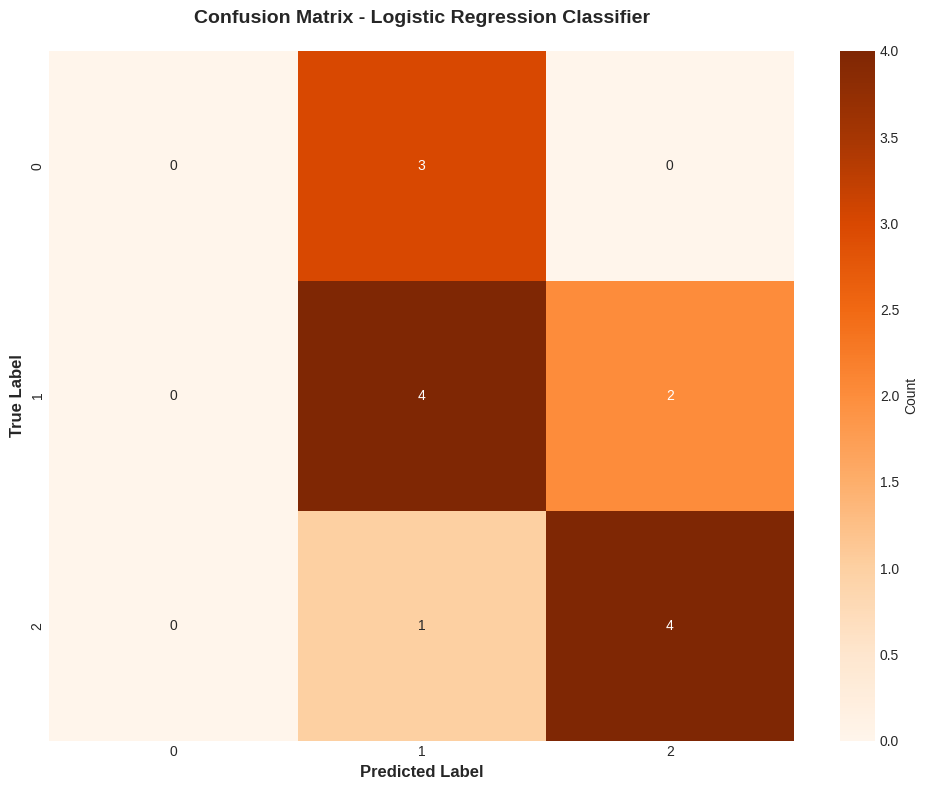


✓ Confusion matrix berhasil dibuat!


In [65]:
# Hitung confusion matrix
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

# Visualisasi
plt.figure(figsize=(10, 8))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges',
            xticklabels=np.unique(y), yticklabels=np.unique(y),
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.title('Confusion Matrix - Logistic Regression Classifier', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n✓ Confusion matrix berhasil dibuat!")

# PART 4: PERBANDINGAN MODEL

## 5.14 Tabel Perbandingan Performance

In [66]:
# Buat DataFrame perbandingan
comparison_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'SVM', 'Logistic Regression'],
    'Accuracy': [test_accuracy_nb, test_accuracy_svm, test_accuracy_lr],
    'Precision': [precision_nb, precision_svm, precision_lr],
    'Recall': [recall_nb, recall_svm, recall_lr],
    'F1-Score': [f1_nb, f1_svm, f1_lr]
})

print("=" * 100)
print("PERBANDINGAN PERFORMANCE SEMUA MODEL")
print("=" * 100)
print("\n")

# Format dengan 4 decimal places
display(comparison_df.style.format({
    'Accuracy': '{:.4f}',
    'Precision': '{:.4f}',
    'Recall': '{:.4f}',
    'F1-Score': '{:.4f}'
}).background_gradient(subset=['Accuracy', 'Precision', 'Recall', 'F1-Score'], cmap='RdYlGn'))

# Identifikasi model terbaik
best_model_idx = comparison_df['F1-Score'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_f1_score = comparison_df.loc[best_model_idx, 'F1-Score']

print(f"\n\n🏆 MODEL TERBAIK: {best_model_name}")
print(f"   F1-Score: {best_f1_score:.4f}")

PERBANDINGAN PERFORMANCE SEMUA MODEL






🏆 MODEL TERBAIK: SVM
   F1-Score: 0.6312


## 5.15 Visualisasi Perbandingan Metrics

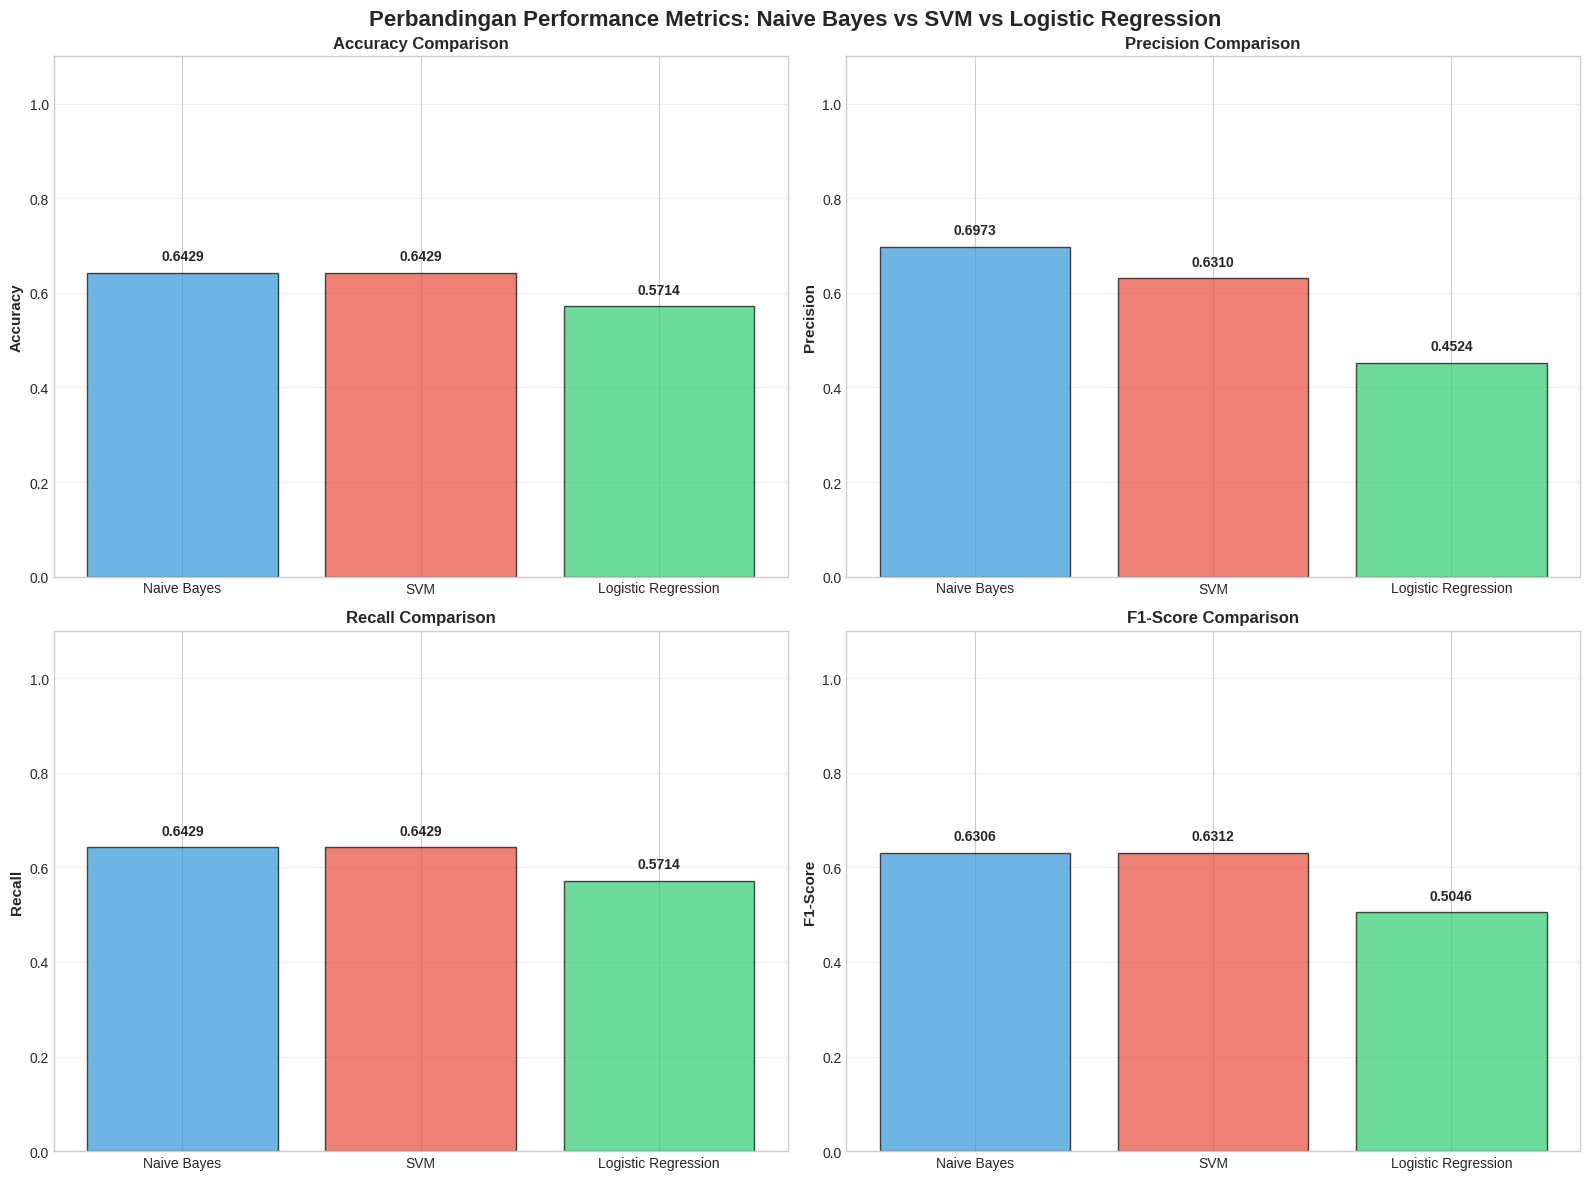


✓ Visualisasi perbandingan berhasil dibuat!


In [67]:
# Visualisasi bar chart
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Perbandingan Performance Metrics: Naive Bayes vs SVM vs Logistic Regression',
             fontsize=16, fontweight='bold')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498DB', '#E74C3C', '#2ECC71']
model_names = comparison_df['Model'].tolist()

for idx, metric in enumerate(metrics):
    row = idx // 2
    col = idx % 2

    values = comparison_df[metric].tolist()
    bars = axes[row, col].bar(model_names, values, color=colors, alpha=0.7, edgecolor='black')

    axes[row, col].set_ylabel(metric, fontsize=11, fontweight='bold')
    axes[row, col].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylim([0, 1.1])
    axes[row, col].grid(True, alpha=0.3, axis='y')

    # Tambahkan nilai di atas bar
    for i, (bar, value) in enumerate(zip(bars, values)):
        height = bar.get_height()
        axes[row, col].text(bar.get_x() + bar.get_width()/2., height + 0.02,
                            f'{value:.4f}',
                            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Visualisasi perbandingan berhasil dibuat!")

## 5.16 Grouped Bar Chart

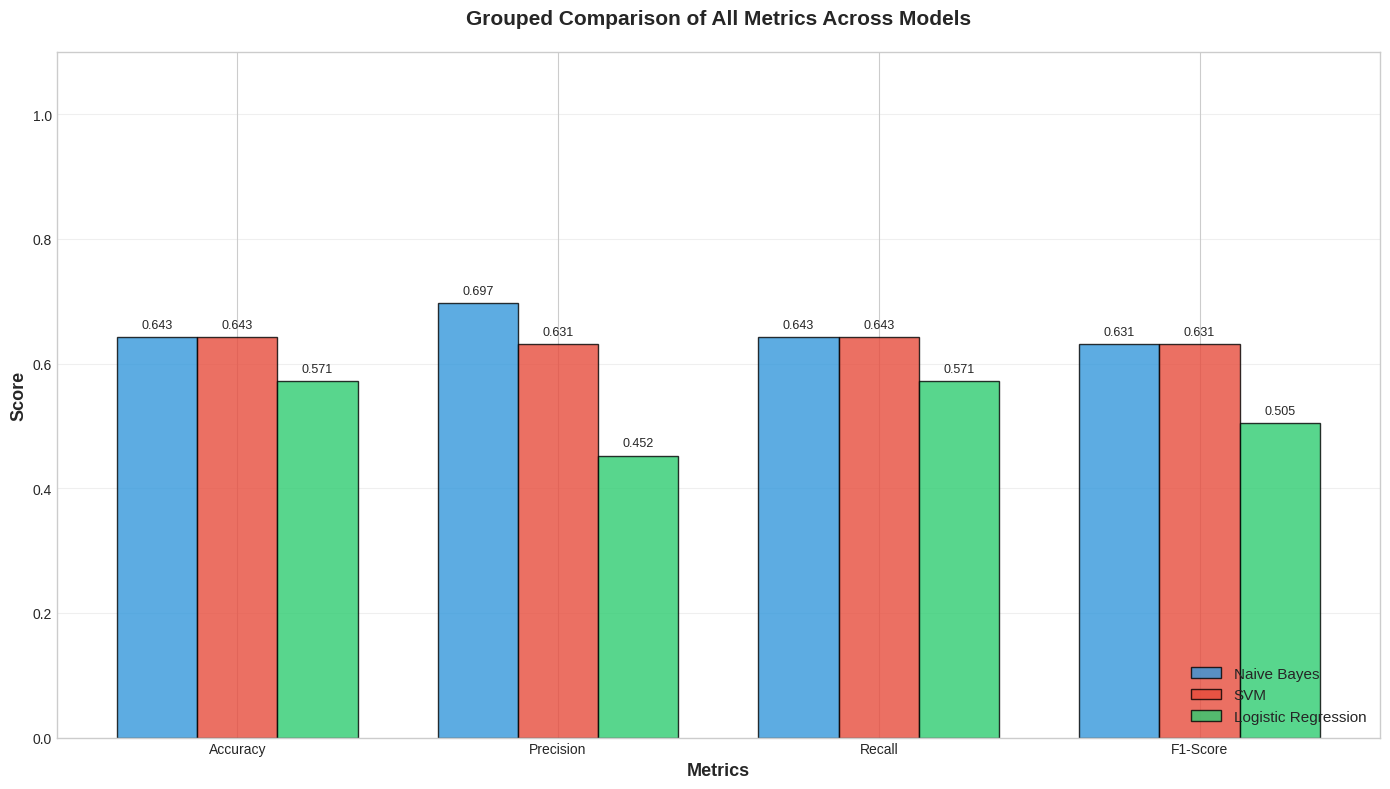


✓ Grouped bar chart berhasil dibuat!


In [68]:
# Grouped bar chart untuk semua metrics
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(metrics))
width = 0.25

# Data untuk setiap model
nb_values = [test_accuracy_nb, precision_nb, recall_nb, f1_nb]
svm_values = [test_accuracy_svm, precision_svm, recall_svm, f1_svm]
lr_values = [test_accuracy_lr, precision_lr, recall_lr, f1_lr]

# Buat bars
bars1 = ax.bar(x - width, nb_values, width, label='Naive Bayes', color='#3498DB', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x, svm_values, width, label='SVM', color='#E74C3C', alpha=0.8, edgecolor='black')
bars3 = ax.bar(x + width, lr_values, width, label='Logistic Regression', color='#2ECC71', alpha=0.8, edgecolor='black')

# Konfigurasi
ax.set_xlabel('Metrics', fontsize=13, fontweight='bold')
ax.set_ylabel('Score', fontsize=13, fontweight='bold')
ax.set_title('Grouped Comparison of All Metrics Across Models', fontsize=15, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim([0, 1.1])
ax.grid(True, alpha=0.3, axis='y')

# Tambahkan nilai di atas bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print("\n✓ Grouped bar chart berhasil dibuat!")

## 5.17 Confusion Matrices: Side-by-Side Comparison

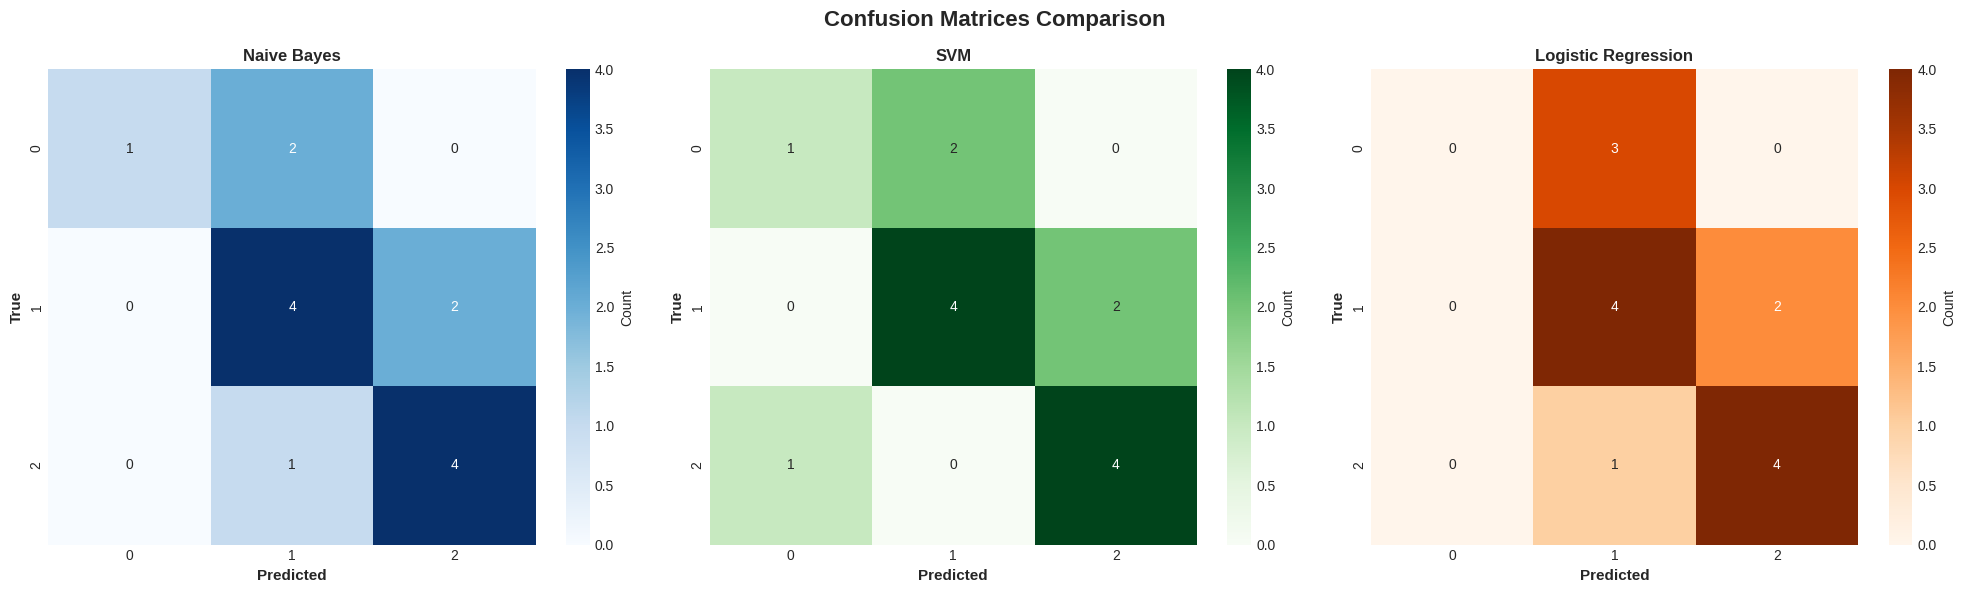


✓ Perbandingan confusion matrices berhasil dibuat!


In [69]:
# Perbandingan confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Confusion Matrices Comparison', fontsize=16, fontweight='bold')

# Naive Bayes
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=np.unique(y), yticklabels=np.unique(y),
            cbar_kws={'label': 'Count'})
axes[0].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[0].set_ylabel('True', fontsize=11, fontweight='bold')
axes[0].set_title('Naive Bayes', fontsize=12, fontweight='bold')

# SVM
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=np.unique(y), yticklabels=np.unique(y),
            cbar_kws={'label': 'Count'})
axes[1].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[1].set_ylabel('True', fontsize=11, fontweight='bold')
axes[1].set_title('SVM', fontsize=12, fontweight='bold')

# Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Oranges', ax=axes[2],
            xticklabels=np.unique(y), yticklabels=np.unique(y),
            cbar_kws={'label': 'Count'})
axes[2].set_xlabel('Predicted', fontsize=11, fontweight='bold')
axes[2].set_ylabel('True', fontsize=11, fontweight='bold')
axes[2].set_title('Logistic Regression', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✓ Perbandingan confusion matrices berhasil dibuat!")

## 5.18 Radar Chart (Spider Plot) Comparison

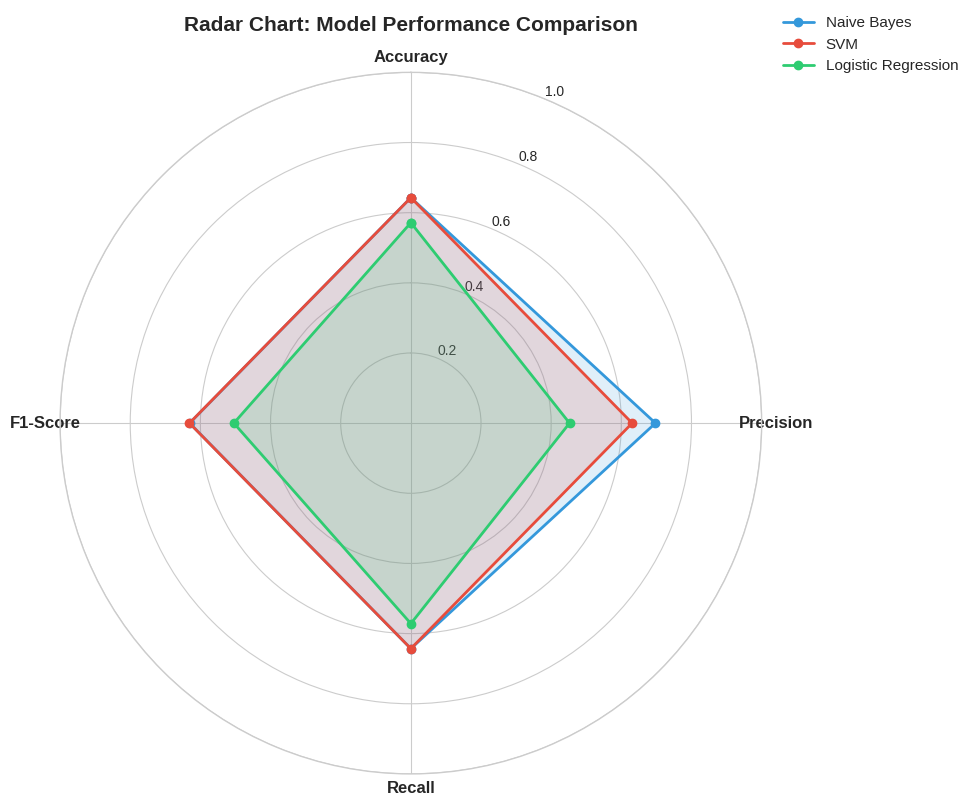


✓ Radar chart berhasil dibuat!

💡 Interpretasi Radar Chart:
   - Semakin luas area, semakin baik performa model
   - Bentuk yang lebih seimbang menunjukkan performa konsisten di semua metrics


In [70]:
# Radar chart untuk perbandingan visual
from math import pi

# Data
categories = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
N = len(categories)

# Compute angle for each axis
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize plot
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

# Plot data untuk setiap model
nb_values_radar = nb_values + nb_values[:1]
svm_values_radar = svm_values + svm_values[:1]
lr_values_radar = lr_values + lr_values[:1]

ax.plot(angles, nb_values_radar, 'o-', linewidth=2, label='Naive Bayes', color='#3498DB')
ax.fill(angles, nb_values_radar, alpha=0.15, color='#3498DB')

ax.plot(angles, svm_values_radar, 'o-', linewidth=2, label='SVM', color='#E74C3C')
ax.fill(angles, svm_values_radar, alpha=0.15, color='#E74C3C')

ax.plot(angles, lr_values_radar, 'o-', linewidth=2, label='Logistic Regression', color='#2ECC71')
ax.fill(angles, lr_values_radar, alpha=0.15, color='#2ECC71')

# Fix axis to go in the right order and start at 12 o'clock
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12, fontweight='bold')

# Set y-axis limits and labels
ax.set_ylim(0, 1)
ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_yticklabels(['0.2', '0.4', '0.6', '0.8', '1.0'], size=10)

# Add legend and title
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
plt.title('Radar Chart: Model Performance Comparison',
          size=15, fontweight='bold', pad=30)

plt.tight_layout()
plt.show()

print("\n✓ Radar chart berhasil dibuat!")
print("\n💡 Interpretasi Radar Chart:")
print("   - Semakin luas area, semakin baik performa model")
print("   - Bentuk yang lebih seimbang menunjukkan performa konsisten di semua metrics")

## 5.19 Simpan Model Terbaik

In [71]:
print("=" * 100)
print("MENYIMPAN MODEL DAN HASIL")
print("=" * 100)

# Simpan semua model
models = {
    'naive_bayes': nb_model,
    'svm': svm_model,
    'logistic_regression': lr_model
}

# Simpan predictions
predictions = {
    'y_test': y_test,
    'nb_predictions': y_test_pred_nb,
    'svm_predictions': y_test_pred_svm,
    'lr_predictions': y_test_pred_lr
}

# Simpan ke file
models_path = '/content/drive/MyDrive/UTS/classification_models.pkl'
with open(models_path, 'wb') as f:
    pickle.dump(models, f)
print(f"✓ Models saved to: {models_path}")

predictions_path = '/content/drive/MyDrive/UTS/classification_predictions.pkl'
with open(predictions_path, 'wb') as f:
    pickle.dump(predictions, f)
print(f"✓ Predictions saved to: {predictions_path}")

results_path = '/content/drive/MyDrive/UTS/classification_results.csv'
comparison_df.to_csv(results_path, index=False)
print(f"✓ Results saved to: {results_path}")

print("\n✓ Semua model dan hasil berhasil disimpan!")

MENYIMPAN MODEL DAN HASIL
✓ Models saved to: /content/drive/MyDrive/UTS/classification_models.pkl
✓ Predictions saved to: /content/drive/MyDrive/UTS/classification_predictions.pkl
✓ Results saved to: /content/drive/MyDrive/UTS/classification_results.csv

✓ Semua model dan hasil berhasil disimpan!
